In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams.update({'figure.figsize': (18, 8), 'figure.dpi': 100})

Using TensorFlow backend.


In [2]:
df = pd.read_csv('iig_maitri.csv')
df.obstime = pd.to_datetime(df.obstime)
df.set_index('obstime', inplace=True)

df=df[df.tempr>-100]
df.head()

tempr     rh     ws      wd      ap
obstime                                                 
2012-01-01 00:00:00  -1.36  56.19  10.34  233.79  976.00
2012-01-01 01:00:00  -1.37  54.99  11.34  232.24  976.00
2012-01-01 02:00:00  -1.19  53.36  10.87  236.04  975.81
2012-01-01 03:00:00  -0.56  48.94  11.76  240.23  975.00
2012-01-01 04:00:00  -1.02  53.36  13.07  234.68  975.00

In [3]:

#df_month = df.resample('M').mean()
#temp = df_month[['temp']]
#temp.dropna(inplace=True)

In [4]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
#df=df.last(30)
raw_values = df['tempr'].values
# print(raw_values)

In [6]:
n_steps = 24
X, y = split_sequence(raw_values, n_steps)
for i in range(len(raw_values)-n_steps):
    print( X[i], y[i])
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

[-1.36 -1.37 -1.19 -0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24
  1.66  2.13  2.38  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.  ] -2.15
[-1.37 -1.19 -0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66
  2.13  2.38  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15] -3.2
[-1.19 -0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13
  2.38  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2 ] -3.33
[-0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38
  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2  -3.33] -2.92
[-1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38  2.31
  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2  -3.33 -2.92] -2.59
[-1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38  2.31  1.96
  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2  -3.33 -2.92 -2.59] -2.08
[-0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38  2.31  1.96  1.72
  1.17  0.

  2.84  3.92  4.66  4.13  2.61  2.08  1.58  0.46 -0.81 -1.42 -2.54 -3.27] -3.47
[-5.05 -5.12 -5.21 -4.33 -3.3  -1.78 -0.18  1.59  2.87  4.14  3.94  2.84
  3.92  4.66  4.13  2.61  2.08  1.58  0.46 -0.81 -1.42 -2.54 -3.27 -3.47] -3.05
[-5.12 -5.21 -4.33 -3.3  -1.78 -0.18  1.59  2.87  4.14  3.94  2.84  3.92
  4.66  4.13  2.61  2.08  1.58  0.46 -0.81 -1.42 -2.54 -3.27 -3.47 -3.05] -3.21
[-5.21 -4.33 -3.3  -1.78 -0.18  1.59  2.87  4.14  3.94  2.84  3.92  4.66
  4.13  2.61  2.08  1.58  0.46 -0.81 -1.42 -2.54 -3.27 -3.47 -3.05 -3.21] -2.66
[-4.33 -3.3  -1.78 -0.18  1.59  2.87  4.14  3.94  2.84  3.92  4.66  4.13
  2.61  2.08  1.58  0.46 -0.81 -1.42 -2.54 -3.27 -3.47 -3.05 -3.21 -2.66] -1.77
[-3.3  -1.78 -0.18  1.59  2.87  4.14  3.94  2.84  3.92  4.66  4.13  2.61
  2.08  1.58  0.46 -0.81 -1.42 -2.54 -3.27 -3.47 -3.05 -3.21 -2.66 -1.77] -0.64
[-1.78 -0.18  1.59  2.87  4.14  3.94  2.84  3.92  4.66  4.13  2.61  2.08
  1.58  0.46 -0.81 -1.42 -2.54 -3.27 -3.47 -3.05 -3.21 -2.66 -1.77 -0.64] -0.98
[-

 -1.85  1.81  2.12  2.2   2.22  2.68  3.42  2.62  2.08  1.91  1.35  0.67] 0.88
[-3.17 -3.87 -4.14 -5.08 -5.93 -6.33 -6.26 -6.05 -6.38 -5.08 -4.16 -1.85
  1.81  2.12  2.2   2.22  2.68  3.42  2.62  2.08  1.91  1.35  0.67  0.88] 0.18
[-3.87 -4.14 -5.08 -5.93 -6.33 -6.26 -6.05 -6.38 -5.08 -4.16 -1.85  1.81
  2.12  2.2   2.22  2.68  3.42  2.62  2.08  1.91  1.35  0.67  0.88  0.18] -0.64
[-4.14 -5.08 -5.93 -6.33 -6.26 -6.05 -6.38 -5.08 -4.16 -1.85  1.81  2.12
  2.2   2.22  2.68  3.42  2.62  2.08  1.91  1.35  0.67  0.88  0.18 -0.64] -0.88
[-5.08 -5.93 -6.33 -6.26 -6.05 -6.38 -5.08 -4.16 -1.85  1.81  2.12  2.2
  2.22  2.68  3.42  2.62  2.08  1.91  1.35  0.67  0.88  0.18 -0.64 -0.88] -0.37
[-5.93 -6.33 -6.26 -6.05 -6.38 -5.08 -4.16 -1.85  1.81  2.12  2.2   2.22
  2.68  3.42  2.62  2.08  1.91  1.35  0.67  0.88  0.18 -0.64 -0.88 -0.37] -0.48
[-6.33 -6.26 -6.05 -6.38 -5.08 -4.16 -1.85  1.81  2.12  2.2   2.22  2.68
  3.42  2.62  2.08  1.91  1.35  0.67  0.88  0.18 -0.64 -0.88 -0.37 -0.48] -1.2
[-6.26

 -2.62 -2.69 -2.95 -3.18 -2.65 -2.34 -1.98 -1.55 -0.84 -0.9  -0.82 -0.62] -0.18
[ 1.6   0.82  0.18 -0.17 -0.47 -0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62
 -2.69 -2.95 -3.18 -2.65 -2.34 -1.98 -1.55 -0.84 -0.9  -0.82 -0.62 -0.18] 0.11
[ 0.82  0.18 -0.17 -0.47 -0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69
 -2.95 -3.18 -2.65 -2.34 -1.98 -1.55 -0.84 -0.9  -0.82 -0.62 -0.18  0.11] 0.15
[ 0.18 -0.17 -0.47 -0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95
 -3.18 -2.65 -2.34 -1.98 -1.55 -0.84 -0.9  -0.82 -0.62 -0.18  0.11  0.15] -0.17
[-0.17 -0.47 -0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18
 -2.65 -2.34 -1.98 -1.55 -0.84 -0.9  -0.82 -0.62 -0.18  0.11  0.15 -0.17] -0.65
[-0.47 -0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65
 -2.34 -1.98 -1.55 -0.84 -0.9  -0.82 -0.62 -0.18  0.11  0.15 -0.17 -0.65] -1.38
[-0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65 -2.34
 -1.98 -1.55 -0.84 -0.9  -0.82 -0.62 -0.18  0.11  0.15 -0.17 -0.65 -1.38] -1.62
[-1.

 -5.43 -5.35 -5.23 -5.1  -5.05 -5.01 -5.06 -5.21 -5.04 -4.98 -5.06 -5.07] -5.02
[-4.61 -4.84 -4.81 -4.79 -5.17 -5.58 -5.7  -5.78 -5.91 -5.87 -5.73 -5.43
 -5.35 -5.23 -5.1  -5.05 -5.01 -5.06 -5.21 -5.04 -4.98 -5.06 -5.07 -5.02] -5.04
[-4.84 -4.81 -4.79 -5.17 -5.58 -5.7  -5.78 -5.91 -5.87 -5.73 -5.43 -5.35
 -5.23 -5.1  -5.05 -5.01 -5.06 -5.21 -5.04 -4.98 -5.06 -5.07 -5.02 -5.04] -5.05
[-4.81 -4.79 -5.17 -5.58 -5.7  -5.78 -5.91 -5.87 -5.73 -5.43 -5.35 -5.23
 -5.1  -5.05 -5.01 -5.06 -5.21 -5.04 -4.98 -5.06 -5.07 -5.02 -5.04 -5.05] -5.18
[-4.79 -5.17 -5.58 -5.7  -5.78 -5.91 -5.87 -5.73 -5.43 -5.35 -5.23 -5.1
 -5.05 -5.01 -5.06 -5.21 -5.04 -4.98 -5.06 -5.07 -5.02 -5.04 -5.05 -5.18] -5.17
[-5.17 -5.58 -5.7  -5.78 -5.91 -5.87 -5.73 -5.43 -5.35 -5.23 -5.1  -5.05
 -5.01 -5.06 -5.21 -5.04 -4.98 -5.06 -5.07 -5.02 -5.04 -5.05 -5.18 -5.17] -5.05
[-5.58 -5.7  -5.78 -5.91 -5.87 -5.73 -5.43 -5.35 -5.23 -5.1  -5.05 -5.01
 -5.06 -5.21 -5.04 -4.98 -5.06 -5.07 -5.02 -5.04 -5.05 -5.18 -5.17 -5.05] -5.09
[-5

 -0.46  0.19  0.54  0.46  0.32 -0.19 -0.69 -0.96 -1.14 -1.39 -1.76 -1.99] -1.95
[-1.52 -1.91 -2.47 -3.66 -3.68 -3.79 -2.8  -2.05 -1.12 -0.39 -0.91 -0.46
  0.19  0.54  0.46  0.32 -0.19 -0.69 -0.96 -1.14 -1.39 -1.76 -1.99 -1.95] -2.06
[-1.91 -2.47 -3.66 -3.68 -3.79 -2.8  -2.05 -1.12 -0.39 -0.91 -0.46  0.19
  0.54  0.46  0.32 -0.19 -0.69 -0.96 -1.14 -1.39 -1.76 -1.99 -1.95 -2.06] -2.37
[-2.47 -3.66 -3.68 -3.79 -2.8  -2.05 -1.12 -0.39 -0.91 -0.46  0.19  0.54
  0.46  0.32 -0.19 -0.69 -0.96 -1.14 -1.39 -1.76 -1.99 -1.95 -2.06 -2.37] -3.25
[-3.66 -3.68 -3.79 -2.8  -2.05 -1.12 -0.39 -0.91 -0.46  0.19  0.54  0.46
  0.32 -0.19 -0.69 -0.96 -1.14 -1.39 -1.76 -1.99 -1.95 -2.06 -2.37 -3.25] -3.38
[-3.68 -3.79 -2.8  -2.05 -1.12 -0.39 -0.91 -0.46  0.19  0.54  0.46  0.32
 -0.19 -0.69 -0.96 -1.14 -1.39 -1.76 -1.99 -1.95 -2.06 -2.37 -3.25 -3.38] -3.16
[-3.79 -2.8  -2.05 -1.12 -0.39 -0.91 -0.46  0.19  0.54  0.46  0.32 -0.19
 -0.69 -0.96 -1.14 -1.39 -1.76 -1.99 -1.95 -2.06 -2.37 -3.25 -3.38 -3.16] -2.64
[-

  0.45 -0.26 -0.68 -1.9  -2.71 -3.72 -4.29 -4.83 -5.43 -5.45 -5.63 -5.99] -5.04
[-2.96 -3.02 -1.86 -0.89  0.14  0.84  1.16  1.29  1.66  1.42  1.22  0.45
 -0.26 -0.68 -1.9  -2.71 -3.72 -4.29 -4.83 -5.43 -5.45 -5.63 -5.99 -5.04] -4.16
[-3.02 -1.86 -0.89  0.14  0.84  1.16  1.29  1.66  1.42  1.22  0.45 -0.26
 -0.68 -1.9  -2.71 -3.72 -4.29 -4.83 -5.43 -5.45 -5.63 -5.99 -5.04 -4.16] -3.67
[-1.86 -0.89  0.14  0.84  1.16  1.29  1.66  1.42  1.22  0.45 -0.26 -0.68
 -1.9  -2.71 -3.72 -4.29 -4.83 -5.43 -5.45 -5.63 -5.99 -5.04 -4.16 -3.67] -2.85
[-0.89  0.14  0.84  1.16  1.29  1.66  1.42  1.22  0.45 -0.26 -0.68 -1.9
 -2.71 -3.72 -4.29 -4.83 -5.43 -5.45 -5.63 -5.99 -5.04 -4.16 -3.67 -2.85] -1.69
[ 0.14  0.84  1.16  1.29  1.66  1.42  1.22  0.45 -0.26 -0.68 -1.9  -2.71
 -3.72 -4.29 -4.83 -5.43 -5.45 -5.63 -5.99 -5.04 -4.16 -3.67 -2.85 -1.69] -1.24
[ 0.84  1.16  1.29  1.66  1.42  1.22  0.45 -0.26 -0.68 -1.9  -2.71 -3.72
 -4.29 -4.83 -5.43 -5.45 -5.63 -5.99 -5.04 -4.16 -3.67 -2.85 -1.69 -1.24] -1.02
[ 1

 -4.16 -3.81 -3.36 -2.89 -2.53 -2.19 -2.14 -2.04 -1.97 -1.92 -2.23 -1.93] -1.88
[-4.42 -4.19 -4.02 -3.68 -3.74 -3.8  -4.23 -4.43 -4.56 -4.71 -4.44 -4.16
 -3.81 -3.36 -2.89 -2.53 -2.19 -2.14 -2.04 -1.97 -1.92 -2.23 -1.93 -1.88] -2.29
[-4.19 -4.02 -3.68 -3.74 -3.8  -4.23 -4.43 -4.56 -4.71 -4.44 -4.16 -3.81
 -3.36 -2.89 -2.53 -2.19 -2.14 -2.04 -1.97 -1.92 -2.23 -1.93 -1.88 -2.29] -2.85
[-4.02 -3.68 -3.74 -3.8  -4.23 -4.43 -4.56 -4.71 -4.44 -4.16 -3.81 -3.36
 -2.89 -2.53 -2.19 -2.14 -2.04 -1.97 -1.92 -2.23 -1.93 -1.88 -2.29 -2.85] -2.71
[-3.68 -3.74 -3.8  -4.23 -4.43 -4.56 -4.71 -4.44 -4.16 -3.81 -3.36 -2.89
 -2.53 -2.19 -2.14 -2.04 -1.97 -1.92 -2.23 -1.93 -1.88 -2.29 -2.85 -2.71] -2.81
[-3.74 -3.8  -4.23 -4.43 -4.56 -4.71 -4.44 -4.16 -3.81 -3.36 -2.89 -2.53
 -2.19 -2.14 -2.04 -1.97 -1.92 -2.23 -1.93 -1.88 -2.29 -2.85 -2.71 -2.81] -3.06
[-3.8  -4.23 -4.43 -4.56 -4.71 -4.44 -4.16 -3.81 -3.36 -2.89 -2.53 -2.19
 -2.14 -2.04 -1.97 -1.92 -2.23 -1.93 -1.88 -2.29 -2.85 -2.71 -2.81 -3.06] -2.96
[-

[-4.98 -4.54 -4.05 -3.9  -3.86 -3.12 -3.19 -3.35 -3.7  -4.16 -4.92 -5.29
 -5.64 -5.37 -5.87 -4.54 -4.38 -4.62 -4.38 -4.59 -7.18 -7.25 -6.38 -5.36] -4.54
[-4.54 -4.05 -3.9  -3.86 -3.12 -3.19 -3.35 -3.7  -4.16 -4.92 -5.29 -5.64
 -5.37 -5.87 -4.54 -4.38 -4.62 -4.38 -4.59 -7.18 -7.25 -6.38 -5.36 -4.54] -4.38
[-4.05 -3.9  -3.86 -3.12 -3.19 -3.35 -3.7  -4.16 -4.92 -5.29 -5.64 -5.37
 -5.87 -4.54 -4.38 -4.62 -4.38 -4.59 -7.18 -7.25 -6.38 -5.36 -4.54 -4.38] -4.69
[-3.9  -3.86 -3.12 -3.19 -3.35 -3.7  -4.16 -4.92 -5.29 -5.64 -5.37 -5.87
 -4.54 -4.38 -4.62 -4.38 -4.59 -7.18 -7.25 -6.38 -5.36 -4.54 -4.38 -4.69] -4.66
[-3.86 -3.12 -3.19 -3.35 -3.7  -4.16 -4.92 -5.29 -5.64 -5.37 -5.87 -4.54
 -4.38 -4.62 -4.38 -4.59 -7.18 -7.25 -6.38 -5.36 -4.54 -4.38 -4.69 -4.66] -5.26
[-3.12 -3.19 -3.35 -3.7  -4.16 -4.92 -5.29 -5.64 -5.37 -5.87 -4.54 -4.38
 -4.62 -4.38 -4.59 -7.18 -7.25 -6.38 -5.36 -4.54 -4.38 -4.69 -4.66 -5.26] -5.31
[-3.19 -3.35 -3.7  -4.16 -4.92 -5.29 -5.64 -5.37 -5.87 -4.54 -4.38 -4.62
 -4.38 -4

 -12.63  -7.31  -3.21  -2.48] -2.5
[-13.61 -12.5  -10.78 -10.17  -8.92  -8.31  -7.84  -8.    -7.72  -8.76
  -9.56 -10.69 -11.92 -11.75 -11.26 -10.57 -11.78 -12.41 -12.87 -12.63
  -7.31  -3.21  -2.48  -2.5 ] -2.62
[-12.5  -10.78 -10.17  -8.92  -8.31  -7.84  -8.    -7.72  -8.76  -9.56
 -10.69 -11.92 -11.75 -11.26 -10.57 -11.78 -12.41 -12.87 -12.63  -7.31
  -3.21  -2.48  -2.5   -2.62] -2.06
[-10.78 -10.17  -8.92  -8.31  -7.84  -8.    -7.72  -8.76  -9.56 -10.69
 -11.92 -11.75 -11.26 -10.57 -11.78 -12.41 -12.87 -12.63  -7.31  -3.21
  -2.48  -2.5   -2.62  -2.06] -1.54
[-10.17  -8.92  -8.31  -7.84  -8.    -7.72  -8.76  -9.56 -10.69 -11.92
 -11.75 -11.26 -10.57 -11.78 -12.41 -12.87 -12.63  -7.31  -3.21  -2.48
  -2.5   -2.62  -2.06  -1.54] -0.85
[ -8.92  -8.31  -7.84  -8.    -7.72  -8.76  -9.56 -10.69 -11.92 -11.75
 -11.26 -10.57 -11.78 -12.41 -12.87 -12.63  -7.31  -3.21  -2.48  -2.5
  -2.62  -2.06  -1.54  -0.85] -0.1
[ -8.31  -7.84  -8.    -7.72  -8.76  -9.56 -10.69 -11.92 -11.75 -11.26
 -10.5

  -7.59  -7.14  -7.05  -7.29] -7.85
[ -9.76 -10.24 -10.74 -11.49 -11.95 -12.11 -12.85 -13.35 -12.76 -12.76
 -12.72 -12.63 -12.67 -12.77 -12.46 -11.63 -10.84  -9.81  -8.1   -7.59
  -7.14  -7.05  -7.29  -7.85] -8.26
[-10.24 -10.74 -11.49 -11.95 -12.11 -12.85 -13.35 -12.76 -12.76 -12.72
 -12.63 -12.67 -12.77 -12.46 -11.63 -10.84  -9.81  -8.1   -7.59  -7.14
  -7.05  -7.29  -7.85  -8.26] -8.71
[-10.74 -11.49 -11.95 -12.11 -12.85 -13.35 -12.76 -12.76 -12.72 -12.63
 -12.67 -12.77 -12.46 -11.63 -10.84  -9.81  -8.1   -7.59  -7.14  -7.05
  -7.29  -7.85  -8.26  -8.71] -8.93
[-11.49 -11.95 -12.11 -12.85 -13.35 -12.76 -12.76 -12.72 -12.63 -12.67
 -12.77 -12.46 -11.63 -10.84  -9.81  -8.1   -7.59  -7.14  -7.05  -7.29
  -7.85  -8.26  -8.71  -8.93] -9.04
[-11.95 -12.11 -12.85 -13.35 -12.76 -12.76 -12.72 -12.63 -12.67 -12.77
 -12.46 -11.63 -10.84  -9.81  -8.1   -7.59  -7.14  -7.05  -7.29  -7.85
  -8.26  -8.71  -8.93  -9.04] -9.0
[-12.11 -12.85 -13.35 -12.76 -12.76 -12.72 -12.63 -12.67 -12.77 -12.46
 -11

  -7.62  -8.02  -8.99  -9.31] -9.2
[-10.59 -10.52 -10.73 -10.55 -11.33 -11.19 -10.47 -10.15 -10.1   -9.72
  -9.23  -8.56  -8.34  -8.16  -7.71  -7.75  -7.45  -7.08  -7.23  -7.62
  -8.02  -8.99  -9.31  -9.2 ] -9.19
[-10.52 -10.73 -10.55 -11.33 -11.19 -10.47 -10.15 -10.1   -9.72  -9.23
  -8.56  -8.34  -8.16  -7.71  -7.75  -7.45  -7.08  -7.23  -7.62  -8.02
  -8.99  -9.31  -9.2   -9.19] -9.27
[-10.73 -10.55 -11.33 -11.19 -10.47 -10.15 -10.1   -9.72  -9.23  -8.56
  -8.34  -8.16  -7.71  -7.75  -7.45  -7.08  -7.23  -7.62  -8.02  -8.99
  -9.31  -9.2   -9.19  -9.27] -9.33
[-10.55 -11.33 -11.19 -10.47 -10.15 -10.1   -9.72  -9.23  -8.56  -8.34
  -8.16  -7.71  -7.75  -7.45  -7.08  -7.23  -7.62  -8.02  -8.99  -9.31
  -9.2   -9.19  -9.27  -9.33] -9.7
[-11.33 -11.19 -10.47 -10.15 -10.1   -9.72  -9.23  -8.56  -8.34  -8.16
  -7.71  -7.75  -7.45  -7.08  -7.23  -7.62  -8.02  -8.99  -9.31  -9.2
  -9.19  -9.27  -9.33  -9.7 ] -9.84
[-11.19 -10.47 -10.15 -10.1   -9.72  -9.23  -8.56  -8.34  -8.16  -7.71
  -7.7

 -10.29 -10.34  -9.54  -9.79] -9.54
[ -6.02  -5.75  -3.72  -2.53  -2.9   -4.01  -6.61  -7.98  -9.76 -10.87
 -11.24 -11.12 -12.06 -11.72 -11.84 -11.08 -10.41 -11.05 -10.79 -10.29
 -10.34  -9.54  -9.79  -9.54] -8.78
[ -5.75  -3.72  -2.53  -2.9   -4.01  -6.61  -7.98  -9.76 -10.87 -11.24
 -11.12 -12.06 -11.72 -11.84 -11.08 -10.41 -11.05 -10.79 -10.29 -10.34
  -9.54  -9.79  -9.54  -8.78] -8.21
[ -3.72  -2.53  -2.9   -4.01  -6.61  -7.98  -9.76 -10.87 -11.24 -11.12
 -12.06 -11.72 -11.84 -11.08 -10.41 -11.05 -10.79 -10.29 -10.34  -9.54
  -9.79  -9.54  -8.78  -8.21] -7.53
[ -2.53  -2.9   -4.01  -6.61  -7.98  -9.76 -10.87 -11.24 -11.12 -12.06
 -11.72 -11.84 -11.08 -10.41 -11.05 -10.79 -10.29 -10.34  -9.54  -9.79
  -9.54  -8.78  -8.21  -7.53] -5.63
[ -2.9   -4.01  -6.61  -7.98  -9.76 -10.87 -11.24 -11.12 -12.06 -11.72
 -11.84 -11.08 -10.41 -11.05 -10.79 -10.29 -10.34  -9.54  -9.79  -9.54
  -8.78  -8.21  -7.53  -5.63] -5.91
[ -4.01  -6.61  -7.98  -9.76 -10.87 -11.24 -11.12 -12.06 -11.72 -11.84
 -1

  -7.73  -8.81 -10.04 -11.01] -11.39
[-10.24 -10.38 -10.29 -10.52 -10.12  -9.69  -9.52  -9.13  -8.14  -8.21
  -7.57  -7.39  -7.38  -7.07  -7.42  -7.1   -6.71  -6.84  -7.41  -7.73
  -8.81 -10.04 -11.01 -11.39] -11.71
[-10.38 -10.29 -10.52 -10.12  -9.69  -9.52  -9.13  -8.14  -8.21  -7.57
  -7.39  -7.38  -7.07  -7.42  -7.1   -6.71  -6.84  -7.41  -7.73  -8.81
 -10.04 -11.01 -11.39 -11.71] -11.94
[-10.29 -10.52 -10.12  -9.69  -9.52  -9.13  -8.14  -8.21  -7.57  -7.39
  -7.38  -7.07  -7.42  -7.1   -6.71  -6.84  -7.41  -7.73  -8.81 -10.04
 -11.01 -11.39 -11.71 -11.94] -11.84
[-10.52 -10.12  -9.69  -9.52  -9.13  -8.14  -8.21  -7.57  -7.39  -7.38
  -7.07  -7.42  -7.1   -6.71  -6.84  -7.41  -7.73  -8.81 -10.04 -11.01
 -11.39 -11.71 -11.94 -11.84] -11.89
[-10.12  -9.69  -9.52  -9.13  -8.14  -8.21  -7.57  -7.39  -7.38  -7.07
  -7.42  -7.1   -6.71  -6.84  -7.41  -7.73  -8.81 -10.04 -11.01 -11.39
 -11.71 -11.94 -11.84 -11.89] -11.22
[ -9.69  -9.52  -9.13  -8.14  -8.21  -7.57  -7.39  -7.38  -7.07  -7.

 -11.12 -11.35 -11.76 -11.79] -13.23
[ -7.2   -7.52  -8.14  -8.31  -8.34  -8.46  -8.3   -7.9   -8.28  -8.64
  -9.14  -9.4  -10.17 -11.15 -11.45 -11.14 -11.17 -11.16 -11.19 -11.12
 -11.35 -11.76 -11.79 -13.23] -13.52
[ -7.52  -8.14  -8.31  -8.34  -8.46  -8.3   -7.9   -8.28  -8.64  -9.14
  -9.4  -10.17 -11.15 -11.45 -11.14 -11.17 -11.16 -11.19 -11.12 -11.35
 -11.76 -11.79 -13.23 -13.52] -14.32
[ -8.14  -8.31  -8.34  -8.46  -8.3   -7.9   -8.28  -8.64  -9.14  -9.4
 -10.17 -11.15 -11.45 -11.14 -11.17 -11.16 -11.19 -11.12 -11.35 -11.76
 -11.79 -13.23 -13.52 -14.32] -14.49
[ -8.31  -8.34  -8.46  -8.3   -7.9   -8.28  -8.64  -9.14  -9.4  -10.17
 -11.15 -11.45 -11.14 -11.17 -11.16 -11.19 -11.12 -11.35 -11.76 -11.79
 -13.23 -13.52 -14.32 -14.49] -13.9
[ -8.34  -8.46  -8.3   -7.9   -8.28  -8.64  -9.14  -9.4  -10.17 -11.15
 -11.45 -11.14 -11.17 -11.16 -11.19 -11.12 -11.35 -11.76 -11.79 -13.23
 -13.52 -14.32 -14.49 -13.9 ] -13.65
[ -8.46  -8.3   -7.9   -8.28  -8.64  -9.14  -9.4  -10.17 -11.15 -11.45

 -19.94 -19.62 -19.47 -18.96] -19.54
[-16.77 -16.44 -17.65 -18.91 -19.74 -20.03 -19.94 -19.52 -19.16 -20.35
 -19.2  -16.34 -18.65 -17.19 -15.79 -14.87 -17.37 -18.81 -19.57 -19.94
 -19.62 -19.47 -18.96 -19.54] -19.21
[-16.44 -17.65 -18.91 -19.74 -20.03 -19.94 -19.52 -19.16 -20.35 -19.2
 -16.34 -18.65 -17.19 -15.79 -14.87 -17.37 -18.81 -19.57 -19.94 -19.62
 -19.47 -18.96 -19.54 -19.21] -19.51
[-17.65 -18.91 -19.74 -20.03 -19.94 -19.52 -19.16 -20.35 -19.2  -16.34
 -18.65 -17.19 -15.79 -14.87 -17.37 -18.81 -19.57 -19.94 -19.62 -19.47
 -18.96 -19.54 -19.21 -19.51] -19.26
[-18.91 -19.74 -20.03 -19.94 -19.52 -19.16 -20.35 -19.2  -16.34 -18.65
 -17.19 -15.79 -14.87 -17.37 -18.81 -19.57 -19.94 -19.62 -19.47 -18.96
 -19.54 -19.21 -19.51 -19.26] -19.59
[-19.74 -20.03 -19.94 -19.52 -19.16 -20.35 -19.2  -16.34 -18.65 -17.19
 -15.79 -14.87 -17.37 -18.81 -19.57 -19.94 -19.62 -19.47 -18.96 -19.54
 -19.21 -19.51 -19.26 -19.59] -21.24
[-20.03 -19.94 -19.52 -19.16 -20.35 -19.2  -16.34 -18.65 -17.19 -15.7

  -9.62  -9.29  -9.12  -9.05] -8.58
[-14.55 -15.28 -14.11 -13.57 -12.91 -13.1  -13.34 -13.78 -13.59 -13.12
 -13.6  -14.08 -13.99 -13.64 -13.45 -13.31 -11.97 -10.92 -10.09  -9.62
  -9.29  -9.12  -9.05  -8.58] -8.05
[-15.28 -14.11 -13.57 -12.91 -13.1  -13.34 -13.78 -13.59 -13.12 -13.6
 -14.08 -13.99 -13.64 -13.45 -13.31 -11.97 -10.92 -10.09  -9.62  -9.29
  -9.12  -9.05  -8.58  -8.05] -7.78
[-14.11 -13.57 -12.91 -13.1  -13.34 -13.78 -13.59 -13.12 -13.6  -14.08
 -13.99 -13.64 -13.45 -13.31 -11.97 -10.92 -10.09  -9.62  -9.29  -9.12
  -9.05  -8.58  -8.05  -7.78] -7.87
[-13.57 -12.91 -13.1  -13.34 -13.78 -13.59 -13.12 -13.6  -14.08 -13.99
 -13.64 -13.45 -13.31 -11.97 -10.92 -10.09  -9.62  -9.29  -9.12  -9.05
  -8.58  -8.05  -7.78  -7.87] -7.65
[-12.91 -13.1  -13.34 -13.78 -13.59 -13.12 -13.6  -14.08 -13.99 -13.64
 -13.45 -13.31 -11.97 -10.92 -10.09  -9.62  -9.29  -9.12  -9.05  -8.58
  -8.05  -7.78  -7.87  -7.65] -7.14
[-13.1  -13.34 -13.78 -13.59 -13.12 -13.6  -14.08 -13.99 -13.64 -13.45
 -13

 -18.37 -19.1  -18.8  -18.48] -17.89
[-11.47 -12.11 -12.56 -11.94 -12.65 -12.58 -13.44 -13.83 -13.24 -12.56
 -14.24 -16.04 -15.29 -15.58 -15.76 -16.33 -16.58 -16.96 -18.1  -18.37
 -19.1  -18.8  -18.48 -17.89] -16.38
[-12.11 -12.56 -11.94 -12.65 -12.58 -13.44 -13.83 -13.24 -12.56 -14.24
 -16.04 -15.29 -15.58 -15.76 -16.33 -16.58 -16.96 -18.1  -18.37 -19.1
 -18.8  -18.48 -17.89 -16.38] -16.45
[-12.56 -11.94 -12.65 -12.58 -13.44 -13.83 -13.24 -12.56 -14.24 -16.04
 -15.29 -15.58 -15.76 -16.33 -16.58 -16.96 -18.1  -18.37 -19.1  -18.8
 -18.48 -17.89 -16.38 -16.45] -16.54
[-11.94 -12.65 -12.58 -13.44 -13.83 -13.24 -12.56 -14.24 -16.04 -15.29
 -15.58 -15.76 -16.33 -16.58 -16.96 -18.1  -18.37 -19.1  -18.8  -18.48
 -17.89 -16.38 -16.45 -16.54] -16.59
[-12.65 -12.58 -13.44 -13.83 -13.24 -12.56 -14.24 -16.04 -15.29 -15.58
 -15.76 -16.33 -16.58 -16.96 -18.1  -18.37 -19.1  -18.8  -18.48 -17.89
 -16.38 -16.45 -16.54 -16.59] -16.41
[-12.58 -13.44 -13.83 -13.24 -12.56 -14.24 -16.04 -15.29 -15.58 -15.76

 -12.21 -11.6  -11.55 -11.83] -11.76
[-11.1  -10.85 -10.59 -10.4  -11.06 -11.47 -11.54 -11.88 -12.8  -13.55
 -14.41 -13.25 -13.73 -14.24 -13.43 -14.13 -16.55 -13.87 -12.54 -12.21
 -11.6  -11.55 -11.83 -11.76] -11.79
[-10.85 -10.59 -10.4  -11.06 -11.47 -11.54 -11.88 -12.8  -13.55 -14.41
 -13.25 -13.73 -14.24 -13.43 -14.13 -16.55 -13.87 -12.54 -12.21 -11.6
 -11.55 -11.83 -11.76 -11.79] -11.55
[-10.59 -10.4  -11.06 -11.47 -11.54 -11.88 -12.8  -13.55 -14.41 -13.25
 -13.73 -14.24 -13.43 -14.13 -16.55 -13.87 -12.54 -12.21 -11.6  -11.55
 -11.83 -11.76 -11.79 -11.55] -11.52
[-10.4  -11.06 -11.47 -11.54 -11.88 -12.8  -13.55 -14.41 -13.25 -13.73
 -14.24 -13.43 -14.13 -16.55 -13.87 -12.54 -12.21 -11.6  -11.55 -11.83
 -11.76 -11.79 -11.55 -11.52] -12.03
[-11.06 -11.47 -11.54 -11.88 -12.8  -13.55 -14.41 -13.25 -13.73 -14.24
 -13.43 -14.13 -16.55 -13.87 -12.54 -12.21 -11.6  -11.55 -11.83 -11.76
 -11.79 -11.55 -11.52 -12.03] -12.79
[-11.47 -11.54 -11.88 -12.8  -13.55 -14.41 -13.25 -13.73 -14.24 -13.4

  -8.77  -8.86  -9.67  -9.9 ] -9.66
[-10.53 -10.78 -10.29  -9.89  -9.11  -8.5   -8.15  -8.16  -7.87  -7.87
  -7.79  -8.16  -8.45  -8.77  -9.18  -9.26  -9.21  -8.43  -8.5   -8.77
  -8.86  -9.67  -9.9   -9.66] -9.36
[-10.78 -10.29  -9.89  -9.11  -8.5   -8.15  -8.16  -7.87  -7.87  -7.79
  -8.16  -8.45  -8.77  -9.18  -9.26  -9.21  -8.43  -8.5   -8.77  -8.86
  -9.67  -9.9   -9.66  -9.36] -9.26
[-10.29  -9.89  -9.11  -8.5   -8.15  -8.16  -7.87  -7.87  -7.79  -8.16
  -8.45  -8.77  -9.18  -9.26  -9.21  -8.43  -8.5   -8.77  -8.86  -9.67
  -9.9   -9.66  -9.36  -9.26] -8.79
[-9.89 -9.11 -8.5  -8.15 -8.16 -7.87 -7.87 -7.79 -8.16 -8.45 -8.77 -9.18
 -9.26 -9.21 -8.43 -8.5  -8.77 -8.86 -9.67 -9.9  -9.66 -9.36 -9.26 -8.79] -8.95
[-9.11 -8.5  -8.15 -8.16 -7.87 -7.87 -7.79 -8.16 -8.45 -8.77 -9.18 -9.26
 -9.21 -8.43 -8.5  -8.77 -8.86 -9.67 -9.9  -9.66 -9.36 -9.26 -8.79 -8.95] -9.61
[-8.5  -8.15 -8.16 -7.87 -7.87 -7.79 -8.16 -8.45 -8.77 -9.18 -9.26 -9.21
 -8.43 -8.5  -8.77 -8.86 -9.67 -9.9  -9.66 -9.36 -9

[-15.41 -14.95 -14.8  -14.84 -15.04 -15.12 -15.33 -15.06 -15.63 -15.57
 -16.41 -16.06 -16.41 -16.27 -16.16 -16.54 -16.54 -16.32 -15.97 -15.92
 -15.61 -15.62 -15.93 -16.21] -15.0
[-14.95 -14.8  -14.84 -15.04 -15.12 -15.33 -15.06 -15.63 -15.57 -16.41
 -16.06 -16.41 -16.27 -16.16 -16.54 -16.54 -16.32 -15.97 -15.92 -15.61
 -15.62 -15.93 -16.21 -15.  ] -14.22
[-14.8  -14.84 -15.04 -15.12 -15.33 -15.06 -15.63 -15.57 -16.41 -16.06
 -16.41 -16.27 -16.16 -16.54 -16.54 -16.32 -15.97 -15.92 -15.61 -15.62
 -15.93 -16.21 -15.   -14.22] -13.77
[-14.84 -15.04 -15.12 -15.33 -15.06 -15.63 -15.57 -16.41 -16.06 -16.41
 -16.27 -16.16 -16.54 -16.54 -16.32 -15.97 -15.92 -15.61 -15.62 -15.93
 -16.21 -15.   -14.22 -13.77] -13.69
[-15.04 -15.12 -15.33 -15.06 -15.63 -15.57 -16.41 -16.06 -16.41 -16.27
 -16.16 -16.54 -16.54 -16.32 -15.97 -15.92 -15.61 -15.62 -15.93 -16.21
 -15.   -14.22 -13.77 -13.69] -13.54
[-15.12 -15.33 -15.06 -15.63 -15.57 -16.41 -16.06 -16.41 -16.27 -16.16
 -16.54 -16.54 -16.32 -15.97 -15.92

 -24.66 -24.73 -25.43 -24.8 ] -24.75
[-21.91 -22.2  -23.97 -22.65 -22.02 -21.79 -21.58 -24.1  -23.9  -22.52
 -22.39 -21.63 -22.88 -24.12 -21.86 -22.09 -24.36 -23.48 -24.35 -24.66
 -24.73 -25.43 -24.8  -24.75] -23.24
[-22.2  -23.97 -22.65 -22.02 -21.79 -21.58 -24.1  -23.9  -22.52 -22.39
 -21.63 -22.88 -24.12 -21.86 -22.09 -24.36 -23.48 -24.35 -24.66 -24.73
 -25.43 -24.8  -24.75 -23.24] -21.91
[-23.97 -22.65 -22.02 -21.79 -21.58 -24.1  -23.9  -22.52 -22.39 -21.63
 -22.88 -24.12 -21.86 -22.09 -24.36 -23.48 -24.35 -24.66 -24.73 -25.43
 -24.8  -24.75 -23.24 -21.91] -22.85
[-22.65 -22.02 -21.79 -21.58 -24.1  -23.9  -22.52 -22.39 -21.63 -22.88
 -24.12 -21.86 -22.09 -24.36 -23.48 -24.35 -24.66 -24.73 -25.43 -24.8
 -24.75 -23.24 -21.91 -22.85] -24.73
[-22.02 -21.79 -21.58 -24.1  -23.9  -22.52 -22.39 -21.63 -22.88 -24.12
 -21.86 -22.09 -24.36 -23.48 -24.35 -24.66 -24.73 -25.43 -24.8  -24.75
 -23.24 -21.91 -22.85 -24.73] -24.89
[-21.79 -21.58 -24.1  -23.9  -22.52 -22.39 -21.63 -22.88 -24.12 -21.8

 -15.45 -15.3  -14.96 -14.91] -14.8
[-14.6  -14.67 -14.68 -14.59 -14.79 -15.07 -15.2  -15.11 -15.11 -14.92
 -15.03 -14.87 -14.91 -14.95 -14.99 -15.15 -15.22 -15.4  -15.56 -15.45
 -15.3  -14.96 -14.91 -14.8 ] -14.71
[-14.67 -14.68 -14.59 -14.79 -15.07 -15.2  -15.11 -15.11 -14.92 -15.03
 -14.87 -14.91 -14.95 -14.99 -15.15 -15.22 -15.4  -15.56 -15.45 -15.3
 -14.96 -14.91 -14.8  -14.71] -14.58
[-14.68 -14.59 -14.79 -15.07 -15.2  -15.11 -15.11 -14.92 -15.03 -14.87
 -14.91 -14.95 -14.99 -15.15 -15.22 -15.4  -15.56 -15.45 -15.3  -14.96
 -14.91 -14.8  -14.71 -14.58] -14.34
[-14.59 -14.79 -15.07 -15.2  -15.11 -15.11 -14.92 -15.03 -14.87 -14.91
 -14.95 -14.99 -15.15 -15.22 -15.4  -15.56 -15.45 -15.3  -14.96 -14.91
 -14.8  -14.71 -14.58 -14.34] -14.07
[-14.79 -15.07 -15.2  -15.11 -15.11 -14.92 -15.03 -14.87 -14.91 -14.95
 -14.99 -15.15 -15.22 -15.4  -15.56 -15.45 -15.3  -14.96 -14.91 -14.8
 -14.71 -14.58 -14.34 -14.07] -13.96
[-15.07 -15.2  -15.11 -15.11 -14.92 -15.03 -14.87 -14.91 -14.95 -14.99


 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52] -7.42
[-9.11 -9.11 -9.07 -9.22 -9.61 -9.53 -9.53 -9.35 -9.18 -9.23 -9.11 -9.01
 -8.73 -8.51 -8.59 -8.56 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42] -7.83
[-9.11 -9.07 -9.22 -9.61 -9.53 -9.53 -9.35 -9.18 -9.23 -9.11 -9.01 -8.73
 -8.51 -8.59 -8.56 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83] -8.27
[-9.07 -9.22 -9.61 -9.53 -9.53 -9.35 -9.18 -9.23 -9.11 -9.01 -8.73 -8.51
 -8.59 -8.56 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27] -8.73
[-9.22 -9.61 -9.53 -9.53 -9.35 -9.18 -9.23 -9.11 -9.01 -8.73 -8.51 -8.59
 -8.56 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73] -8.61
[-9.61 -9.53 -9.53 -9.35 -9.18 -9.23 -9.11 -9.01 -8.73 -8.51 -8.59 -8.56
 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61] -8.27
[-9.53 -9.53 -9.35 -9.18 -9.23 -9.11 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48
 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61 -8.27] -8.31
[-

 -13.44 -13.49 -13.53 -13.63] -13.65
[ -9.89 -10.33 -10.59 -10.99 -11.36 -11.77 -11.95 -11.92 -11.99 -12.04
 -12.34 -12.8  -13.02 -13.06 -13.05 -13.01 -13.08 -13.28 -13.33 -13.44
 -13.49 -13.53 -13.63 -13.65] -13.71
[-10.33 -10.59 -10.99 -11.36 -11.77 -11.95 -11.92 -11.99 -12.04 -12.34
 -12.8  -13.02 -13.06 -13.05 -13.01 -13.08 -13.28 -13.33 -13.44 -13.49
 -13.53 -13.63 -13.65 -13.71] -13.8
[-10.59 -10.99 -11.36 -11.77 -11.95 -11.92 -11.99 -12.04 -12.34 -12.8
 -13.02 -13.06 -13.05 -13.01 -13.08 -13.28 -13.33 -13.44 -13.49 -13.53
 -13.63 -13.65 -13.71 -13.8 ] -13.9
[-10.99 -11.36 -11.77 -11.95 -11.92 -11.99 -12.04 -12.34 -12.8  -13.02
 -13.06 -13.05 -13.01 -13.08 -13.28 -13.33 -13.44 -13.49 -13.53 -13.63
 -13.65 -13.71 -13.8  -13.9 ] -13.98
[-11.36 -11.77 -11.95 -11.92 -11.99 -12.04 -12.34 -12.8  -13.02 -13.06
 -13.05 -13.01 -13.08 -13.28 -13.33 -13.44 -13.49 -13.53 -13.63 -13.65
 -13.71 -13.8  -13.9  -13.98] -14.0
[-11.77 -11.95 -11.92 -11.99 -12.04 -12.34 -12.8  -13.02 -13.06 -13.05
 

 -19.64 -20.94 -21.14 -21.02] -21.45
[-18.35 -17.16 -18.66 -18.15 -17.98 -16.26 -16.67 -17.12 -17.57 -19.1
 -18.02 -18.9  -19.48 -20.2  -19.94 -19.33 -19.23 -19.39 -19.93 -19.64
 -20.94 -21.14 -21.02 -21.45] -22.17
[-17.16 -18.66 -18.15 -17.98 -16.26 -16.67 -17.12 -17.57 -19.1  -18.02
 -18.9  -19.48 -20.2  -19.94 -19.33 -19.23 -19.39 -19.93 -19.64 -20.94
 -21.14 -21.02 -21.45 -22.17] -23.21
[-18.66 -18.15 -17.98 -16.26 -16.67 -17.12 -17.57 -19.1  -18.02 -18.9
 -19.48 -20.2  -19.94 -19.33 -19.23 -19.39 -19.93 -19.64 -20.94 -21.14
 -21.02 -21.45 -22.17 -23.21] -23.39
[-18.15 -17.98 -16.26 -16.67 -17.12 -17.57 -19.1  -18.02 -18.9  -19.48
 -20.2  -19.94 -19.33 -19.23 -19.39 -19.93 -19.64 -20.94 -21.14 -21.02
 -21.45 -22.17 -23.21 -23.39] -24.69
[-17.98 -16.26 -16.67 -17.12 -17.57 -19.1  -18.02 -18.9  -19.48 -20.2
 -19.94 -19.33 -19.23 -19.39 -19.93 -19.64 -20.94 -21.14 -21.02 -21.45
 -22.17 -23.21 -23.39 -24.69] -24.93
[-16.26 -16.67 -17.12 -17.57 -19.1  -18.02 -18.9  -19.48 -20.2  -19.94


 -15.   -15.59 -14.94 -15.3 ] -15.63
[-10.   -10.18 -10.27 -10.09 -10.16 -10.27 -10.92 -10.69 -10.59 -10.89
 -11.11 -11.23 -11.3  -11.32 -11.82 -12.54 -13.16 -13.82 -14.42 -15.
 -15.59 -14.94 -15.3  -15.63] -15.53
[-10.18 -10.27 -10.09 -10.16 -10.27 -10.92 -10.69 -10.59 -10.89 -11.11
 -11.23 -11.3  -11.32 -11.82 -12.54 -13.16 -13.82 -14.42 -15.   -15.59
 -14.94 -15.3  -15.63 -15.53] -15.9
[-10.27 -10.09 -10.16 -10.27 -10.92 -10.69 -10.59 -10.89 -11.11 -11.23
 -11.3  -11.32 -11.82 -12.54 -13.16 -13.82 -14.42 -15.   -15.59 -14.94
 -15.3  -15.63 -15.53 -15.9 ] -15.07
[-10.09 -10.16 -10.27 -10.92 -10.69 -10.59 -10.89 -11.11 -11.23 -11.3
 -11.32 -11.82 -12.54 -13.16 -13.82 -14.42 -15.   -15.59 -14.94 -15.3
 -15.63 -15.53 -15.9  -15.07] -15.76
[-10.16 -10.27 -10.92 -10.69 -10.59 -10.89 -11.11 -11.23 -11.3  -11.32
 -11.82 -12.54 -13.16 -13.82 -14.42 -15.   -15.59 -14.94 -15.3  -15.63
 -15.53 -15.9  -15.07 -15.76] -15.53
[-10.27 -10.92 -10.69 -10.59 -10.89 -11.11 -11.23 -11.3  -11.32 -11.82
 -

 -17.29 -17.52 -17.13 -17.21] -17.13
[-23.85 -23.29 -25.27 -25.47 -24.21 -24.69 -24.47 -23.8  -23.48 -25.35
 -23.77 -19.75 -20.69 -18.75 -17.   -17.63 -21.87 -19.77 -18.06 -17.29
 -17.52 -17.13 -17.21 -17.13] -17.4
[-23.29 -25.27 -25.47 -24.21 -24.69 -24.47 -23.8  -23.48 -25.35 -23.77
 -19.75 -20.69 -18.75 -17.   -17.63 -21.87 -19.77 -18.06 -17.29 -17.52
 -17.13 -17.21 -17.13 -17.4 ] -17.96
[-25.27 -25.47 -24.21 -24.69 -24.47 -23.8  -23.48 -25.35 -23.77 -19.75
 -20.69 -18.75 -17.   -17.63 -21.87 -19.77 -18.06 -17.29 -17.52 -17.13
 -17.21 -17.13 -17.4  -17.96] -17.83
[-25.47 -24.21 -24.69 -24.47 -23.8  -23.48 -25.35 -23.77 -19.75 -20.69
 -18.75 -17.   -17.63 -21.87 -19.77 -18.06 -17.29 -17.52 -17.13 -17.21
 -17.13 -17.4  -17.96 -17.83] -17.66
[-24.21 -24.69 -24.47 -23.8  -23.48 -25.35 -23.77 -19.75 -20.69 -18.75
 -17.   -17.63 -21.87 -19.77 -18.06 -17.29 -17.52 -17.13 -17.21 -17.13
 -17.4  -17.96 -17.83 -17.66] -17.59
[-24.69 -24.47 -23.8  -23.48 -25.35 -23.77 -19.75 -20.69 -18.75 -17.


  -9.1   -9.01  -8.96  -8.94] -8.89
[-10.36  -9.8   -9.77 -10.44 -10.7  -11.04 -11.02 -11.05 -10.96 -10.83
 -10.75 -10.62 -10.4  -10.08  -9.8   -9.56  -9.42  -9.35  -9.17  -9.1
  -9.01  -8.96  -8.94  -8.89] -8.91
[ -9.8   -9.77 -10.44 -10.7  -11.04 -11.02 -11.05 -10.96 -10.83 -10.75
 -10.62 -10.4  -10.08  -9.8   -9.56  -9.42  -9.35  -9.17  -9.1   -9.01
  -8.96  -8.94  -8.89  -8.91] -8.98
[ -9.77 -10.44 -10.7  -11.04 -11.02 -11.05 -10.96 -10.83 -10.75 -10.62
 -10.4  -10.08  -9.8   -9.56  -9.42  -9.35  -9.17  -9.1   -9.01  -8.96
  -8.94  -8.89  -8.91  -8.98] -9.07
[-10.44 -10.7  -11.04 -11.02 -11.05 -10.96 -10.83 -10.75 -10.62 -10.4
 -10.08  -9.8   -9.56  -9.42  -9.35  -9.17  -9.1   -9.01  -8.96  -8.94
  -8.89  -8.91  -8.98  -9.07] -9.19
[-10.7  -11.04 -11.02 -11.05 -10.96 -10.83 -10.75 -10.62 -10.4  -10.08
  -9.8   -9.56  -9.42  -9.35  -9.17  -9.1   -9.01  -8.96  -8.94  -8.89
  -8.91  -8.98  -9.07  -9.19] -9.24
[-11.04 -11.02 -11.05 -10.96 -10.83 -10.75 -10.62 -10.4  -10.08  -9.8
  -9.5

 -25.22 -25.13 -25.11 -25.07] -25.9
[-19.26 -19.01 -19.17 -19.42 -19.68 -20.74 -22.09 -22.92 -24.11 -25.69
 -26.15 -26.32 -26.63 -26.83 -25.85 -25.04 -25.6  -25.96 -25.58 -25.22
 -25.13 -25.11 -25.07 -25.9 ] -25.97
[-19.01 -19.17 -19.42 -19.68 -20.74 -22.09 -22.92 -24.11 -25.69 -26.15
 -26.32 -26.63 -26.83 -25.85 -25.04 -25.6  -25.96 -25.58 -25.22 -25.13
 -25.11 -25.07 -25.9  -25.97] -25.9
[-19.17 -19.42 -19.68 -20.74 -22.09 -22.92 -24.11 -25.69 -26.15 -26.32
 -26.63 -26.83 -25.85 -25.04 -25.6  -25.96 -25.58 -25.22 -25.13 -25.11
 -25.07 -25.9  -25.97 -25.9 ] -25.17
[-19.42 -19.68 -20.74 -22.09 -22.92 -24.11 -25.69 -26.15 -26.32 -26.63
 -26.83 -25.85 -25.04 -25.6  -25.96 -25.58 -25.22 -25.13 -25.11 -25.07
 -25.9  -25.97 -25.9  -25.17] -25.82
[-19.68 -20.74 -22.09 -22.92 -24.11 -25.69 -26.15 -26.32 -26.63 -26.83
 -25.85 -25.04 -25.6  -25.96 -25.58 -25.22 -25.13 -25.11 -25.07 -25.9
 -25.97 -25.9  -25.17 -25.82] -25.92
[-20.74 -22.09 -22.92 -24.11 -25.69 -26.15 -26.32 -26.63 -26.83 -25.85


 -20.97 -20.92 -21.31 -23.09] -20.93
[-27.51 -28.21 -25.51 -23.7  -25.25 -22.46 -20.72 -18.8  -20.65 -20.77
 -19.99 -19.34 -19.59 -20.86 -20.21 -20.65 -20.63 -20.7  -20.38 -20.97
 -20.92 -21.31 -23.09 -20.93] -22.87
[-28.21 -25.51 -23.7  -25.25 -22.46 -20.72 -18.8  -20.65 -20.77 -19.99
 -19.34 -19.59 -20.86 -20.21 -20.65 -20.63 -20.7  -20.38 -20.97 -20.92
 -21.31 -23.09 -20.93 -22.87] -24.28
[-25.51 -23.7  -25.25 -22.46 -20.72 -18.8  -20.65 -20.77 -19.99 -19.34
 -19.59 -20.86 -20.21 -20.65 -20.63 -20.7  -20.38 -20.97 -20.92 -21.31
 -23.09 -20.93 -22.87 -24.28] -25.33
[-23.7  -25.25 -22.46 -20.72 -18.8  -20.65 -20.77 -19.99 -19.34 -19.59
 -20.86 -20.21 -20.65 -20.63 -20.7  -20.38 -20.97 -20.92 -21.31 -23.09
 -20.93 -22.87 -24.28 -25.33] -24.57
[-25.25 -22.46 -20.72 -18.8  -20.65 -20.77 -19.99 -19.34 -19.59 -20.86
 -20.21 -20.65 -20.63 -20.7  -20.38 -20.97 -20.92 -21.31 -23.09 -20.93
 -22.87 -24.28 -25.33 -24.57] -24.21
[-22.46 -20.72 -18.8  -20.65 -20.77 -19.99 -19.34 -19.59 -20.86 -20.

 -28.69 -27.23 -25.94 -26.21] -23.5
[-24.65 -24.57 -25.72 -27.48 -26.72 -25.51 -25.71 -27.54 -27.19 -26.52
 -27.23 -29.46 -28.24 -27.91 -24.96 -25.69 -26.91 -24.77 -29.32 -28.69
 -27.23 -25.94 -26.21 -23.5 ] -23.42
[-24.57 -25.72 -27.48 -26.72 -25.51 -25.71 -27.54 -27.19 -26.52 -27.23
 -29.46 -28.24 -27.91 -24.96 -25.69 -26.91 -24.77 -29.32 -28.69 -27.23
 -25.94 -26.21 -23.5  -23.42] -24.59
[-25.72 -27.48 -26.72 -25.51 -25.71 -27.54 -27.19 -26.52 -27.23 -29.46
 -28.24 -27.91 -24.96 -25.69 -26.91 -24.77 -29.32 -28.69 -27.23 -25.94
 -26.21 -23.5  -23.42 -24.59] -24.24
[-27.48 -26.72 -25.51 -25.71 -27.54 -27.19 -26.52 -27.23 -29.46 -28.24
 -27.91 -24.96 -25.69 -26.91 -24.77 -29.32 -28.69 -27.23 -25.94 -26.21
 -23.5  -23.42 -24.59 -24.24] -25.08
[-26.72 -25.51 -25.71 -27.54 -27.19 -26.52 -27.23 -29.46 -28.24 -27.91
 -24.96 -25.69 -26.91 -24.77 -29.32 -28.69 -27.23 -25.94 -26.21 -23.5
 -23.42 -24.59 -24.24 -25.08] -25.36
[-25.51 -25.71 -27.54 -27.19 -26.52 -27.23 -29.46 -28.24 -27.91 -24.96

 -17.65 -17.66 -17.58 -17.38] -17.23
[-29.36 -29.34 -30.28 -29.36 -24.04 -21.65 -22.3  -22.28 -22.82 -22.82
 -21.79 -20.49 -19.45 -19.07 -18.79 -18.56 -18.31 -18.13 -17.85 -17.65
 -17.66 -17.58 -17.38 -17.23] -17.07
[-29.34 -30.28 -29.36 -24.04 -21.65 -22.3  -22.28 -22.82 -22.82 -21.79
 -20.49 -19.45 -19.07 -18.79 -18.56 -18.31 -18.13 -17.85 -17.65 -17.66
 -17.58 -17.38 -17.23 -17.07] -16.82
[-30.28 -29.36 -24.04 -21.65 -22.3  -22.28 -22.82 -22.82 -21.79 -20.49
 -19.45 -19.07 -18.79 -18.56 -18.31 -18.13 -17.85 -17.65 -17.66 -17.58
 -17.38 -17.23 -17.07 -16.82] -16.69
[-29.36 -24.04 -21.65 -22.3  -22.28 -22.82 -22.82 -21.79 -20.49 -19.45
 -19.07 -18.79 -18.56 -18.31 -18.13 -17.85 -17.65 -17.66 -17.58 -17.38
 -17.23 -17.07 -16.82 -16.69] -16.51
[-24.04 -21.65 -22.3  -22.28 -22.82 -22.82 -21.79 -20.49 -19.45 -19.07
 -18.79 -18.56 -18.31 -18.13 -17.85 -17.65 -17.66 -17.58 -17.38 -17.23
 -17.07 -16.82 -16.69 -16.51] -16.15
[-21.65 -22.3  -22.28 -22.82 -22.82 -21.79 -20.49 -19.45 -19.07 -18.

 -22.89 -23.05 -22.9  -22.38] -21.7
[-19.49 -20.33 -21.28 -21.55 -21.91 -22.54 -22.73 -23.04 -23.39 -23.18
 -23.47 -23.31 -23.51 -23.98 -23.8  -23.16 -22.88 -22.67 -22.38 -22.89
 -23.05 -22.9  -22.38 -21.7 ] -24.11
[-20.33 -21.28 -21.55 -21.91 -22.54 -22.73 -23.04 -23.39 -23.18 -23.47
 -23.31 -23.51 -23.98 -23.8  -23.16 -22.88 -22.67 -22.38 -22.89 -23.05
 -22.9  -22.38 -21.7  -24.11] -24.93
[-21.28 -21.55 -21.91 -22.54 -22.73 -23.04 -23.39 -23.18 -23.47 -23.31
 -23.51 -23.98 -23.8  -23.16 -22.88 -22.67 -22.38 -22.89 -23.05 -22.9
 -22.38 -21.7  -24.11 -24.93] -25.12
[-21.55 -21.91 -22.54 -22.73 -23.04 -23.39 -23.18 -23.47 -23.31 -23.51
 -23.98 -23.8  -23.16 -22.88 -22.67 -22.38 -22.89 -23.05 -22.9  -22.38
 -21.7  -24.11 -24.93 -25.12] -25.78
[-21.91 -22.54 -22.73 -23.04 -23.39 -23.18 -23.47 -23.31 -23.51 -23.98
 -23.8  -23.16 -22.88 -22.67 -22.38 -22.89 -23.05 -22.9  -22.38 -21.7
 -24.11 -24.93 -25.12 -25.78] -25.01
[-22.54 -22.73 -23.04 -23.39 -23.18 -23.47 -23.31 -23.51 -23.98 -23.8
 

 -12.93 -13.64 -13.97 -14.27] -14.37
[-14.61 -13.9  -13.43 -13.19 -12.7  -12.17 -11.97 -12.11 -12.1  -12.27
 -12.27 -12.05 -11.64 -10.8  -10.46 -10.51 -10.68 -12.02 -12.28 -12.93
 -13.64 -13.97 -14.27 -14.37] -14.5
[-13.9  -13.43 -13.19 -12.7  -12.17 -11.97 -12.11 -12.1  -12.27 -12.27
 -12.05 -11.64 -10.8  -10.46 -10.51 -10.68 -12.02 -12.28 -12.93 -13.64
 -13.97 -14.27 -14.37 -14.5 ] -14.82
[-13.43 -13.19 -12.7  -12.17 -11.97 -12.11 -12.1  -12.27 -12.27 -12.05
 -11.64 -10.8  -10.46 -10.51 -10.68 -12.02 -12.28 -12.93 -13.64 -13.97
 -14.27 -14.37 -14.5  -14.82] -14.72
[-13.19 -12.7  -12.17 -11.97 -12.11 -12.1  -12.27 -12.27 -12.05 -11.64
 -10.8  -10.46 -10.51 -10.68 -12.02 -12.28 -12.93 -13.64 -13.97 -14.27
 -14.37 -14.5  -14.82 -14.72] -14.77
[-12.7  -12.17 -11.97 -12.11 -12.1  -12.27 -12.27 -12.05 -11.64 -10.8
 -10.46 -10.51 -10.68 -12.02 -12.28 -12.93 -13.64 -13.97 -14.27 -14.37
 -14.5  -14.82 -14.72 -14.77] -14.82
[-12.17 -11.97 -12.11 -12.1  -12.27 -12.27 -12.05 -11.64 -10.8  -10.46

 -20.27 -20.4  -20.92 -20.92] -19.79
[-16.9  -17.51 -17.7  -18.35 -18.21 -17.57 -18.38 -20.14 -20.47 -19.38
 -19.98 -21.72 -19.24 -20.47 -19.43 -19.75 -20.38 -21.18 -20.33 -20.27
 -20.4  -20.92 -20.92 -19.79] -19.21
[-17.51 -17.7  -18.35 -18.21 -17.57 -18.38 -20.14 -20.47 -19.38 -19.98
 -21.72 -19.24 -20.47 -19.43 -19.75 -20.38 -21.18 -20.33 -20.27 -20.4
 -20.92 -20.92 -19.79 -19.21] -18.87
[-17.7  -18.35 -18.21 -17.57 -18.38 -20.14 -20.47 -19.38 -19.98 -21.72
 -19.24 -20.47 -19.43 -19.75 -20.38 -21.18 -20.33 -20.27 -20.4  -20.92
 -20.92 -19.79 -19.21 -18.87] -19.52
[-18.35 -18.21 -17.57 -18.38 -20.14 -20.47 -19.38 -19.98 -21.72 -19.24
 -20.47 -19.43 -19.75 -20.38 -21.18 -20.33 -20.27 -20.4  -20.92 -20.92
 -19.79 -19.21 -18.87 -19.52] -20.68
[-18.21 -17.57 -18.38 -20.14 -20.47 -19.38 -19.98 -21.72 -19.24 -20.47
 -19.43 -19.75 -20.38 -21.18 -20.33 -20.27 -20.4  -20.92 -20.92 -19.79
 -19.21 -18.87 -19.52 -20.68] -21.69
[-17.57 -18.38 -20.14 -20.47 -19.38 -19.98 -21.72 -19.24 -20.47 -19.4

 -11.99 -12.08 -12.47 -12.11] -12.4
[ -7.7   -7.76  -7.54  -7.75  -7.8   -8.35  -8.34  -8.57  -8.87  -8.83
  -9.15  -9.41  -9.72 -10.21 -10.15 -10.56 -10.92 -11.59 -11.54 -11.99
 -12.08 -12.47 -12.11 -12.4 ] -12.19
[ -7.76  -7.54  -7.75  -7.8   -8.35  -8.34  -8.57  -8.87  -8.83  -9.15
  -9.41  -9.72 -10.21 -10.15 -10.56 -10.92 -11.59 -11.54 -11.99 -12.08
 -12.47 -12.11 -12.4  -12.19] -11.92
[ -7.54  -7.75  -7.8   -8.35  -8.34  -8.57  -8.87  -8.83  -9.15  -9.41
  -9.72 -10.21 -10.15 -10.56 -10.92 -11.59 -11.54 -11.99 -12.08 -12.47
 -12.11 -12.4  -12.19 -11.92] -11.98
[ -7.75  -7.8   -8.35  -8.34  -8.57  -8.87  -8.83  -9.15  -9.41  -9.72
 -10.21 -10.15 -10.56 -10.92 -11.59 -11.54 -11.99 -12.08 -12.47 -12.11
 -12.4  -12.19 -11.92 -11.98] -12.3
[ -7.8   -8.35  -8.34  -8.57  -8.87  -8.83  -9.15  -9.41  -9.72 -10.21
 -10.15 -10.56 -10.92 -11.59 -11.54 -11.99 -12.08 -12.47 -12.11 -12.4
 -12.19 -11.92 -11.98 -12.3 ] -13.0
[ -8.35  -8.34  -8.57  -8.87  -8.83  -9.15  -9.41  -9.72 -10.21 -10.15
 

 -16.18 -15.73 -15.85 -15.69] -15.29
[-21.64 -22.23 -22.62 -22.91 -22.35 -21.47 -21.1  -20.09 -19.64 -19.74
 -19.32 -18.85 -18.65 -19.1  -18.13 -17.2  -16.61 -16.2  -16.29 -16.18
 -15.73 -15.85 -15.69 -15.29] -15.1
[-22.23 -22.62 -22.91 -22.35 -21.47 -21.1  -20.09 -19.64 -19.74 -19.32
 -18.85 -18.65 -19.1  -18.13 -17.2  -16.61 -16.2  -16.29 -16.18 -15.73
 -15.85 -15.69 -15.29 -15.1 ] -14.76
[-22.62 -22.91 -22.35 -21.47 -21.1  -20.09 -19.64 -19.74 -19.32 -18.85
 -18.65 -19.1  -18.13 -17.2  -16.61 -16.2  -16.29 -16.18 -15.73 -15.85
 -15.69 -15.29 -15.1  -14.76] -14.61
[-22.91 -22.35 -21.47 -21.1  -20.09 -19.64 -19.74 -19.32 -18.85 -18.65
 -19.1  -18.13 -17.2  -16.61 -16.2  -16.29 -16.18 -15.73 -15.85 -15.69
 -15.29 -15.1  -14.76 -14.61] -14.09
[-22.35 -21.47 -21.1  -20.09 -19.64 -19.74 -19.32 -18.85 -18.65 -19.1
 -18.13 -17.2  -16.61 -16.2  -16.29 -16.18 -15.73 -15.85 -15.69 -15.29
 -15.1  -14.76 -14.61 -14.09] -14.16
[-21.47 -21.1  -20.09 -19.64 -19.74 -19.32 -18.85 -18.65 -19.1  -18.13

 -20.76 -20.58 -20.76 -20.91] -20.65
[-14.55 -14.98 -16.44 -16.49 -16.66 -17.17 -17.14 -17.52 -17.67 -17.81
 -18.3  -18.27 -18.09 -19.67 -19.67 -20.34 -21.33 -21.53 -21.23 -20.76
 -20.58 -20.76 -20.91 -20.65] -20.87
[-14.98 -16.44 -16.49 -16.66 -17.17 -17.14 -17.52 -17.67 -17.81 -18.3
 -18.27 -18.09 -19.67 -19.67 -20.34 -21.33 -21.53 -21.23 -20.76 -20.58
 -20.76 -20.91 -20.65 -20.87] -21.43
[-16.44 -16.49 -16.66 -17.17 -17.14 -17.52 -17.67 -17.81 -18.3  -18.27
 -18.09 -19.67 -19.67 -20.34 -21.33 -21.53 -21.23 -20.76 -20.58 -20.76
 -20.91 -20.65 -20.87 -21.43] -21.77
[-16.49 -16.66 -17.17 -17.14 -17.52 -17.67 -17.81 -18.3  -18.27 -18.09
 -19.67 -19.67 -20.34 -21.33 -21.53 -21.23 -20.76 -20.58 -20.76 -20.91
 -20.65 -20.87 -21.43 -21.77] -22.49
[-16.66 -17.17 -17.14 -17.52 -17.67 -17.81 -18.3  -18.27 -18.09 -19.67
 -19.67 -20.34 -21.33 -21.53 -21.23 -20.76 -20.58 -20.76 -20.91 -20.65
 -20.87 -21.43 -21.77 -22.49] -23.48
[-17.17 -17.14 -17.52 -17.67 -17.81 -18.3  -18.27 -18.09 -19.67 -19.6

 -15.42 -15.42 -15.5  -15.96] -16.17
[-16.89 -17.69 -16.87 -16.07 -15.56 -15.33 -15.31 -13.29 -13.33 -13.8
 -13.77 -13.54 -13.63 -13.76 -13.91 -14.39 -14.47 -14.81 -15.59 -15.42
 -15.42 -15.5  -15.96 -16.17] -15.44
[-17.69 -16.87 -16.07 -15.56 -15.33 -15.31 -13.29 -13.33 -13.8  -13.77
 -13.54 -13.63 -13.76 -13.91 -14.39 -14.47 -14.81 -15.59 -15.42 -15.42
 -15.5  -15.96 -16.17 -15.44] -15.96
[-16.87 -16.07 -15.56 -15.33 -15.31 -13.29 -13.33 -13.8  -13.77 -13.54
 -13.63 -13.76 -13.91 -14.39 -14.47 -14.81 -15.59 -15.42 -15.42 -15.5
 -15.96 -16.17 -15.44 -15.96] -16.54
[-16.07 -15.56 -15.33 -15.31 -13.29 -13.33 -13.8  -13.77 -13.54 -13.63
 -13.76 -13.91 -14.39 -14.47 -14.81 -15.59 -15.42 -15.42 -15.5  -15.96
 -16.17 -15.44 -15.96 -16.54] -18.63
[-15.56 -15.33 -15.31 -13.29 -13.33 -13.8  -13.77 -13.54 -13.63 -13.76
 -13.91 -14.39 -14.47 -14.81 -15.59 -15.42 -15.42 -15.5  -15.96 -16.17
 -15.44 -15.96 -16.54 -18.63] -18.79
[-15.33 -15.31 -13.29 -13.33 -13.8  -13.77 -13.54 -13.63 -13.76 -13.91

[-11.96 -11.81 -12.12 -12.1  -12.18 -12.57 -13.01 -12.9  -13.1  -13.48
 -14.04 -14.62 -15.21 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38
 -11.42 -11.19 -12.6  -13.57] -14.58
[-11.81 -12.12 -12.1  -12.18 -12.57 -13.01 -12.9  -13.1  -13.48 -14.04
 -14.62 -15.21 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42
 -11.19 -12.6  -13.57 -14.58] -14.87
[-12.12 -12.1  -12.18 -12.57 -13.01 -12.9  -13.1  -13.48 -14.04 -14.62
 -15.21 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42 -11.19
 -12.6  -13.57 -14.58 -14.87] -16.85
[-12.1  -12.18 -12.57 -13.01 -12.9  -13.1  -13.48 -14.04 -14.62 -15.21
 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42 -11.19 -12.6
 -13.57 -14.58 -14.87 -16.85] -17.01
[-12.18 -12.57 -13.01 -12.9  -13.1  -13.48 -14.04 -14.62 -15.21 -15.18
 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42 -11.19 -12.6  -13.57
 -14.58 -14.87 -16.85 -17.01] -18.58
[-12.57 -13.01 -12.9  -13.1  -13.48 -14.04 -14.62 -15.21 -15.18 -15.2
 -15.46 -15.29 -14.79 -14.64 -13.38 

[ -9.46  -9.07  -8.53  -8.51  -8.07  -7.74  -7.88  -8.82  -9.38  -9.76
  -9.99 -10.11 -10.42 -10.64 -10.56 -10.76 -10.68 -10.87 -10.93 -11.15
 -11.33 -11.81 -11.86 -11.75] -11.17
[ -9.07  -8.53  -8.51  -8.07  -7.74  -7.88  -8.82  -9.38  -9.76  -9.99
 -10.11 -10.42 -10.64 -10.56 -10.76 -10.68 -10.87 -10.93 -11.15 -11.33
 -11.81 -11.86 -11.75 -11.17] -10.8
[ -8.53  -8.51  -8.07  -7.74  -7.88  -8.82  -9.38  -9.76  -9.99 -10.11
 -10.42 -10.64 -10.56 -10.76 -10.68 -10.87 -10.93 -11.15 -11.33 -11.81
 -11.86 -11.75 -11.17 -10.8 ] -10.71
[ -8.51  -8.07  -7.74  -7.88  -8.82  -9.38  -9.76  -9.99 -10.11 -10.42
 -10.64 -10.56 -10.76 -10.68 -10.87 -10.93 -11.15 -11.33 -11.81 -11.86
 -11.75 -11.17 -10.8  -10.71] -10.84
[ -8.07  -7.74  -7.88  -8.82  -9.38  -9.76  -9.99 -10.11 -10.42 -10.64
 -10.56 -10.76 -10.68 -10.87 -10.93 -11.15 -11.33 -11.81 -11.86 -11.75
 -11.17 -10.8  -10.71 -10.84] -10.75
[ -7.74  -7.88  -8.82  -9.38  -9.76  -9.99 -10.11 -10.42 -10.64 -10.56
 -10.76 -10.68 -10.87 -10.93 -11.15

 -12.94 -12.77 -13.55 -13.93] -13.94
[-11.18 -10.99 -10.42  -9.72  -9.12  -8.87  -9.06  -9.09  -9.11  -9.47
 -10.54 -11.01 -11.86 -12.87 -13.33 -13.45 -13.34 -12.88 -13.11 -12.94
 -12.77 -13.55 -13.93 -13.94] -13.49
[-10.99 -10.42  -9.72  -9.12  -8.87  -9.06  -9.09  -9.11  -9.47 -10.54
 -11.01 -11.86 -12.87 -13.33 -13.45 -13.34 -12.88 -13.11 -12.94 -12.77
 -13.55 -13.93 -13.94 -13.49] -13.77
[-10.42  -9.72  -9.12  -8.87  -9.06  -9.09  -9.11  -9.47 -10.54 -11.01
 -11.86 -12.87 -13.33 -13.45 -13.34 -12.88 -13.11 -12.94 -12.77 -13.55
 -13.93 -13.94 -13.49 -13.77] -13.71
[ -9.72  -9.12  -8.87  -9.06  -9.09  -9.11  -9.47 -10.54 -11.01 -11.86
 -12.87 -13.33 -13.45 -13.34 -12.88 -13.11 -12.94 -12.77 -13.55 -13.93
 -13.94 -13.49 -13.77 -13.71] -13.45
[ -9.12  -8.87  -9.06  -9.09  -9.11  -9.47 -10.54 -11.01 -11.86 -12.87
 -13.33 -13.45 -13.34 -12.88 -13.11 -12.94 -12.77 -13.55 -13.93 -13.94
 -13.49 -13.77 -13.71 -13.45] -13.83
[ -8.87  -9.06  -9.09  -9.11  -9.47 -10.54 -11.01 -11.86 -12.87 -13.

  -8.91  -7.67  -7.38  -6.91] -6.86
[ -6.96  -7.17  -7.94  -8.58  -9.12  -9.96 -11.18 -10.36  -9.64 -10.42
 -10.83 -10.76 -11.15 -11.6  -12.43 -12.28 -10.94 -10.42  -9.68  -8.91
  -7.67  -7.38  -6.91  -6.86] -7.4
[ -7.17  -7.94  -8.58  -9.12  -9.96 -11.18 -10.36  -9.64 -10.42 -10.83
 -10.76 -11.15 -11.6  -12.43 -12.28 -10.94 -10.42  -9.68  -8.91  -7.67
  -7.38  -6.91  -6.86  -7.4 ] -7.62
[ -7.94  -8.58  -9.12  -9.96 -11.18 -10.36  -9.64 -10.42 -10.83 -10.76
 -11.15 -11.6  -12.43 -12.28 -10.94 -10.42  -9.68  -8.91  -7.67  -7.38
  -6.91  -6.86  -7.4   -7.62] -8.32
[ -8.58  -9.12  -9.96 -11.18 -10.36  -9.64 -10.42 -10.83 -10.76 -11.15
 -11.6  -12.43 -12.28 -10.94 -10.42  -9.68  -8.91  -7.67  -7.38  -6.91
  -6.86  -7.4   -7.62  -8.32] -8.69
[ -9.12  -9.96 -11.18 -10.36  -9.64 -10.42 -10.83 -10.76 -11.15 -11.6
 -12.43 -12.28 -10.94 -10.42  -9.68  -8.91  -7.67  -7.38  -6.91  -6.86
  -7.4   -7.62  -8.32  -8.69] -9.53
[ -9.96 -11.18 -10.36  -9.64 -10.42 -10.83 -10.76 -11.15 -11.6  -12.43
 -12.

 -12.1  -12.16 -11.59 -11.83] -11.9
[-15.51 -14.92 -14.05 -15.17 -15.69 -15.06 -14.14 -13.51 -13.58 -13.39
 -13.47 -13.45 -13.21 -12.75 -12.35 -12.91 -12.96 -12.1  -12.53 -12.1
 -12.16 -11.59 -11.83 -11.9 ] -11.96
[-14.92 -14.05 -15.17 -15.69 -15.06 -14.14 -13.51 -13.58 -13.39 -13.47
 -13.45 -13.21 -12.75 -12.35 -12.91 -12.96 -12.1  -12.53 -12.1  -12.16
 -11.59 -11.83 -11.9  -11.96] -12.04
[-14.05 -15.17 -15.69 -15.06 -14.14 -13.51 -13.58 -13.39 -13.47 -13.45
 -13.21 -12.75 -12.35 -12.91 -12.96 -12.1  -12.53 -12.1  -12.16 -11.59
 -11.83 -11.9  -11.96 -12.04] -11.89
[-15.17 -15.69 -15.06 -14.14 -13.51 -13.58 -13.39 -13.47 -13.45 -13.21
 -12.75 -12.35 -12.91 -12.96 -12.1  -12.53 -12.1  -12.16 -11.59 -11.83
 -11.9  -11.96 -12.04 -11.89] -11.75
[-15.69 -15.06 -14.14 -13.51 -13.58 -13.39 -13.47 -13.45 -13.21 -12.75
 -12.35 -12.91 -12.96 -12.1  -12.53 -12.1  -12.16 -11.59 -11.83 -11.9
 -11.96 -12.04 -11.89 -11.75] -11.68
[-15.06 -14.14 -13.51 -13.58 -13.39 -13.47 -13.45 -13.21 -12.75 -12.35


 -10.16 -11.1  -11.   -10.67] -10.64
[ -9.66  -9.35 -11.22 -11.93 -11.97 -11.33 -11.21 -11.06 -11.11 -10.66
 -11.43 -11.64 -12.26 -11.63 -11.35 -10.68 -10.32 -10.07 -10.02 -10.16
 -11.1  -11.   -10.67 -10.64] -10.48
[ -9.35 -11.22 -11.93 -11.97 -11.33 -11.21 -11.06 -11.11 -10.66 -11.43
 -11.64 -12.26 -11.63 -11.35 -10.68 -10.32 -10.07 -10.02 -10.16 -11.1
 -11.   -10.67 -10.64 -10.48] -10.37
[-11.22 -11.93 -11.97 -11.33 -11.21 -11.06 -11.11 -10.66 -11.43 -11.64
 -12.26 -11.63 -11.35 -10.68 -10.32 -10.07 -10.02 -10.16 -11.1  -11.
 -10.67 -10.64 -10.48 -10.37] -10.41
[-11.93 -11.97 -11.33 -11.21 -11.06 -11.11 -10.66 -11.43 -11.64 -12.26
 -11.63 -11.35 -10.68 -10.32 -10.07 -10.02 -10.16 -11.1  -11.   -10.67
 -10.64 -10.48 -10.37 -10.41] -10.51
[-11.97 -11.33 -11.21 -11.06 -11.11 -10.66 -11.43 -11.64 -12.26 -11.63
 -11.35 -10.68 -10.32 -10.07 -10.02 -10.16 -11.1  -11.   -10.67 -10.64
 -10.48 -10.37 -10.41 -10.51] -10.75
[-11.33 -11.21 -11.06 -11.11 -10.66 -11.43 -11.64 -12.26 -11.63 -11.35


 -13.96 -13.68 -12.59 -12.04] -10.92
[-10.17 -10.47 -10.32 -10.14  -9.98 -10.03  -9.95  -9.86  -9.89 -10.42
 -11.17 -11.69 -12.25 -12.41 -12.81 -13.33 -13.56 -13.59 -13.59 -13.96
 -13.68 -12.59 -12.04 -10.92] -10.18
[-10.47 -10.32 -10.14  -9.98 -10.03  -9.95  -9.86  -9.89 -10.42 -11.17
 -11.69 -12.25 -12.41 -12.81 -13.33 -13.56 -13.59 -13.59 -13.96 -13.68
 -12.59 -12.04 -10.92 -10.18] -9.39
[-10.32 -10.14  -9.98 -10.03  -9.95  -9.86  -9.89 -10.42 -11.17 -11.69
 -12.25 -12.41 -12.81 -13.33 -13.56 -13.59 -13.59 -13.96 -13.68 -12.59
 -12.04 -10.92 -10.18  -9.39] -8.83
[-10.14  -9.98 -10.03  -9.95  -9.86  -9.89 -10.42 -11.17 -11.69 -12.25
 -12.41 -12.81 -13.33 -13.56 -13.59 -13.59 -13.96 -13.68 -12.59 -12.04
 -10.92 -10.18  -9.39  -8.83] -8.52
[ -9.98 -10.03  -9.95  -9.86  -9.89 -10.42 -11.17 -11.69 -12.25 -12.41
 -12.81 -13.33 -13.56 -13.59 -13.59 -13.96 -13.68 -12.59 -12.04 -10.92
 -10.18  -9.39  -8.83  -8.52] -7.98
[-10.03  -9.95  -9.86  -9.89 -10.42 -11.17 -11.69 -12.25 -12.41 -12.81
 

  -6.65  -6.18  -6.13  -6.53] -7.11
[-13.73 -14.16 -12.44 -10.89 -11.27 -10.71  -9.03  -6.86  -4.97  -5.13
  -5.45  -5.89  -6.44  -6.54  -6.13  -6.06  -6.03  -5.71  -5.69  -6.65
  -6.18  -6.13  -6.53  -7.11] -7.99
[-14.16 -12.44 -10.89 -11.27 -10.71  -9.03  -6.86  -4.97  -5.13  -5.45
  -5.89  -6.44  -6.54  -6.13  -6.06  -6.03  -5.71  -5.69  -6.65  -6.18
  -6.13  -6.53  -7.11  -7.99] -8.07
[-12.44 -10.89 -11.27 -10.71  -9.03  -6.86  -4.97  -5.13  -5.45  -5.89
  -6.44  -6.54  -6.13  -6.06  -6.03  -5.71  -5.69  -6.65  -6.18  -6.13
  -6.53  -7.11  -7.99  -8.07] -8.06
[-10.89 -11.27 -10.71  -9.03  -6.86  -4.97  -5.13  -5.45  -5.89  -6.44
  -6.54  -6.13  -6.06  -6.03  -5.71  -5.69  -6.65  -6.18  -6.13  -6.53
  -7.11  -7.99  -8.07  -8.06] -8.14
[-11.27 -10.71  -9.03  -6.86  -4.97  -5.13  -5.45  -5.89  -6.44  -6.54
  -6.13  -6.06  -6.03  -5.71  -5.69  -6.65  -6.18  -6.13  -6.53  -7.11
  -7.99  -8.07  -8.06  -8.14] -8.18
[-10.71  -9.03  -6.86  -4.97  -5.13  -5.45  -5.89  -6.44  -6.54  -6.13
  -

 -8.72 -9.04 -9.1  -8.8  -8.21 -7.87 -7.35 -7.53 -7.66 -7.47 -7.71 -8.05] -8.18
[-3.7  -3.77 -4.22 -4.31 -4.63 -5.03 -5.73 -6.34 -6.98 -7.7  -8.11 -8.72
 -9.04 -9.1  -8.8  -8.21 -7.87 -7.35 -7.53 -7.66 -7.47 -7.71 -8.05 -8.18] -8.24
[-3.77 -4.22 -4.31 -4.63 -5.03 -5.73 -6.34 -6.98 -7.7  -8.11 -8.72 -9.04
 -9.1  -8.8  -8.21 -7.87 -7.35 -7.53 -7.66 -7.47 -7.71 -8.05 -8.18 -8.24] -8.29
[-4.22 -4.31 -4.63 -5.03 -5.73 -6.34 -6.98 -7.7  -8.11 -8.72 -9.04 -9.1
 -8.8  -8.21 -7.87 -7.35 -7.53 -7.66 -7.47 -7.71 -8.05 -8.18 -8.24 -8.29] -8.27
[-4.31 -4.63 -5.03 -5.73 -6.34 -6.98 -7.7  -8.11 -8.72 -9.04 -9.1  -8.8
 -8.21 -7.87 -7.35 -7.53 -7.66 -7.47 -7.71 -8.05 -8.18 -8.24 -8.29 -8.27] -8.74
[-4.63 -5.03 -5.73 -6.34 -6.98 -7.7  -8.11 -8.72 -9.04 -9.1  -8.8  -8.21
 -7.87 -7.35 -7.53 -7.66 -7.47 -7.71 -8.05 -8.18 -8.24 -8.29 -8.27 -8.74] -8.96
[-5.03 -5.73 -6.34 -6.98 -7.7  -8.11 -8.72 -9.04 -9.1  -8.8  -8.21 -7.87
 -7.35 -7.53 -7.66 -7.47 -7.71 -8.05 -8.18 -8.24 -8.29 -8.27 -8.74 -8.96] -9.26
[-5.

 -1.4  -0.79 -0.87 -0.83 -0.57 -0.81 -0.87 -0.87 -1.21 -1.83 -2.61 -3.2 ] -4.16
[-1.58 -1.61 -1.63 -2.24 -2.84 -2.85 -2.5  -2.29 -2.22 -2.08 -1.76 -1.4
 -0.79 -0.87 -0.83 -0.57 -0.81 -0.87 -0.87 -1.21 -1.83 -2.61 -3.2  -4.16] -5.06
[-1.61 -1.63 -2.24 -2.84 -2.85 -2.5  -2.29 -2.22 -2.08 -1.76 -1.4  -0.79
 -0.87 -0.83 -0.57 -0.81 -0.87 -0.87 -1.21 -1.83 -2.61 -3.2  -4.16 -5.06] -5.29
[-1.63 -2.24 -2.84 -2.85 -2.5  -2.29 -2.22 -2.08 -1.76 -1.4  -0.79 -0.87
 -0.83 -0.57 -0.81 -0.87 -0.87 -1.21 -1.83 -2.61 -3.2  -4.16 -5.06 -5.29] -5.8
[-2.24 -2.84 -2.85 -2.5  -2.29 -2.22 -2.08 -1.76 -1.4  -0.79 -0.87 -0.83
 -0.57 -0.81 -0.87 -0.87 -1.21 -1.83 -2.61 -3.2  -4.16 -5.06 -5.29 -5.8 ] -6.16
[-2.84 -2.85 -2.5  -2.29 -2.22 -2.08 -1.76 -1.4  -0.79 -0.87 -0.83 -0.57
 -0.81 -0.87 -0.87 -1.21 -1.83 -2.61 -3.2  -4.16 -5.06 -5.29 -5.8  -6.16] -5.7
[-2.85 -2.5  -2.29 -2.22 -2.08 -1.76 -1.4  -0.79 -0.87 -0.83 -0.57 -0.81
 -0.87 -0.87 -1.21 -1.83 -2.61 -3.2  -4.16 -5.06 -5.29 -5.8  -6.16 -5.7 ] -4.97
[-2.5

 -5.65 -5.44 -5.33 -5.12 -4.97 -4.8  -4.47 -3.89 -3.71 -3.68 -3.34 -3.21] -2.96
[-3.87 -3.62 -3.58 -4.11 -4.49 -4.7  -5.03 -5.23 -5.32 -5.45 -5.67 -5.65
 -5.44 -5.33 -5.12 -4.97 -4.8  -4.47 -3.89 -3.71 -3.68 -3.34 -3.21 -2.96] -3.5
[-3.62 -3.58 -4.11 -4.49 -4.7  -5.03 -5.23 -5.32 -5.45 -5.67 -5.65 -5.44
 -5.33 -5.12 -4.97 -4.8  -4.47 -3.89 -3.71 -3.68 -3.34 -3.21 -2.96 -3.5 ] -3.32
[-3.58 -4.11 -4.49 -4.7  -5.03 -5.23 -5.32 -5.45 -5.67 -5.65 -5.44 -5.33
 -5.12 -4.97 -4.8  -4.47 -3.89 -3.71 -3.68 -3.34 -3.21 -2.96 -3.5  -3.32] -3.59
[-4.11 -4.49 -4.7  -5.03 -5.23 -5.32 -5.45 -5.67 -5.65 -5.44 -5.33 -5.12
 -4.97 -4.8  -4.47 -3.89 -3.71 -3.68 -3.34 -3.21 -2.96 -3.5  -3.32 -3.59] -3.5
[-4.49 -4.7  -5.03 -5.23 -5.32 -5.45 -5.67 -5.65 -5.44 -5.33 -5.12 -4.97
 -4.8  -4.47 -3.89 -3.71 -3.68 -3.34 -3.21 -2.96 -3.5  -3.32 -3.59 -3.5 ] -3.7
[-4.7  -5.03 -5.23 -5.32 -5.45 -5.67 -5.65 -5.44 -5.33 -5.12 -4.97 -4.8
 -4.47 -3.89 -3.71 -3.68 -3.34 -3.21 -2.96 -3.5  -3.32 -3.59 -3.5  -3.7 ] -3.79
[-5.03

 -0.38 -0.87 -0.87 -0.73 -0.47  0.23  0.88  0.55  1.35  1.8   2.52  3.05] 2.64
[ 2.42  2.09  1.58  0.99  0.82  0.76  0.26  0.08 -0.06 -0.5  -0.7  -0.38
 -0.87 -0.87 -0.73 -0.47  0.23  0.88  0.55  1.35  1.8   2.52  3.05  2.64] 2.57
[ 2.09  1.58  0.99  0.82  0.76  0.26  0.08 -0.06 -0.5  -0.7  -0.38 -0.87
 -0.87 -0.73 -0.47  0.23  0.88  0.55  1.35  1.8   2.52  3.05  2.64  2.57] 2.09
[ 1.58  0.99  0.82  0.76  0.26  0.08 -0.06 -0.5  -0.7  -0.38 -0.87 -0.87
 -0.73 -0.47  0.23  0.88  0.55  1.35  1.8   2.52  3.05  2.64  2.57  2.09] 2.5
[ 0.99  0.82  0.76  0.26  0.08 -0.06 -0.5  -0.7  -0.38 -0.87 -0.87 -0.73
 -0.47  0.23  0.88  0.55  1.35  1.8   2.52  3.05  2.64  2.57  2.09  2.5 ] 2.25
[ 0.82  0.76  0.26  0.08 -0.06 -0.5  -0.7  -0.38 -0.87 -0.87 -0.73 -0.47
  0.23  0.88  0.55  1.35  1.8   2.52  3.05  2.64  2.57  2.09  2.5   2.25] 2.08
[ 0.76  0.26  0.08 -0.06 -0.5  -0.7  -0.38 -0.87 -0.87 -0.73 -0.47  0.23
  0.88  0.55  1.35  1.8   2.52  3.05  2.64  2.57  2.09  2.5   2.25  2.08] 1.15
[ 0.26  0.

  0.92  1.5   1.14 -2.77 -0.69 -1.07 -0.87 -2.29 -4.23 -4.84 -6.33 -8.26] -8.95
[-4.34 -5.29 -5.63 -6.08 -5.98 -4.92 -5.37 -5.67 -3.74 -3.26 -1.35  0.92
  1.5   1.14 -2.77 -0.69 -1.07 -0.87 -2.29 -4.23 -4.84 -6.33 -8.26 -8.95] -9.89
[-5.29 -5.63 -6.08 -5.98 -4.92 -5.37 -5.67 -3.74 -3.26 -1.35  0.92  1.5
  1.14 -2.77 -0.69 -1.07 -0.87 -2.29 -4.23 -4.84 -6.33 -8.26 -8.95 -9.89] -10.74
[ -5.63  -6.08  -5.98  -4.92  -5.37  -5.67  -3.74  -3.26  -1.35   0.92
   1.5    1.14  -2.77  -0.69  -1.07  -0.87  -2.29  -4.23  -4.84  -6.33
  -8.26  -8.95  -9.89 -10.74] -10.95
[ -6.08  -5.98  -4.92  -5.37  -5.67  -3.74  -3.26  -1.35   0.92   1.5
   1.14  -2.77  -0.69  -1.07  -0.87  -2.29  -4.23  -4.84  -6.33  -8.26
  -8.95  -9.89 -10.74 -10.95] -7.69
[ -5.98  -4.92  -5.37  -5.67  -3.74  -3.26  -1.35   0.92   1.5    1.14
  -2.77  -0.69  -1.07  -0.87  -2.29  -4.23  -4.84  -6.33  -8.26  -8.95
  -9.89 -10.74 -10.95  -7.69] -6.11
[ -4.92  -5.37  -5.67  -3.74  -3.26  -1.35   0.92   1.5    1.14  -2.77
  -0.69  

 -5.9  -4.76 -4.89 -3.91 -2.97 -2.11 -0.73  0.12  0.68  1.22  1.7   2.07] 2.52
[-1.61 -2.3  -3.   -3.2  -2.6  -3.31 -4.29 -4.9  -5.4  -6.14 -6.72 -5.9
 -4.76 -4.89 -3.91 -2.97 -2.11 -0.73  0.12  0.68  1.22  1.7   2.07  2.52] 2.06
[-2.3  -3.   -3.2  -2.6  -3.31 -4.29 -4.9  -5.4  -6.14 -6.72 -5.9  -4.76
 -4.89 -3.91 -2.97 -2.11 -0.73  0.12  0.68  1.22  1.7   2.07  2.52  2.06] 1.31
[-3.   -3.2  -2.6  -3.31 -4.29 -4.9  -5.4  -6.14 -6.72 -5.9  -4.76 -4.89
 -3.91 -2.97 -2.11 -0.73  0.12  0.68  1.22  1.7   2.07  2.52  2.06  1.31] 1.32
[-3.2  -2.6  -3.31 -4.29 -4.9  -5.4  -6.14 -6.72 -5.9  -4.76 -4.89 -3.91
 -2.97 -2.11 -0.73  0.12  0.68  1.22  1.7   2.07  2.52  2.06  1.31  1.32] 0.34
[-2.6  -3.31 -4.29 -4.9  -5.4  -6.14 -6.72 -5.9  -4.76 -4.89 -3.91 -2.97
 -2.11 -0.73  0.12  0.68  1.22  1.7   2.07  2.52  2.06  1.31  1.32  0.34] -0.88
[-3.31 -4.29 -4.9  -5.4  -6.14 -6.72 -5.9  -4.76 -4.89 -3.91 -2.97 -2.11
 -0.73  0.12  0.68  1.22  1.7   2.07  2.52  2.06  1.31  1.32  0.34 -0.88] -1.18
[-4.29 -

  1.32  1.3   1.18  0.35 -1.36 -2.48 -3.19 -3.46 -3.65 -3.37 -3.1  -3.3 ] -2.58
[-0.83  0.05  0.51  1.09  1.67  2.14  2.05  1.15  1.92  1.97  1.37  1.32
  1.3   1.18  0.35 -1.36 -2.48 -3.19 -3.46 -3.65 -3.37 -3.1  -3.3  -2.58] -1.69
[ 0.05  0.51  1.09  1.67  2.14  2.05  1.15  1.92  1.97  1.37  1.32  1.3
  1.18  0.35 -1.36 -2.48 -3.19 -3.46 -3.65 -3.37 -3.1  -3.3  -2.58 -1.69] -0.92
[ 0.51  1.09  1.67  2.14  2.05  1.15  1.92  1.97  1.37  1.32  1.3   1.18
  0.35 -1.36 -2.48 -3.19 -3.46 -3.65 -3.37 -3.1  -3.3  -2.58 -1.69 -0.92] -0.74
[ 1.09  1.67  2.14  2.05  1.15  1.92  1.97  1.37  1.32  1.3   1.18  0.35
 -1.36 -2.48 -3.19 -3.46 -3.65 -3.37 -3.1  -3.3  -2.58 -1.69 -0.92 -0.74] -0.12
[ 1.67  2.14  2.05  1.15  1.92  1.97  1.37  1.32  1.3   1.18  0.35 -1.36
 -2.48 -3.19 -3.46 -3.65 -3.37 -3.1  -3.3  -2.58 -1.69 -0.92 -0.74 -0.12] 0.57
[ 2.14  2.05  1.15  1.92  1.97  1.37  1.32  1.3   1.18  0.35 -1.36 -2.48
 -3.19 -3.46 -3.65 -3.37 -3.1  -3.3  -2.58 -1.69 -0.92 -0.74 -0.12  0.57] 0.74
[ 2.0

[-2.55 -2.85 -3.35 -3.6  -3.69 -4.17 -4.45 -4.52 -4.92 -5.08 -5.37 -5.33
 -4.54 -4.14 -3.41 -3.01 -2.01 -1.43 -0.67 -0.2   0.31  0.88  0.62  0.3 ] 0.12
[-2.85 -3.35 -3.6  -3.69 -4.17 -4.45 -4.52 -4.92 -5.08 -5.37 -5.33 -4.54
 -4.14 -3.41 -3.01 -2.01 -1.43 -0.67 -0.2   0.31  0.88  0.62  0.3   0.12] -0.43
[-3.35 -3.6  -3.69 -4.17 -4.45 -4.52 -4.92 -5.08 -5.37 -5.33 -4.54 -4.14
 -3.41 -3.01 -2.01 -1.43 -0.67 -0.2   0.31  0.88  0.62  0.3   0.12 -0.43] -1.12
[-3.6  -3.69 -4.17 -4.45 -4.52 -4.92 -5.08 -5.37 -5.33 -4.54 -4.14 -3.41
 -3.01 -2.01 -1.43 -0.67 -0.2   0.31  0.88  0.62  0.3   0.12 -0.43 -1.12] -1.75
[-3.69 -4.17 -4.45 -4.52 -4.92 -5.08 -5.37 -5.33 -4.54 -4.14 -3.41 -3.01
 -2.01 -1.43 -0.67 -0.2   0.31  0.88  0.62  0.3   0.12 -0.43 -1.12 -1.75] -1.7
[-4.17 -4.45 -4.52 -4.92 -5.08 -5.37 -5.33 -4.54 -4.14 -3.41 -3.01 -2.01
 -1.43 -0.67 -0.2   0.31  0.88  0.62  0.3   0.12 -0.43 -1.12 -1.75 -1.7 ] -2.26
[-4.45 -4.52 -4.92 -5.08 -5.37 -5.33 -4.54 -4.14 -3.41 -3.01 -2.01 -1.43
 -0.67 -0.2

  1.14  1.17  1.    0.95  0.69  0.22  0.02 -0.15 -0.42 -0.58 -0.54 -0.68] -0.88
[-0.32 -0.6  -0.51 -0.28 -0.06  0.13  0.03 -0.11 -0.11  0.62  1.22  1.14
  1.17  1.    0.95  0.69  0.22  0.02 -0.15 -0.42 -0.58 -0.54 -0.68 -0.88] -0.53
[-0.6  -0.51 -0.28 -0.06  0.13  0.03 -0.11 -0.11  0.62  1.22  1.14  1.17
  1.    0.95  0.69  0.22  0.02 -0.15 -0.42 -0.58 -0.54 -0.68 -0.88 -0.53] -0.52
[-0.51 -0.28 -0.06  0.13  0.03 -0.11 -0.11  0.62  1.22  1.14  1.17  1.
  0.95  0.69  0.22  0.02 -0.15 -0.42 -0.58 -0.54 -0.68 -0.88 -0.53 -0.52] -0.62
[-0.28 -0.06  0.13  0.03 -0.11 -0.11  0.62  1.22  1.14  1.17  1.    0.95
  0.69  0.22  0.02 -0.15 -0.42 -0.58 -0.54 -0.68 -0.88 -0.53 -0.52 -0.62] -0.63
[-0.06  0.13  0.03 -0.11 -0.11  0.62  1.22  1.14  1.17  1.    0.95  0.69
  0.22  0.02 -0.15 -0.42 -0.58 -0.54 -0.68 -0.88 -0.53 -0.52 -0.62 -0.63] -0.7
[ 0.13  0.03 -0.11 -0.11  0.62  1.22  1.14  1.17  1.    0.95  0.69  0.22
  0.02 -0.15 -0.42 -0.58 -0.54 -0.68 -0.88 -0.53 -0.52 -0.62 -0.63 -0.7 ] -0.58
[ 0.0

 -0.89 -1.57 -2.11 -2.19 -1.87 -1.28 -0.82 -0.51  0.32  0.79  0.14  0.73] 1.53
[ 1.42  1.71  1.41  1.36  1.4   1.37  1.31  1.07  0.57  0.24 -0.34 -0.89
 -1.57 -2.11 -2.19 -1.87 -1.28 -0.82 -0.51  0.32  0.79  0.14  0.73  1.53] 1.36
[ 1.71  1.41  1.36  1.4   1.37  1.31  1.07  0.57  0.24 -0.34 -0.89 -1.57
 -2.11 -2.19 -1.87 -1.28 -0.82 -0.51  0.32  0.79  0.14  0.73  1.53  1.36] 1.76
[ 1.41  1.36  1.4   1.37  1.31  1.07  0.57  0.24 -0.34 -0.89 -1.57 -2.11
 -2.19 -1.87 -1.28 -0.82 -0.51  0.32  0.79  0.14  0.73  1.53  1.36  1.76] 2.64
[ 1.36  1.4   1.37  1.31  1.07  0.57  0.24 -0.34 -0.89 -1.57 -2.11 -2.19
 -1.87 -1.28 -0.82 -0.51  0.32  0.79  0.14  0.73  1.53  1.36  1.76  2.64] 1.62
[ 1.4   1.37  1.31  1.07  0.57  0.24 -0.34 -0.89 -1.57 -2.11 -2.19 -1.87
 -1.28 -0.82 -0.51  0.32  0.79  0.14  0.73  1.53  1.36  1.76  2.64  1.62] 1.13
[ 1.37  1.31  1.07  0.57  0.24 -0.34 -0.89 -1.57 -2.11 -2.19 -1.87 -1.28
 -0.82 -0.51  0.32  0.79  0.14  0.73  1.53  1.36  1.76  2.64  1.62  1.13] 0.61
[ 1.31  1

 4.6  4.59 4.53 4.39 4.29 4.51 4.86 4.53 4.23 3.85] 3.14
[1.76 2.83 3.61 3.77 4.07 3.54 3.55 3.62 3.67 3.84 4.07 3.95 4.15 4.6
 4.59 4.53 4.39 4.29 4.51 4.86 4.53 4.23 3.85 3.14] 2.88
[2.83 3.61 3.77 4.07 3.54 3.55 3.62 3.67 3.84 4.07 3.95 4.15 4.6  4.59
 4.53 4.39 4.29 4.51 4.86 4.53 4.23 3.85 3.14 2.88] 2.51
[3.61 3.77 4.07 3.54 3.55 3.62 3.67 3.84 4.07 3.95 4.15 4.6  4.59 4.53
 4.39 4.29 4.51 4.86 4.53 4.23 3.85 3.14 2.88 2.51] 1.79
[3.77 4.07 3.54 3.55 3.62 3.67 3.84 4.07 3.95 4.15 4.6  4.59 4.53 4.39
 4.29 4.51 4.86 4.53 4.23 3.85 3.14 2.88 2.51 1.79] 1.39
[4.07 3.54 3.55 3.62 3.67 3.84 4.07 3.95 4.15 4.6  4.59 4.53 4.39 4.29
 4.51 4.86 4.53 4.23 3.85 3.14 2.88 2.51 1.79 1.39] 1.49
[3.54 3.55 3.62 3.67 3.84 4.07 3.95 4.15 4.6  4.59 4.53 4.39 4.29 4.51
 4.86 4.53 4.23 3.85 3.14 2.88 2.51 1.79 1.39 1.49] 1.46
[3.55 3.62 3.67 3.84 4.07 3.95 4.15 4.6  4.59 4.53 4.39 4.29 4.51 4.86
 4.53 4.23 3.85 3.14 2.88 2.51 1.79 1.39 1.49 1.46] 1.6
[3.62 3.67 3.84 4.07 3.95 4.15 4.6  4.59 4.53 4.3

  2.65  1.89  1.33  0.67 -0.16 -0.62 -0.93 -1.41 -1.7  -2.08 -1.79 -1.6 ] -1.47
[ 1.01  1.54  2.11  2.51  3.02  3.28  3.16  2.73  2.25  2.82  3.12  2.65
  1.89  1.33  0.67 -0.16 -0.62 -0.93 -1.41 -1.7  -2.08 -1.79 -1.6  -1.47] -1.19
[ 1.54  2.11  2.51  3.02  3.28  3.16  2.73  2.25  2.82  3.12  2.65  1.89
  1.33  0.67 -0.16 -0.62 -0.93 -1.41 -1.7  -2.08 -1.79 -1.6  -1.47 -1.19] -0.61
[ 2.11  2.51  3.02  3.28  3.16  2.73  2.25  2.82  3.12  2.65  1.89  1.33
  0.67 -0.16 -0.62 -0.93 -1.41 -1.7  -2.08 -1.79 -1.6  -1.47 -1.19 -0.61] 0.34
[ 2.51  3.02  3.28  3.16  2.73  2.25  2.82  3.12  2.65  1.89  1.33  0.67
 -0.16 -0.62 -0.93 -1.41 -1.7  -2.08 -1.79 -1.6  -1.47 -1.19 -0.61  0.34] 1.01
[ 3.02  3.28  3.16  2.73  2.25  2.82  3.12  2.65  1.89  1.33  0.67 -0.16
 -0.62 -0.93 -1.41 -1.7  -2.08 -1.79 -1.6  -1.47 -1.19 -0.61  0.34  1.01] 1.52
[ 3.28  3.16  2.73  2.25  2.82  3.12  2.65  1.89  1.33  0.67 -0.16 -0.62
 -0.93 -1.41 -1.7  -2.08 -1.79 -1.6  -1.47 -1.19 -0.61  0.34  1.01  1.52] 1.73
[ 3.16

 1.97 1.92 2.35 2.52 2.5  2.95 3.6  4.01 3.86 3.68] 3.48
[2.7  2.57 1.99 1.62 1.41 0.92 0.92 1.02 1.14 1.39 1.63 1.58 1.98 1.97
 1.92 2.35 2.52 2.5  2.95 3.6  4.01 3.86 3.68 3.48] 3.16
[2.57 1.99 1.62 1.41 0.92 0.92 1.02 1.14 1.39 1.63 1.58 1.98 1.97 1.92
 2.35 2.52 2.5  2.95 3.6  4.01 3.86 3.68 3.48 3.16] 2.77
[1.99 1.62 1.41 0.92 0.92 1.02 1.14 1.39 1.63 1.58 1.98 1.97 1.92 2.35
 2.52 2.5  2.95 3.6  4.01 3.86 3.68 3.48 3.16 2.77] 2.58
[1.62 1.41 0.92 0.92 1.02 1.14 1.39 1.63 1.58 1.98 1.97 1.92 2.35 2.52
 2.5  2.95 3.6  4.01 3.86 3.68 3.48 3.16 2.77 2.58] 1.64
[1.41 0.92 0.92 1.02 1.14 1.39 1.63 1.58 1.98 1.97 1.92 2.35 2.52 2.5
 2.95 3.6  4.01 3.86 3.68 3.48 3.16 2.77 2.58 1.64] 0.76
[0.92 0.92 1.02 1.14 1.39 1.63 1.58 1.98 1.97 1.92 2.35 2.52 2.5  2.95
 3.6  4.01 3.86 3.68 3.48 3.16 2.77 2.58 1.64 0.76] 0.25
[0.92 1.02 1.14 1.39 1.63 1.58 1.98 1.97 1.92 2.35 2.52 2.5  2.95 3.6
 4.01 3.86 3.68 3.48 3.16 2.77 2.58 1.64 0.76 0.25] -0.6
[ 1.02  1.14  1.39  1.63  1.58  1.98  1.97  1.92 

  0.05  0.5   1.11  1.75  1.42 -0.24  0.24  1.19  2.24  2.38  1.8   2.18] 2.18
[ 5.51  5.34  4.46  3.68  2.88  2.53  2.17  0.45  0.18  0.1  -0.15  0.05
  0.5   1.11  1.75  1.42 -0.24  0.24  1.19  2.24  2.38  1.8   2.18  2.18] 1.52
[ 5.34  4.46  3.68  2.88  2.53  2.17  0.45  0.18  0.1  -0.15  0.05  0.5
  1.11  1.75  1.42 -0.24  0.24  1.19  2.24  2.38  1.8   2.18  2.18  1.52] 0.11
[ 4.46  3.68  2.88  2.53  2.17  0.45  0.18  0.1  -0.15  0.05  0.5   1.11
  1.75  1.42 -0.24  0.24  1.19  2.24  2.38  1.8   2.18  2.18  1.52  0.11] 0.05
[ 3.68  2.88  2.53  2.17  0.45  0.18  0.1  -0.15  0.05  0.5   1.11  1.75
  1.42 -0.24  0.24  1.19  2.24  2.38  1.8   2.18  2.18  1.52  0.11  0.05] 0.03
[ 2.88  2.53  2.17  0.45  0.18  0.1  -0.15  0.05  0.5   1.11  1.75  1.42
 -0.24  0.24  1.19  2.24  2.38  1.8   2.18  2.18  1.52  0.11  0.05  0.03] -0.29
[ 2.53  2.17  0.45  0.18  0.1  -0.15  0.05  0.5   1.11  1.75  1.42 -0.24
  0.24  1.19  2.24  2.38  1.8   2.18  2.18  1.52  0.11  0.05  0.03 -0.29] -1.0
[ 2.17  0

  0.01  0.19  0.79  2.89  4.66  5.87  5.88  6.3   5.95  6.35  5.71  4.3 ] 3.01
[ 2.66  2.59  2.3   1.56  0.23 -0.4  -0.59 -1.14 -1.48 -1.29 -0.41  0.01
  0.19  0.79  2.89  4.66  5.87  5.88  6.3   5.95  6.35  5.71  4.3   3.01] 2.69
[ 2.59  2.3   1.56  0.23 -0.4  -0.59 -1.14 -1.48 -1.29 -0.41  0.01  0.19
  0.79  2.89  4.66  5.87  5.88  6.3   5.95  6.35  5.71  4.3   3.01  2.69] 2.94
[ 2.3   1.56  0.23 -0.4  -0.59 -1.14 -1.48 -1.29 -0.41  0.01  0.19  0.79
  2.89  4.66  5.87  5.88  6.3   5.95  6.35  5.71  4.3   3.01  2.69  2.94] 2.56
[ 1.56  0.23 -0.4  -0.59 -1.14 -1.48 -1.29 -0.41  0.01  0.19  0.79  2.89
  4.66  5.87  5.88  6.3   5.95  6.35  5.71  4.3   3.01  2.69  2.94  2.56] 0.45
[ 0.23 -0.4  -0.59 -1.14 -1.48 -1.29 -0.41  0.01  0.19  0.79  2.89  4.66
  5.87  5.88  6.3   5.95  6.35  5.71  4.3   3.01  2.69  2.94  2.56  0.45] 0.51
[-0.4  -0.59 -1.14 -1.48 -1.29 -0.41  0.01  0.19  0.79  2.89  4.66  5.87
  5.88  6.3   5.95  6.35  5.71  4.3   3.01  2.69  2.94  2.56  0.45  0.51] -0.37
[-0.59 -

  2.12  2.46  4.08  4.92  3.65  2.5   3.44  1.99  1.21  0.71  0.81  0.54] 0.22
[-4.19 -4.12 -4.39 -4.73 -4.94 -4.34 -4.44 -3.65 -2.71 -1.39  0.57  2.12
  2.46  4.08  4.92  3.65  2.5   3.44  1.99  1.21  0.71  0.81  0.54  0.22] 0.24
[-4.12 -4.39 -4.73 -4.94 -4.34 -4.44 -3.65 -2.71 -1.39  0.57  2.12  2.46
  4.08  4.92  3.65  2.5   3.44  1.99  1.21  0.71  0.81  0.54  0.22  0.24] 0.18
[-4.39 -4.73 -4.94 -4.34 -4.44 -3.65 -2.71 -1.39  0.57  2.12  2.46  4.08
  4.92  3.65  2.5   3.44  1.99  1.21  0.71  0.81  0.54  0.22  0.24  0.18] 0.15
[-4.73 -4.94 -4.34 -4.44 -3.65 -2.71 -1.39  0.57  2.12  2.46  4.08  4.92
  3.65  2.5   3.44  1.99  1.21  0.71  0.81  0.54  0.22  0.24  0.18  0.15] -0.08
[-4.94 -4.34 -4.44 -3.65 -2.71 -1.39  0.57  2.12  2.46  4.08  4.92  3.65
  2.5   3.44  1.99  1.21  0.71  0.81  0.54  0.22  0.24  0.18  0.15 -0.08] -0.57
[-4.34 -4.44 -3.65 -2.71 -1.39  0.57  2.12  2.46  4.08  4.92  3.65  2.5
  3.44  1.99  1.21  0.71  0.81  0.54  0.22  0.24  0.18  0.15 -0.08 -0.57] 0.81
[-4.44 -

[-1.95 -1.91 -1.42 -0.69 -0.3  -0.1  -0.11 -0.11  0.74  1.17  1.57  1.52
  1.78  1.53  1.14  0.77  0.48  0.36  0.27 -0.06 -0.28 -0.61 -0.63 -0.7 ] -0.82
[-1.91 -1.42 -0.69 -0.3  -0.1  -0.11 -0.11  0.74  1.17  1.57  1.52  1.78
  1.53  1.14  0.77  0.48  0.36  0.27 -0.06 -0.28 -0.61 -0.63 -0.7  -0.82] -0.7
[-1.42 -0.69 -0.3  -0.1  -0.11 -0.11  0.74  1.17  1.57  1.52  1.78  1.53
  1.14  0.77  0.48  0.36  0.27 -0.06 -0.28 -0.61 -0.63 -0.7  -0.82 -0.7 ] -0.66
[-0.69 -0.3  -0.1  -0.11 -0.11  0.74  1.17  1.57  1.52  1.78  1.53  1.14
  0.77  0.48  0.36  0.27 -0.06 -0.28 -0.61 -0.63 -0.7  -0.82 -0.7  -0.66] -0.08
[-0.3  -0.1  -0.11 -0.11  0.74  1.17  1.57  1.52  1.78  1.53  1.14  0.77
  0.48  0.36  0.27 -0.06 -0.28 -0.61 -0.63 -0.7  -0.82 -0.7  -0.66 -0.08] 0.46
[-0.1  -0.11 -0.11  0.74  1.17  1.57  1.52  1.78  1.53  1.14  0.77  0.48
  0.36  0.27 -0.06 -0.28 -0.61 -0.63 -0.7  -0.82 -0.7  -0.66 -0.08  0.46] 0.8
[-0.11 -0.11  0.74  1.17  1.57  1.52  1.78  1.53  1.14  0.77  0.48  0.36
  0.27 -0.06 

[-3.42 -3.2  -1.98 -1.9  -1.56 -1.5  -1.   -0.46 -0.3  -0.66 -0.91 -0.63
 -0.66 -0.71 -0.82 -1.07 -1.27 -1.52 -1.66 -1.9  -1.95 -2.01 -2.11 -2.11] -1.79
[-3.2  -1.98 -1.9  -1.56 -1.5  -1.   -0.46 -0.3  -0.66 -0.91 -0.63 -0.66
 -0.71 -0.82 -1.07 -1.27 -1.52 -1.66 -1.9  -1.95 -2.01 -2.11 -2.11 -1.79] -1.67
[-1.98 -1.9  -1.56 -1.5  -1.   -0.46 -0.3  -0.66 -0.91 -0.63 -0.66 -0.71
 -0.82 -1.07 -1.27 -1.52 -1.66 -1.9  -1.95 -2.01 -2.11 -2.11 -1.79 -1.67] -1.27
[-1.9  -1.56 -1.5  -1.   -0.46 -0.3  -0.66 -0.91 -0.63 -0.66 -0.71 -0.82
 -1.07 -1.27 -1.52 -1.66 -1.9  -1.95 -2.01 -2.11 -2.11 -1.79 -1.67 -1.27] -0.84
[-1.56 -1.5  -1.   -0.46 -0.3  -0.66 -0.91 -0.63 -0.66 -0.71 -0.82 -1.07
 -1.27 -1.52 -1.66 -1.9  -1.95 -2.01 -2.11 -2.11 -1.79 -1.67 -1.27 -0.84] -0.43
[-1.5  -1.   -0.46 -0.3  -0.66 -0.91 -0.63 -0.66 -0.71 -0.82 -1.07 -1.27
 -1.52 -1.66 -1.9  -1.95 -2.01 -2.11 -2.11 -1.79 -1.67 -1.27 -0.84 -0.43] 0.11
[-1.   -0.46 -0.3  -0.66 -0.91 -0.63 -0.66 -0.71 -0.82 -1.07 -1.27 -1.52
 -1.66 -1.

 -2.35 -2.83 -3.77 -4.52 -5.02 -5.78 -6.42 -6.38 -6.25 -6.15 -6.4  -5.73] -5.39
[-5.44 -4.48 -3.79 -3.05 -2.44 -2.18 -1.78 -1.79 -1.54 -1.47 -2.05 -2.35
 -2.83 -3.77 -4.52 -5.02 -5.78 -6.42 -6.38 -6.25 -6.15 -6.4  -5.73 -5.39] -4.48
[-4.48 -3.79 -3.05 -2.44 -2.18 -1.78 -1.79 -1.54 -1.47 -2.05 -2.35 -2.83
 -3.77 -4.52 -5.02 -5.78 -6.42 -6.38 -6.25 -6.15 -6.4  -5.73 -5.39 -4.48] -3.84
[-3.79 -3.05 -2.44 -2.18 -1.78 -1.79 -1.54 -1.47 -2.05 -2.35 -2.83 -3.77
 -4.52 -5.02 -5.78 -6.42 -6.38 -6.25 -6.15 -6.4  -5.73 -5.39 -4.48 -3.84] -2.68
[-3.05 -2.44 -2.18 -1.78 -1.79 -1.54 -1.47 -2.05 -2.35 -2.83 -3.77 -4.52
 -5.02 -5.78 -6.42 -6.38 -6.25 -6.15 -6.4  -5.73 -5.39 -4.48 -3.84 -2.68] -1.89
[-2.44 -2.18 -1.78 -1.79 -1.54 -1.47 -2.05 -2.35 -2.83 -3.77 -4.52 -5.02
 -5.78 -6.42 -6.38 -6.25 -6.15 -6.4  -5.73 -5.39 -4.48 -3.84 -2.68 -1.89] -0.84
[-2.18 -1.78 -1.79 -1.54 -1.47 -2.05 -2.35 -2.83 -3.77 -4.52 -5.02 -5.78
 -6.42 -6.38 -6.25 -6.15 -6.4  -5.73 -5.39 -4.48 -3.84 -2.68 -1.89 -0.84] -0.02
[-

 -2.2  -2.2  -1.95 -1.93 -1.99 -1.97 -2.35 -3.18 -3.1  -3.59 -3.53 -3.11] -3.05
[-1.21 -1.51 -1.68 -1.92 -2.05 -2.28 -2.46 -2.51 -2.48 -2.36 -2.19 -2.2
 -2.2  -1.95 -1.93 -1.99 -1.97 -2.35 -3.18 -3.1  -3.59 -3.53 -3.11 -3.05] -3.04
[-1.51 -1.68 -1.92 -2.05 -2.28 -2.46 -2.51 -2.48 -2.36 -2.19 -2.2  -2.2
 -1.95 -1.93 -1.99 -1.97 -2.35 -3.18 -3.1  -3.59 -3.53 -3.11 -3.05 -3.04] -3.13
[-1.68 -1.92 -2.05 -2.28 -2.46 -2.51 -2.48 -2.36 -2.19 -2.2  -2.2  -1.95
 -1.93 -1.99 -1.97 -2.35 -3.18 -3.1  -3.59 -3.53 -3.11 -3.05 -3.04 -3.13] -3.4
[-1.92 -2.05 -2.28 -2.46 -2.51 -2.48 -2.36 -2.19 -2.2  -2.2  -1.95 -1.93
 -1.99 -1.97 -2.35 -3.18 -3.1  -3.59 -3.53 -3.11 -3.05 -3.04 -3.13 -3.4 ] -3.71
[-2.05 -2.28 -2.46 -2.51 -2.48 -2.36 -2.19 -2.2  -2.2  -1.95 -1.93 -1.99
 -1.97 -2.35 -3.18 -3.1  -3.59 -3.53 -3.11 -3.05 -3.04 -3.13 -3.4  -3.71] -3.73
[-2.28 -2.46 -2.51 -2.48 -2.36 -2.19 -2.2  -2.2  -1.95 -1.93 -1.99 -1.97
 -2.35 -3.18 -3.1  -3.59 -3.53 -3.11 -3.05 -3.04 -3.13 -3.4  -3.71 -3.73] -3.51
[-2.4

 -3.54 -3.3  -3.22 -2.88 -2.58 -2.29 -2.81 -3.1  -3.21 -2.91 -3.   -2.71] -2.21
[-6.98 -7.24 -7.75 -8.03 -7.25 -6.23 -5.69 -5.22 -4.99 -3.21 -3.13 -3.54
 -3.3  -3.22 -2.88 -2.58 -2.29 -2.81 -3.1  -3.21 -2.91 -3.   -2.71 -2.21] -2.51
[-7.24 -7.75 -8.03 -7.25 -6.23 -5.69 -5.22 -4.99 -3.21 -3.13 -3.54 -3.3
 -3.22 -2.88 -2.58 -2.29 -2.81 -3.1  -3.21 -2.91 -3.   -2.71 -2.21 -2.51] -2.59
[-7.75 -8.03 -7.25 -6.23 -5.69 -5.22 -4.99 -3.21 -3.13 -3.54 -3.3  -3.22
 -2.88 -2.58 -2.29 -2.81 -3.1  -3.21 -2.91 -3.   -2.71 -2.21 -2.51 -2.59] -2.85
[-8.03 -7.25 -6.23 -5.69 -5.22 -4.99 -3.21 -3.13 -3.54 -3.3  -3.22 -2.88
 -2.58 -2.29 -2.81 -3.1  -3.21 -2.91 -3.   -2.71 -2.21 -2.51 -2.59 -2.85] -2.87
[-7.25 -6.23 -5.69 -5.22 -4.99 -3.21 -3.13 -3.54 -3.3  -3.22 -2.88 -2.58
 -2.29 -2.81 -3.1  -3.21 -2.91 -3.   -2.71 -2.21 -2.51 -2.59 -2.85 -2.87] -3.14
[-6.23 -5.69 -5.22 -4.99 -3.21 -3.13 -3.54 -3.3  -3.22 -2.88 -2.58 -2.29
 -2.81 -3.1  -3.21 -2.91 -3.   -2.71 -2.21 -2.51 -2.59 -2.85 -2.87 -3.14] -3.13
[-5

 -6.   -5.28 -4.78 -4.3  -4.07 -3.83 -3.85 -4.11 -4.53 -5.34 -6.69 -7.07] -7.34
[-6.48 -6.44 -7.1  -7.05 -7.05 -7.61 -8.04 -8.61 -8.16 -7.23 -6.53 -6.
 -5.28 -4.78 -4.3  -4.07 -3.83 -3.85 -4.11 -4.53 -5.34 -6.69 -7.07 -7.34] -7.71
[-6.44 -7.1  -7.05 -7.05 -7.61 -8.04 -8.61 -8.16 -7.23 -6.53 -6.   -5.28
 -4.78 -4.3  -4.07 -3.83 -3.85 -4.11 -4.53 -5.34 -6.69 -7.07 -7.34 -7.71] -8.26
[-7.1  -7.05 -7.05 -7.61 -8.04 -8.61 -8.16 -7.23 -6.53 -6.   -5.28 -4.78
 -4.3  -4.07 -3.83 -3.85 -4.11 -4.53 -5.34 -6.69 -7.07 -7.34 -7.71 -8.26] -8.36
[-7.05 -7.05 -7.61 -8.04 -8.61 -8.16 -7.23 -6.53 -6.   -5.28 -4.78 -4.3
 -4.07 -3.83 -3.85 -4.11 -4.53 -5.34 -6.69 -7.07 -7.34 -7.71 -8.26 -8.36] -8.71
[-7.05 -7.61 -8.04 -8.61 -8.16 -7.23 -6.53 -6.   -5.28 -4.78 -4.3  -4.07
 -3.83 -3.85 -4.11 -4.53 -5.34 -6.69 -7.07 -7.34 -7.71 -8.26 -8.36 -8.71] -8.97
[-7.61 -8.04 -8.61 -8.16 -7.23 -6.53 -6.   -5.28 -4.78 -4.3  -4.07 -3.83
 -3.85 -4.11 -4.53 -5.34 -6.69 -7.07 -7.34 -7.71 -8.26 -8.36 -8.71 -8.97] -8.63
[-8.0

 -4.35 -4.22 -3.59 -3.19 -2.8  -2.48 -2.28 -2.27 -2.44 -2.86 -4.32 -6.76] -7.69
[-3.09 -3.3  -3.45 -3.9  -3.73 -3.59 -3.74 -3.84 -4.02 -4.17 -4.4  -4.35
 -4.22 -3.59 -3.19 -2.8  -2.48 -2.28 -2.27 -2.44 -2.86 -4.32 -6.76 -7.69] -8.2
[-3.3  -3.45 -3.9  -3.73 -3.59 -3.74 -3.84 -4.02 -4.17 -4.4  -4.35 -4.22
 -3.59 -3.19 -2.8  -2.48 -2.28 -2.27 -2.44 -2.86 -4.32 -6.76 -7.69 -8.2 ] -8.09
[-3.45 -3.9  -3.73 -3.59 -3.74 -3.84 -4.02 -4.17 -4.4  -4.35 -4.22 -3.59
 -3.19 -2.8  -2.48 -2.28 -2.27 -2.44 -2.86 -4.32 -6.76 -7.69 -8.2  -8.09] -8.66
[-3.9  -3.73 -3.59 -3.74 -3.84 -4.02 -4.17 -4.4  -4.35 -4.22 -3.59 -3.19
 -2.8  -2.48 -2.28 -2.27 -2.44 -2.86 -4.32 -6.76 -7.69 -8.2  -8.09 -8.66] -7.53
[-3.73 -3.59 -3.74 -3.84 -4.02 -4.17 -4.4  -4.35 -4.22 -3.59 -3.19 -2.8
 -2.48 -2.28 -2.27 -2.44 -2.86 -4.32 -6.76 -7.69 -8.2  -8.09 -8.66 -7.53] -7.57
[-3.59 -3.74 -3.84 -4.02 -4.17 -4.4  -4.35 -4.22 -3.59 -3.19 -2.8  -2.48
 -2.28 -2.27 -2.44 -2.86 -4.32 -6.76 -7.69 -8.2  -8.09 -8.66 -7.53 -7.57] -7.84
[-3.

 -10.86 -10.55  -9.74  -9.62] -9.18
[-13.34 -13.64 -13.5  -13.33 -13.06 -12.42 -11.51 -10.31  -8.82  -7.28
  -7.4   -6.31  -5.03  -5.97  -7.17  -8.05  -9.16 -10.05 -10.25 -10.86
 -10.55  -9.74  -9.62  -9.18] -9.17
[-13.64 -13.5  -13.33 -13.06 -12.42 -11.51 -10.31  -8.82  -7.28  -7.4
  -6.31  -5.03  -5.97  -7.17  -8.05  -9.16 -10.05 -10.25 -10.86 -10.55
  -9.74  -9.62  -9.18  -9.17] -9.32
[-13.5  -13.33 -13.06 -12.42 -11.51 -10.31  -8.82  -7.28  -7.4   -6.31
  -5.03  -5.97  -7.17  -8.05  -9.16 -10.05 -10.25 -10.86 -10.55  -9.74
  -9.62  -9.18  -9.17  -9.32] -9.49
[-13.33 -13.06 -12.42 -11.51 -10.31  -8.82  -7.28  -7.4   -6.31  -5.03
  -5.97  -7.17  -8.05  -9.16 -10.05 -10.25 -10.86 -10.55  -9.74  -9.62
  -9.18  -9.17  -9.32  -9.49] -9.51
[-13.06 -12.42 -11.51 -10.31  -8.82  -7.28  -7.4   -6.31  -5.03  -5.97
  -7.17  -8.05  -9.16 -10.05 -10.25 -10.86 -10.55  -9.74  -9.62  -9.18
  -9.17  -9.32  -9.49  -9.51] -9.3
[-12.42 -11.51 -10.31  -8.82  -7.28  -7.4   -6.31  -5.03  -5.97  -7.17
  -8.

 -3.19 -3.42 -5.41 -5.95 -6.02 -5.23 -5.45 -4.66 -3.48 -3.71 -3.96 -4.06] -4.05
[-3.73 -3.48 -3.17 -2.96 -2.8  -2.79 -2.9  -2.79 -2.86 -3.   -2.98 -3.19
 -3.42 -5.41 -5.95 -6.02 -5.23 -5.45 -4.66 -3.48 -3.71 -3.96 -4.06 -4.05] -3.72
[-3.48 -3.17 -2.96 -2.8  -2.79 -2.9  -2.79 -2.86 -3.   -2.98 -3.19 -3.42
 -5.41 -5.95 -6.02 -5.23 -5.45 -4.66 -3.48 -3.71 -3.96 -4.06 -4.05 -3.72] -3.03
[-3.17 -2.96 -2.8  -2.79 -2.9  -2.79 -2.86 -3.   -2.98 -3.19 -3.42 -5.41
 -5.95 -6.02 -5.23 -5.45 -4.66 -3.48 -3.71 -3.96 -4.06 -4.05 -3.72 -3.03] -3.06
[-2.96 -2.8  -2.79 -2.9  -2.79 -2.86 -3.   -2.98 -3.19 -3.42 -5.41 -5.95
 -6.02 -5.23 -5.45 -4.66 -3.48 -3.71 -3.96 -4.06 -4.05 -3.72 -3.03 -3.06] -2.64
[-2.8  -2.79 -2.9  -2.79 -2.86 -3.   -2.98 -3.19 -3.42 -5.41 -5.95 -6.02
 -5.23 -5.45 -4.66 -3.48 -3.71 -3.96 -4.06 -4.05 -3.72 -3.03 -3.06 -2.64] -2.17
[-2.79 -2.9  -2.79 -2.86 -3.   -2.98 -3.19 -3.42 -5.41 -5.95 -6.02 -5.23
 -5.45 -4.66 -3.48 -3.71 -3.96 -4.06 -4.05 -3.72 -3.03 -3.06 -2.64 -2.17] -2.55
[-

 -5.02 -5.08 -4.92 -4.77 -4.66 -4.74 -4.85 -5.22 -5.18 -5.06 -5.39 -5.75] -5.86
[-9.76 -9.61 -9.38 -8.95 -8.49 -7.76 -7.26 -6.69 -6.26 -5.62 -5.17 -5.02
 -5.08 -4.92 -4.77 -4.66 -4.74 -4.85 -5.22 -5.18 -5.06 -5.39 -5.75 -5.86] -6.36
[-9.61 -9.38 -8.95 -8.49 -7.76 -7.26 -6.69 -6.26 -5.62 -5.17 -5.02 -5.08
 -4.92 -4.77 -4.66 -4.74 -4.85 -5.22 -5.18 -5.06 -5.39 -5.75 -5.86 -6.36] -7.65
[-9.38 -8.95 -8.49 -7.76 -7.26 -6.69 -6.26 -5.62 -5.17 -5.02 -5.08 -4.92
 -4.77 -4.66 -4.74 -4.85 -5.22 -5.18 -5.06 -5.39 -5.75 -5.86 -6.36 -7.65] -7.98
[-8.95 -8.49 -7.76 -7.26 -6.69 -6.26 -5.62 -5.17 -5.02 -5.08 -4.92 -4.77
 -4.66 -4.74 -4.85 -5.22 -5.18 -5.06 -5.39 -5.75 -5.86 -6.36 -7.65 -7.98] -7.83
[-8.49 -7.76 -7.26 -6.69 -6.26 -5.62 -5.17 -5.02 -5.08 -4.92 -4.77 -4.66
 -4.74 -4.85 -5.22 -5.18 -5.06 -5.39 -5.75 -5.86 -6.36 -7.65 -7.98 -7.83] -7.31
[-7.76 -7.26 -6.69 -6.26 -5.62 -5.17 -5.02 -5.08 -4.92 -4.77 -4.66 -4.74
 -4.85 -5.22 -5.18 -5.06 -5.39 -5.75 -5.86 -6.36 -7.65 -7.98 -7.83 -7.31] -6.28
[-

 -14.12 -14.15 -14.62 -14.86] -14.8
[-14.01 -14.64 -14.94 -14.69 -14.19 -13.33 -12.95 -12.2  -11.9  -11.85
 -12.06 -12.46 -12.9  -13.64 -13.82 -13.74 -14.06 -13.91 -13.6  -14.12
 -14.15 -14.62 -14.86 -14.8 ] -15.24
[-14.64 -14.94 -14.69 -14.19 -13.33 -12.95 -12.2  -11.9  -11.85 -12.06
 -12.46 -12.9  -13.64 -13.82 -13.74 -14.06 -13.91 -13.6  -14.12 -14.15
 -14.62 -14.86 -14.8  -15.24] -15.38
[-14.94 -14.69 -14.19 -13.33 -12.95 -12.2  -11.9  -11.85 -12.06 -12.46
 -12.9  -13.64 -13.82 -13.74 -14.06 -13.91 -13.6  -14.12 -14.15 -14.62
 -14.86 -14.8  -15.24 -15.38] -15.44
[-14.69 -14.19 -13.33 -12.95 -12.2  -11.9  -11.85 -12.06 -12.46 -12.9
 -13.64 -13.82 -13.74 -14.06 -13.91 -13.6  -14.12 -14.15 -14.62 -14.86
 -14.8  -15.24 -15.38 -15.44] -14.9
[-14.19 -13.33 -12.95 -12.2  -11.9  -11.85 -12.06 -12.46 -12.9  -13.64
 -13.82 -13.74 -14.06 -13.91 -13.6  -14.12 -14.15 -14.62 -14.86 -14.8
 -15.24 -15.38 -15.44 -14.9 ] -14.57
[-13.33 -12.95 -12.2  -11.9  -11.85 -12.06 -12.46 -12.9  -13.64 -13.82
 

[-12.72 -12.39 -11.2  -11.67 -11.83 -10.34 -12.73 -13.69 -14.27 -14.54
 -14.75 -15.31 -16.24 -16.18 -16.36 -16.17 -15.19 -13.66 -15.   -13.62
 -13.62 -13.36 -14.64 -14.77] -14.72
[-12.39 -11.2  -11.67 -11.83 -10.34 -12.73 -13.69 -14.27 -14.54 -14.75
 -15.31 -16.24 -16.18 -16.36 -16.17 -15.19 -13.66 -15.   -13.62 -13.62
 -13.36 -14.64 -14.77 -14.72] -14.1
[-11.2  -11.67 -11.83 -10.34 -12.73 -13.69 -14.27 -14.54 -14.75 -15.31
 -16.24 -16.18 -16.36 -16.17 -15.19 -13.66 -15.   -13.62 -13.62 -13.36
 -14.64 -14.77 -14.72 -14.1 ] -13.89
[-11.67 -11.83 -10.34 -12.73 -13.69 -14.27 -14.54 -14.75 -15.31 -16.24
 -16.18 -16.36 -16.17 -15.19 -13.66 -15.   -13.62 -13.62 -13.36 -14.64
 -14.77 -14.72 -14.1  -13.89] -13.03
[-11.83 -10.34 -12.73 -13.69 -14.27 -14.54 -14.75 -15.31 -16.24 -16.18
 -16.36 -16.17 -15.19 -13.66 -15.   -13.62 -13.62 -13.36 -14.64 -14.77
 -14.72 -14.1  -13.89 -13.03] -12.5
[-10.34 -12.73 -13.69 -14.27 -14.54 -14.75 -15.31 -16.24 -16.18 -16.36
 -16.17 -15.19 -13.66 -15.   -13.62 

 -14.13 -13.78 -15.31 -15.76] -15.09
[-11.94 -12.03 -12.31 -12.85 -13.29 -13.75 -14.66 -15.37 -15.86 -16.57
 -14.86 -14.7  -15.98 -14.76 -14.2  -14.72 -13.38 -13.16 -13.43 -14.13
 -13.78 -15.31 -15.76 -15.09] -14.15
[-12.03 -12.31 -12.85 -13.29 -13.75 -14.66 -15.37 -15.86 -16.57 -14.86
 -14.7  -15.98 -14.76 -14.2  -14.72 -13.38 -13.16 -13.43 -14.13 -13.78
 -15.31 -15.76 -15.09 -14.15] -14.2
[-12.31 -12.85 -13.29 -13.75 -14.66 -15.37 -15.86 -16.57 -14.86 -14.7
 -15.98 -14.76 -14.2  -14.72 -13.38 -13.16 -13.43 -14.13 -13.78 -15.31
 -15.76 -15.09 -14.15 -14.2 ] -13.96
[-12.85 -13.29 -13.75 -14.66 -15.37 -15.86 -16.57 -14.86 -14.7  -15.98
 -14.76 -14.2  -14.72 -13.38 -13.16 -13.43 -14.13 -13.78 -15.31 -15.76
 -15.09 -14.15 -14.2  -13.96] -13.84
[-13.29 -13.75 -14.66 -15.37 -15.86 -16.57 -14.86 -14.7  -15.98 -14.76
 -14.2  -14.72 -13.38 -13.16 -13.43 -14.13 -13.78 -15.31 -15.76 -15.09
 -14.15 -14.2  -13.96 -13.84] -13.63
[-13.75 -14.66 -15.37 -15.86 -16.57 -14.86 -14.7  -15.98 -14.76 -14.2


 -19.52 -19.13 -19.21 -19.3 ] -19.72
[-18.33 -18.54 -17.88 -18.07 -17.46 -17.03 -17.27 -17.6  -18.73 -19.87
 -19.67 -20.07 -20.96 -21.09 -20.73 -20.26 -19.   -19.6  -19.   -19.52
 -19.13 -19.21 -19.3  -19.72] -20.52
[-18.54 -17.88 -18.07 -17.46 -17.03 -17.27 -17.6  -18.73 -19.87 -19.67
 -20.07 -20.96 -21.09 -20.73 -20.26 -19.   -19.6  -19.   -19.52 -19.13
 -19.21 -19.3  -19.72 -20.52] -20.13
[-17.88 -18.07 -17.46 -17.03 -17.27 -17.6  -18.73 -19.87 -19.67 -20.07
 -20.96 -21.09 -20.73 -20.26 -19.   -19.6  -19.   -19.52 -19.13 -19.21
 -19.3  -19.72 -20.52 -20.13] -19.71
[-18.07 -17.46 -17.03 -17.27 -17.6  -18.73 -19.87 -19.67 -20.07 -20.96
 -21.09 -20.73 -20.26 -19.   -19.6  -19.   -19.52 -19.13 -19.21 -19.3
 -19.72 -20.52 -20.13 -19.71] -19.42
[-17.46 -17.03 -17.27 -17.6  -18.73 -19.87 -19.67 -20.07 -20.96 -21.09
 -20.73 -20.26 -19.   -19.6  -19.   -19.52 -19.13 -19.21 -19.3  -19.72
 -20.52 -20.13 -19.71 -19.42] -18.95
[-17.03 -17.27 -17.6  -18.73 -19.87 -19.67 -20.07 -20.96 -21.09 -20.7

[-12.02 -11.86 -11.84 -11.92 -12.09 -12.74 -12.55 -12.89 -12.82 -13.08
 -13.84 -14.03 -14.3  -14.75 -15.42 -15.37 -16.3  -17.06 -17.14 -17.08
 -16.8  -17.2  -17.17 -17.24] -17.37
[-11.86 -11.84 -11.92 -12.09 -12.74 -12.55 -12.89 -12.82 -13.08 -13.84
 -14.03 -14.3  -14.75 -15.42 -15.37 -16.3  -17.06 -17.14 -17.08 -16.8
 -17.2  -17.17 -17.24 -17.37] -17.1
[-11.84 -11.92 -12.09 -12.74 -12.55 -12.89 -12.82 -13.08 -13.84 -14.03
 -14.3  -14.75 -15.42 -15.37 -16.3  -17.06 -17.14 -17.08 -16.8  -17.2
 -17.17 -17.24 -17.37 -17.1 ] -17.24
[-11.92 -12.09 -12.74 -12.55 -12.89 -12.82 -13.08 -13.84 -14.03 -14.3
 -14.75 -15.42 -15.37 -16.3  -17.06 -17.14 -17.08 -16.8  -17.2  -17.17
 -17.24 -17.37 -17.1  -17.24] -17.27
[-12.09 -12.74 -12.55 -12.89 -12.82 -13.08 -13.84 -14.03 -14.3  -14.75
 -15.42 -15.37 -16.3  -17.06 -17.14 -17.08 -16.8  -17.2  -17.17 -17.24
 -17.37 -17.1  -17.24 -17.27] -17.25
[-12.74 -12.55 -12.89 -12.82 -13.08 -13.84 -14.03 -14.3  -14.75 -15.42
 -15.37 -16.3  -17.06 -17.14 -17.08 -1

 -14.59 -15.06 -15.1  -14.74] -14.22
[-17.95 -18.53 -18.99 -19.46 -19.07 -19.1  -18.42 -18.44 -18.7  -17.6
 -17.17 -17.07 -17.05 -16.9  -16.36 -15.28 -14.71 -14.52 -14.44 -14.59
 -15.06 -15.1  -14.74 -14.22] -13.85
[-18.53 -18.99 -19.46 -19.07 -19.1  -18.42 -18.44 -18.7  -17.6  -17.17
 -17.07 -17.05 -16.9  -16.36 -15.28 -14.71 -14.52 -14.44 -14.59 -15.06
 -15.1  -14.74 -14.22 -13.85] -14.27
[-18.99 -19.46 -19.07 -19.1  -18.42 -18.44 -18.7  -17.6  -17.17 -17.07
 -17.05 -16.9  -16.36 -15.28 -14.71 -14.52 -14.44 -14.59 -15.06 -15.1
 -14.74 -14.22 -13.85 -14.27] -13.95
[-19.46 -19.07 -19.1  -18.42 -18.44 -18.7  -17.6  -17.17 -17.07 -17.05
 -16.9  -16.36 -15.28 -14.71 -14.52 -14.44 -14.59 -15.06 -15.1  -14.74
 -14.22 -13.85 -14.27 -13.95] -13.27
[-19.07 -19.1  -18.42 -18.44 -18.7  -17.6  -17.17 -17.07 -17.05 -16.9
 -16.36 -15.28 -14.71 -14.52 -14.44 -14.59 -15.06 -15.1  -14.74 -14.22
 -13.85 -14.27 -13.95 -13.27] -12.84
[-19.1  -18.42 -18.44 -18.7  -17.6  -17.17 -17.07 -17.05 -16.9  -16.36


 -20.23 -20.53 -19.32 -19.39] -19.89
[-15.11 -15.74 -16.62 -17.02 -17.87 -17.7  -17.8  -19.06 -18.45 -19.23
 -19.41 -18.47 -18.48 -18.15 -17.79 -17.92 -19.55 -19.35 -19.03 -20.23
 -20.53 -19.32 -19.39 -19.89] -20.38
[-15.74 -16.62 -17.02 -17.87 -17.7  -17.8  -19.06 -18.45 -19.23 -19.41
 -18.47 -18.48 -18.15 -17.79 -17.92 -19.55 -19.35 -19.03 -20.23 -20.53
 -19.32 -19.39 -19.89 -20.38] -20.89
[-16.62 -17.02 -17.87 -17.7  -17.8  -19.06 -18.45 -19.23 -19.41 -18.47
 -18.48 -18.15 -17.79 -17.92 -19.55 -19.35 -19.03 -20.23 -20.53 -19.32
 -19.39 -19.89 -20.38 -20.89] -21.8
[-17.02 -17.87 -17.7  -17.8  -19.06 -18.45 -19.23 -19.41 -18.47 -18.48
 -18.15 -17.79 -17.92 -19.55 -19.35 -19.03 -20.23 -20.53 -19.32 -19.39
 -19.89 -20.38 -20.89 -21.8 ] -22.64
[-17.87 -17.7  -17.8  -19.06 -18.45 -19.23 -19.41 -18.47 -18.48 -18.15
 -17.79 -17.92 -19.55 -19.35 -19.03 -20.23 -20.53 -19.32 -19.39 -19.89
 -20.38 -20.89 -21.8  -22.64] -22.66
[-17.7  -17.8  -19.06 -18.45 -19.23 -19.41 -18.47 -18.48 -18.15 -17.7

 -24.15 -24.33 -23.92 -24.28] -23.84
[-23.94 -24.4  -23.14 -22.21 -22.09 -24.   -24.84 -25.58 -26.7  -26.65
 -26.27 -26.28 -25.66 -25.68 -25.51 -25.13 -24.4  -24.95 -24.09 -24.15
 -24.33 -23.92 -24.28 -23.84] -23.6
[-24.4  -23.14 -22.21 -22.09 -24.   -24.84 -25.58 -26.7  -26.65 -26.27
 -26.28 -25.66 -25.68 -25.51 -25.13 -24.4  -24.95 -24.09 -24.15 -24.33
 -23.92 -24.28 -23.84 -23.6 ] -23.58
[-23.14 -22.21 -22.09 -24.   -24.84 -25.58 -26.7  -26.65 -26.27 -26.28
 -25.66 -25.68 -25.51 -25.13 -24.4  -24.95 -24.09 -24.15 -24.33 -23.92
 -24.28 -23.84 -23.6  -23.58] -24.04
[-22.21 -22.09 -24.   -24.84 -25.58 -26.7  -26.65 -26.27 -26.28 -25.66
 -25.68 -25.51 -25.13 -24.4  -24.95 -24.09 -24.15 -24.33 -23.92 -24.28
 -23.84 -23.6  -23.58 -24.04] -23.39
[-22.09 -24.   -24.84 -25.58 -26.7  -26.65 -26.27 -26.28 -25.66 -25.68
 -25.51 -25.13 -24.4  -24.95 -24.09 -24.15 -24.33 -23.92 -24.28 -23.84
 -23.6  -23.58 -24.04 -23.39] -22.47
[-24.   -24.84 -25.58 -26.7  -26.65 -26.27 -26.28 -25.66 -25.68 -25.5

  -9.28  -9.49  -9.32  -9.55] -9.66
[-11.06 -11.01 -10.87 -10.7  -10.54 -10.34 -10.02  -9.7   -9.36  -9.1
  -9.28  -9.52 -10.02  -9.79  -9.22  -9.3   -8.56  -8.79  -8.68  -9.28
  -9.49  -9.32  -9.55  -9.66] -9.64
[-11.01 -10.87 -10.7  -10.54 -10.34 -10.02  -9.7   -9.36  -9.1   -9.28
  -9.52 -10.02  -9.79  -9.22  -9.3   -8.56  -8.79  -8.68  -9.28  -9.49
  -9.32  -9.55  -9.66  -9.64] -9.57
[-10.87 -10.7  -10.54 -10.34 -10.02  -9.7   -9.36  -9.1   -9.28  -9.52
 -10.02  -9.79  -9.22  -9.3   -8.56  -8.79  -8.68  -9.28  -9.49  -9.32
  -9.55  -9.66  -9.64  -9.57] -9.46
[-10.7  -10.54 -10.34 -10.02  -9.7   -9.36  -9.1   -9.28  -9.52 -10.02
  -9.79  -9.22  -9.3   -8.56  -8.79  -8.68  -9.28  -9.49  -9.32  -9.55
  -9.66  -9.64  -9.57  -9.46] -9.2
[-10.54 -10.34 -10.02  -9.7   -9.36  -9.1   -9.28  -9.52 -10.02  -9.79
  -9.22  -9.3   -8.56  -8.79  -8.68  -9.28  -9.49  -9.32  -9.55  -9.66
  -9.64  -9.57  -9.46  -9.2 ] -8.87
[-10.34 -10.02  -9.7   -9.36  -9.1   -9.28  -9.52 -10.02  -9.79  -9.22
  -9.

 -20.3  -20.28 -20.33 -20.21] -20.39
[-23.29 -22.44 -22.08 -21.69 -21.68 -22.13 -21.67 -21.64 -22.39 -22.08
 -22.64 -23.3  -22.66 -23.19 -21.62 -20.03 -19.46 -19.58 -20.09 -20.3
 -20.28 -20.33 -20.21 -20.39] -21.87
[-22.44 -22.08 -21.69 -21.68 -22.13 -21.67 -21.64 -22.39 -22.08 -22.64
 -23.3  -22.66 -23.19 -21.62 -20.03 -19.46 -19.58 -20.09 -20.3  -20.28
 -20.33 -20.21 -20.39 -21.87] -24.86
[-22.08 -21.69 -21.68 -22.13 -21.67 -21.64 -22.39 -22.08 -22.64 -23.3
 -22.66 -23.19 -21.62 -20.03 -19.46 -19.58 -20.09 -20.3  -20.28 -20.33
 -20.21 -20.39 -21.87 -24.86] -23.29
[-21.69 -21.68 -22.13 -21.67 -21.64 -22.39 -22.08 -22.64 -23.3  -22.66
 -23.19 -21.62 -20.03 -19.46 -19.58 -20.09 -20.3  -20.28 -20.33 -20.21
 -20.39 -21.87 -24.86 -23.29] -23.22
[-21.68 -22.13 -21.67 -21.64 -22.39 -22.08 -22.64 -23.3  -22.66 -23.19
 -21.62 -20.03 -19.46 -19.58 -20.09 -20.3  -20.28 -20.33 -20.21 -20.39
 -21.87 -24.86 -23.29 -23.22] -23.39
[-22.13 -21.67 -21.64 -22.39 -22.08 -22.64 -23.3  -22.66 -23.19 -21.62

  -6.79  -7.96  -9.35  -9.72] -9.7
[-17.09 -13.85 -10.21 -10.15  -9.37  -9.95  -9.31  -8.89 -11.51 -14.49
 -11.49  -6.4   -7.28 -10.89  -8.19  -9.08  -7.21  -6.83  -6.42  -6.79
  -7.96  -9.35  -9.72  -9.7 ] -8.24
[-13.85 -10.21 -10.15  -9.37  -9.95  -9.31  -8.89 -11.51 -14.49 -11.49
  -6.4   -7.28 -10.89  -8.19  -9.08  -7.21  -6.83  -6.42  -6.79  -7.96
  -9.35  -9.72  -9.7   -8.24] -8.91
[-10.21 -10.15  -9.37  -9.95  -9.31  -8.89 -11.51 -14.49 -11.49  -6.4
  -7.28 -10.89  -8.19  -9.08  -7.21  -6.83  -6.42  -6.79  -7.96  -9.35
  -9.72  -9.7   -8.24  -8.91] -9.39
[-10.15  -9.37  -9.95  -9.31  -8.89 -11.51 -14.49 -11.49  -6.4   -7.28
 -10.89  -8.19  -9.08  -7.21  -6.83  -6.42  -6.79  -7.96  -9.35  -9.72
  -9.7   -8.24  -8.91  -9.39] -10.37
[ -9.37  -9.95  -9.31  -8.89 -11.51 -14.49 -11.49  -6.4   -7.28 -10.89
  -8.19  -9.08  -7.21  -6.83  -6.42  -6.79  -7.96  -9.35  -9.72  -9.7
  -8.24  -8.91  -9.39 -10.37] -10.24
[ -9.95  -9.31  -8.89 -11.51 -14.49 -11.49  -6.4   -7.28 -10.89  -8.19
  -9

  -7.27  -7.29  -7.54  -7.67] -7.79
[-14.46 -14.98 -15.18 -14.89 -14.63 -14.13 -14.45 -14.11 -13.88 -13.86
 -12.9  -11.79 -11.07 -10.32 -10.27  -9.26  -8.8   -8.65  -8.07  -7.27
  -7.29  -7.54  -7.67  -7.79] -7.81
[-14.98 -15.18 -14.89 -14.63 -14.13 -14.45 -14.11 -13.88 -13.86 -12.9
 -11.79 -11.07 -10.32 -10.27  -9.26  -8.8   -8.65  -8.07  -7.27  -7.29
  -7.54  -7.67  -7.79  -7.81] -8.42
[-15.18 -14.89 -14.63 -14.13 -14.45 -14.11 -13.88 -13.86 -12.9  -11.79
 -11.07 -10.32 -10.27  -9.26  -8.8   -8.65  -8.07  -7.27  -7.29  -7.54
  -7.67  -7.79  -7.81  -8.42] -8.69
[-14.89 -14.63 -14.13 -14.45 -14.11 -13.88 -13.86 -12.9  -11.79 -11.07
 -10.32 -10.27  -9.26  -8.8   -8.65  -8.07  -7.27  -7.29  -7.54  -7.67
  -7.79  -7.81  -8.42  -8.69] -8.79
[-14.63 -14.13 -14.45 -14.11 -13.88 -13.86 -12.9  -11.79 -11.07 -10.32
 -10.27  -9.26  -8.8   -8.65  -8.07  -7.27  -7.29  -7.54  -7.67  -7.79
  -7.81  -8.42  -8.69  -8.79] -9.23
[-14.13 -14.45 -14.11 -13.88 -13.86 -12.9  -11.79 -11.07 -10.32 -10.27
  -9

 -12.69 -12.69 -13.02 -13.44] -13.81
[-12.3  -12.17 -12.9  -13.17 -12.4  -11.87 -12.15 -12.94 -12.53 -12.47
 -12.79 -13.32 -13.59 -13.71 -13.76 -13.2  -12.73 -12.62 -12.79 -12.69
 -12.69 -13.02 -13.44 -13.81] -14.08
[-12.17 -12.9  -13.17 -12.4  -11.87 -12.15 -12.94 -12.53 -12.47 -12.79
 -13.32 -13.59 -13.71 -13.76 -13.2  -12.73 -12.62 -12.79 -12.69 -12.69
 -13.02 -13.44 -13.81 -14.08] -14.19
[-12.9  -13.17 -12.4  -11.87 -12.15 -12.94 -12.53 -12.47 -12.79 -13.32
 -13.59 -13.71 -13.76 -13.2  -12.73 -12.62 -12.79 -12.69 -12.69 -13.02
 -13.44 -13.81 -14.08 -14.19] -13.89
[-13.17 -12.4  -11.87 -12.15 -12.94 -12.53 -12.47 -12.79 -13.32 -13.59
 -13.71 -13.76 -13.2  -12.73 -12.62 -12.79 -12.69 -12.69 -13.02 -13.44
 -13.81 -14.08 -14.19 -13.89] -13.64
[-12.4  -11.87 -12.15 -12.94 -12.53 -12.47 -12.79 -13.32 -13.59 -13.71
 -13.76 -13.2  -12.73 -12.62 -12.79 -12.69 -12.69 -13.02 -13.44 -13.81
 -14.08 -14.19 -13.89 -13.64] -13.28
[-11.87 -12.15 -12.94 -12.53 -12.47 -12.79 -13.32 -13.59 -13.71 -13.

 -13.07 -13.43 -13.38 -12.65] -13.35
[-14.75 -14.42 -13.31 -12.28 -11.85 -12.06 -12.11 -12.14 -12.14 -12.32
 -12.47 -12.61 -12.85 -12.98 -13.26 -13.24 -13.2  -13.32 -13.73 -13.07
 -13.43 -13.38 -12.65 -13.35] -14.63
[-14.42 -13.31 -12.28 -11.85 -12.06 -12.11 -12.14 -12.14 -12.32 -12.47
 -12.61 -12.85 -12.98 -13.26 -13.24 -13.2  -13.32 -13.73 -13.07 -13.43
 -13.38 -12.65 -13.35 -14.63] -14.36
[-13.31 -12.28 -11.85 -12.06 -12.11 -12.14 -12.14 -12.32 -12.47 -12.61
 -12.85 -12.98 -13.26 -13.24 -13.2  -13.32 -13.73 -13.07 -13.43 -13.38
 -12.65 -13.35 -14.63 -14.36] -13.61
[-12.28 -11.85 -12.06 -12.11 -12.14 -12.14 -12.32 -12.47 -12.61 -12.85
 -12.98 -13.26 -13.24 -13.2  -13.32 -13.73 -13.07 -13.43 -13.38 -12.65
 -13.35 -14.63 -14.36 -13.61] -13.59
[-11.85 -12.06 -12.11 -12.14 -12.14 -12.32 -12.47 -12.61 -12.85 -12.98
 -13.26 -13.24 -13.2  -13.32 -13.73 -13.07 -13.43 -13.38 -12.65 -13.35
 -14.63 -14.36 -13.61 -13.59] -13.16
[-12.06 -12.11 -12.14 -12.14 -12.32 -12.47 -12.61 -12.85 -12.98 -13.

 -22.09 -22.72 -22.83 -22.32] -22.68
[-20.31 -20.48 -20.76 -21.35 -21.51 -20.63 -20.23 -20.46 -20.62 -19.81
 -20.22 -20.71 -20.58 -19.59 -23.   -22.86 -22.82 -22.63 -21.99 -22.09
 -22.72 -22.83 -22.32 -22.68] -22.69
[-20.48 -20.76 -21.35 -21.51 -20.63 -20.23 -20.46 -20.62 -19.81 -20.22
 -20.71 -20.58 -19.59 -23.   -22.86 -22.82 -22.63 -21.99 -22.09 -22.72
 -22.83 -22.32 -22.68 -22.69] -22.84
[-20.76 -21.35 -21.51 -20.63 -20.23 -20.46 -20.62 -19.81 -20.22 -20.71
 -20.58 -19.59 -23.   -22.86 -22.82 -22.63 -21.99 -22.09 -22.72 -22.83
 -22.32 -22.68 -22.69 -22.84] -23.19
[-21.35 -21.51 -20.63 -20.23 -20.46 -20.62 -19.81 -20.22 -20.71 -20.58
 -19.59 -23.   -22.86 -22.82 -22.63 -21.99 -22.09 -22.72 -22.83 -22.32
 -22.68 -22.69 -22.84 -23.19] -24.0
[-21.51 -20.63 -20.23 -20.46 -20.62 -19.81 -20.22 -20.71 -20.58 -19.59
 -23.   -22.86 -22.82 -22.63 -21.99 -22.09 -22.72 -22.83 -22.32 -22.68
 -22.69 -22.84 -23.19 -24.  ] -24.04
[-20.63 -20.23 -20.46 -20.62 -19.81 -20.22 -20.71 -20.58 -19.59 -23.


 -17.33 -18.61 -17.72 -17.85] -17.97
[-14.67 -18.37 -19.21 -18.52 -18.06 -18.   -18.07 -16.43 -14.76 -15.09
 -15.62 -15.5  -16.34 -17.32 -18.07 -18.72 -18.43 -17.4  -16.95 -17.33
 -18.61 -17.72 -17.85 -17.97] -18.27
[-18.37 -19.21 -18.52 -18.06 -18.   -18.07 -16.43 -14.76 -15.09 -15.62
 -15.5  -16.34 -17.32 -18.07 -18.72 -18.43 -17.4  -16.95 -17.33 -18.61
 -17.72 -17.85 -17.97 -18.27] -18.27
[-19.21 -18.52 -18.06 -18.   -18.07 -16.43 -14.76 -15.09 -15.62 -15.5
 -16.34 -17.32 -18.07 -18.72 -18.43 -17.4  -16.95 -17.33 -18.61 -17.72
 -17.85 -17.97 -18.27 -18.27] -18.71
[-18.52 -18.06 -18.   -18.07 -16.43 -14.76 -15.09 -15.62 -15.5  -16.34
 -17.32 -18.07 -18.72 -18.43 -17.4  -16.95 -17.33 -18.61 -17.72 -17.85
 -17.97 -18.27 -18.27 -18.71] -18.87
[-18.06 -18.   -18.07 -16.43 -14.76 -15.09 -15.62 -15.5  -16.34 -17.32
 -18.07 -18.72 -18.43 -17.4  -16.95 -17.33 -18.61 -17.72 -17.85 -17.97
 -18.27 -18.27 -18.71 -18.87] -18.67
[-18.   -18.07 -16.43 -14.76 -15.09 -15.62 -15.5  -16.34 -17.32 -18.0

 -16.75 -17.11 -16.82 -16.53] -16.57
[-16.7  -16.14 -15.16 -15.41 -15.98 -15.69 -15.75 -15.5  -15.33 -15.24
 -15.92 -16.81 -15.42 -14.6  -14.92 -15.58 -15.63 -15.69 -16.14 -16.75
 -17.11 -16.82 -16.53 -16.57] -17.09
[-16.14 -15.16 -15.41 -15.98 -15.69 -15.75 -15.5  -15.33 -15.24 -15.92
 -16.81 -15.42 -14.6  -14.92 -15.58 -15.63 -15.69 -16.14 -16.75 -17.11
 -16.82 -16.53 -16.57 -17.09] -16.88
[-15.16 -15.41 -15.98 -15.69 -15.75 -15.5  -15.33 -15.24 -15.92 -16.81
 -15.42 -14.6  -14.92 -15.58 -15.63 -15.69 -16.14 -16.75 -17.11 -16.82
 -16.53 -16.57 -17.09 -16.88] -16.97
[-15.41 -15.98 -15.69 -15.75 -15.5  -15.33 -15.24 -15.92 -16.81 -15.42
 -14.6  -14.92 -15.58 -15.63 -15.69 -16.14 -16.75 -17.11 -16.82 -16.53
 -16.57 -17.09 -16.88 -16.97] -17.11
[-15.98 -15.69 -15.75 -15.5  -15.33 -15.24 -15.92 -16.81 -15.42 -14.6
 -14.92 -15.58 -15.63 -15.69 -16.14 -16.75 -17.11 -16.82 -16.53 -16.57
 -17.09 -16.88 -16.97 -17.11] -17.25
[-15.69 -15.75 -15.5  -15.33 -15.24 -15.92 -16.81 -15.42 -14.6  -14.9

  -9.88  -9.99 -10.02  -9.94] -9.69
[ -9.38  -9.86  -9.92  -9.99  -9.93  -9.68  -9.77  -9.8   -9.7   -9.74
  -9.89 -10.24 -10.3  -10.19 -10.33 -10.06  -9.85  -9.87  -9.75  -9.88
  -9.99 -10.02  -9.94  -9.69] -9.67
[ -9.86  -9.92  -9.99  -9.93  -9.68  -9.77  -9.8   -9.7   -9.74  -9.89
 -10.24 -10.3  -10.19 -10.33 -10.06  -9.85  -9.87  -9.75  -9.88  -9.99
 -10.02  -9.94  -9.69  -9.67] -9.8
[ -9.92  -9.99  -9.93  -9.68  -9.77  -9.8   -9.7   -9.74  -9.89 -10.24
 -10.3  -10.19 -10.33 -10.06  -9.85  -9.87  -9.75  -9.88  -9.99 -10.02
  -9.94  -9.69  -9.67  -9.8 ] -9.85
[ -9.99  -9.93  -9.68  -9.77  -9.8   -9.7   -9.74  -9.89 -10.24 -10.3
 -10.19 -10.33 -10.06  -9.85  -9.87  -9.75  -9.88  -9.99 -10.02  -9.94
  -9.69  -9.67  -9.8   -9.85] -9.97
[ -9.93  -9.68  -9.77  -9.8   -9.7   -9.74  -9.89 -10.24 -10.3  -10.19
 -10.33 -10.06  -9.85  -9.87  -9.75  -9.88  -9.99 -10.02  -9.94  -9.69
  -9.67  -9.8   -9.85  -9.97] -9.81
[ -9.68  -9.77  -9.8   -9.7   -9.74  -9.89 -10.24 -10.3  -10.19 -10.33
 -10.

 -15.87 -16.12 -15.84 -15.73] -15.93
[-15.63 -15.74 -15.98 -16.08 -15.78 -16.08 -16.57 -16.58 -17.88 -18.26
 -17.99 -17.78 -17.32 -16.76 -16.66 -17.12 -16.71 -16.06 -15.62 -15.87
 -16.12 -15.84 -15.73 -15.93] -16.18
[-15.74 -15.98 -16.08 -15.78 -16.08 -16.57 -16.58 -17.88 -18.26 -17.99
 -17.78 -17.32 -16.76 -16.66 -17.12 -16.71 -16.06 -15.62 -15.87 -16.12
 -15.84 -15.73 -15.93 -16.18] -16.26
[-15.98 -16.08 -15.78 -16.08 -16.57 -16.58 -17.88 -18.26 -17.99 -17.78
 -17.32 -16.76 -16.66 -17.12 -16.71 -16.06 -15.62 -15.87 -16.12 -15.84
 -15.73 -15.93 -16.18 -16.26] -16.93
[-16.08 -15.78 -16.08 -16.57 -16.58 -17.88 -18.26 -17.99 -17.78 -17.32
 -16.76 -16.66 -17.12 -16.71 -16.06 -15.62 -15.87 -16.12 -15.84 -15.73
 -15.93 -16.18 -16.26 -16.93] -16.95
[-15.78 -16.08 -16.57 -16.58 -17.88 -18.26 -17.99 -17.78 -17.32 -16.76
 -16.66 -17.12 -16.71 -16.06 -15.62 -15.87 -16.12 -15.84 -15.73 -15.93
 -16.18 -16.26 -16.93 -16.95] -17.45
[-16.08 -16.57 -16.58 -17.88 -18.26 -17.99 -17.78 -17.32 -16.76 -16.

  -9.91  -9.68  -9.37  -9.38] -9.58
[-11.7  -11.82 -11.77 -11.93 -12.08 -11.84 -12.14 -12.34 -12.31 -12.2
 -12.3  -11.97 -11.63 -11.48 -11.29 -11.15 -10.79 -10.52 -10.2   -9.91
  -9.68  -9.37  -9.38  -9.58] -9.64
[-11.82 -11.77 -11.93 -12.08 -11.84 -12.14 -12.34 -12.31 -12.2  -12.3
 -11.97 -11.63 -11.48 -11.29 -11.15 -10.79 -10.52 -10.2   -9.91  -9.68
  -9.37  -9.38  -9.58  -9.64] -9.46
[-11.77 -11.93 -12.08 -11.84 -12.14 -12.34 -12.31 -12.2  -12.3  -11.97
 -11.63 -11.48 -11.29 -11.15 -10.79 -10.52 -10.2   -9.91  -9.68  -9.37
  -9.38  -9.58  -9.64  -9.46] -9.77
[-11.93 -12.08 -11.84 -12.14 -12.34 -12.31 -12.2  -12.3  -11.97 -11.63
 -11.48 -11.29 -11.15 -10.79 -10.52 -10.2   -9.91  -9.68  -9.37  -9.38
  -9.58  -9.64  -9.46  -9.77] -10.23
[-12.08 -11.84 -12.14 -12.34 -12.31 -12.2  -12.3  -11.97 -11.63 -11.48
 -11.29 -11.15 -10.79 -10.52 -10.2   -9.91  -9.68  -9.37  -9.38  -9.58
  -9.64  -9.46  -9.77 -10.23] -10.19
[-11.84 -12.14 -12.34 -12.31 -12.2  -12.3  -11.97 -11.63 -11.48 -11.29
 -1

 -24.14 -24.45 -25.16 -25.16] -24.46
[-19.6  -19.63 -19.5  -19.55 -19.63 -19.69 -20.05 -20.23 -20.56 -21.47
 -21.05 -20.66 -21.24 -20.5  -21.39 -21.47 -22.62 -22.99 -23.28 -24.14
 -24.45 -25.16 -25.16 -24.46] -26.14
[-19.63 -19.5  -19.55 -19.63 -19.69 -20.05 -20.23 -20.56 -21.47 -21.05
 -20.66 -21.24 -20.5  -21.39 -21.47 -22.62 -22.99 -23.28 -24.14 -24.45
 -25.16 -25.16 -24.46 -26.14] -26.19
[-19.5  -19.55 -19.63 -19.69 -20.05 -20.23 -20.56 -21.47 -21.05 -20.66
 -21.24 -20.5  -21.39 -21.47 -22.62 -22.99 -23.28 -24.14 -24.45 -25.16
 -25.16 -24.46 -26.14 -26.19] -26.18
[-19.55 -19.63 -19.69 -20.05 -20.23 -20.56 -21.47 -21.05 -20.66 -21.24
 -20.5  -21.39 -21.47 -22.62 -22.99 -23.28 -24.14 -24.45 -25.16 -25.16
 -24.46 -26.14 -26.19 -26.18] -26.56
[-19.63 -19.69 -20.05 -20.23 -20.56 -21.47 -21.05 -20.66 -21.24 -20.5
 -21.39 -21.47 -22.62 -22.99 -23.28 -24.14 -24.45 -25.16 -25.16 -24.46
 -26.14 -26.19 -26.18 -26.56] -26.5
[-19.69 -20.05 -20.23 -20.56 -21.47 -21.05 -20.66 -21.24 -20.5  -21.39

 -15.65 -14.75 -14.2  -13.44] -12.73
[-10.74 -10.57 -10.56 -10.18  -9.98  -9.67 -16.37 -16.45 -17.67 -18.55
 -19.42 -19.52 -18.99 -18.89 -18.41 -18.04 -18.49 -17.31 -16.09 -15.65
 -14.75 -14.2  -13.44 -12.73] -12.89
[-10.57 -10.56 -10.18  -9.98  -9.67 -16.37 -16.45 -17.67 -18.55 -19.42
 -19.52 -18.99 -18.89 -18.41 -18.04 -18.49 -17.31 -16.09 -15.65 -14.75
 -14.2  -13.44 -12.73 -12.89] -12.21
[-10.56 -10.18  -9.98  -9.67 -16.37 -16.45 -17.67 -18.55 -19.42 -19.52
 -18.99 -18.89 -18.41 -18.04 -18.49 -17.31 -16.09 -15.65 -14.75 -14.2
 -13.44 -12.73 -12.89 -12.21] -13.05
[-10.18  -9.98  -9.67 -16.37 -16.45 -17.67 -18.55 -19.42 -19.52 -18.99
 -18.89 -18.41 -18.04 -18.49 -17.31 -16.09 -15.65 -14.75 -14.2  -13.44
 -12.73 -12.89 -12.21 -13.05] -12.81
[ -9.98  -9.67 -16.37 -16.45 -17.67 -18.55 -19.42 -19.52 -18.99 -18.89
 -18.41 -18.04 -18.49 -17.31 -16.09 -15.65 -14.75 -14.2  -13.44 -12.73
 -12.89 -12.21 -13.05 -12.81] -12.38
[ -9.67 -16.37 -16.45 -17.67 -18.55 -19.42 -19.52 -18.99 -18.89 -18.4

  -6.65  -6.46  -6.21  -6.53] -6.83
[ -9.9  -10.58 -11.01 -11.39 -11.85 -13.09 -13.68 -13.72 -13.58 -14.18
 -13.54 -13.31 -12.84 -11.58 -10.99  -9.91  -9.28  -8.42  -7.19  -6.65
  -6.46  -6.21  -6.53  -6.83] -6.89
[-10.58 -11.01 -11.39 -11.85 -13.09 -13.68 -13.72 -13.58 -14.18 -13.54
 -13.31 -12.84 -11.58 -10.99  -9.91  -9.28  -8.42  -7.19  -6.65  -6.46
  -6.21  -6.53  -6.83  -6.89] -6.71
[-11.01 -11.39 -11.85 -13.09 -13.68 -13.72 -13.58 -14.18 -13.54 -13.31
 -12.84 -11.58 -10.99  -9.91  -9.28  -8.42  -7.19  -6.65  -6.46  -6.21
  -6.53  -6.83  -6.89  -6.71] -6.94
[-11.39 -11.85 -13.09 -13.68 -13.72 -13.58 -14.18 -13.54 -13.31 -12.84
 -11.58 -10.99  -9.91  -9.28  -8.42  -7.19  -6.65  -6.46  -6.21  -6.53
  -6.83  -6.89  -6.71  -6.94] -7.11
[-11.85 -13.09 -13.68 -13.72 -13.58 -14.18 -13.54 -13.31 -12.84 -11.58
 -10.99  -9.91  -9.28  -8.42  -7.19  -6.65  -6.46  -6.21  -6.53  -6.83
  -6.89  -6.71  -6.94  -7.11] -7.05
[-13.09 -13.68 -13.72 -13.58 -14.18 -13.54 -13.31 -12.84 -11.58 -10.99
  -

 -10.65 -10.48 -10.48 -10.33] -9.99
[ -9.49  -9.03  -8.82  -8.76  -9.24  -9.88 -10.06 -10.51 -10.59 -10.64
 -10.77 -10.86 -11.1  -11.11 -10.9  -10.94 -10.78 -10.64 -10.55 -10.65
 -10.48 -10.48 -10.33  -9.99] -9.6
[ -9.03  -8.82  -8.76  -9.24  -9.88 -10.06 -10.51 -10.59 -10.64 -10.77
 -10.86 -11.1  -11.11 -10.9  -10.94 -10.78 -10.64 -10.55 -10.65 -10.48
 -10.48 -10.33  -9.99  -9.6 ] -9.35
[ -8.82  -8.76  -9.24  -9.88 -10.06 -10.51 -10.59 -10.64 -10.77 -10.86
 -11.1  -11.11 -10.9  -10.94 -10.78 -10.64 -10.55 -10.65 -10.48 -10.48
 -10.33  -9.99  -9.6   -9.35] -9.43
[ -8.76  -9.24  -9.88 -10.06 -10.51 -10.59 -10.64 -10.77 -10.86 -11.1
 -11.11 -10.9  -10.94 -10.78 -10.64 -10.55 -10.65 -10.48 -10.48 -10.33
  -9.99  -9.6   -9.35  -9.43] -9.47
[ -9.24  -9.88 -10.06 -10.51 -10.59 -10.64 -10.77 -10.86 -11.1  -11.11
 -10.9  -10.94 -10.78 -10.64 -10.55 -10.65 -10.48 -10.48 -10.33  -9.99
  -9.6   -9.35  -9.43  -9.47] -9.72
[ -9.88 -10.06 -10.51 -10.59 -10.64 -10.77 -10.86 -11.1  -11.11 -10.9
 -10.9

  -4.99  -6.44  -7.26  -8.62] -9.77
[ -4.98  -7.19  -7.6   -8.78  -8.35  -9.25 -10.07 -11.2  -10.42 -10.71
 -10.42  -9.38  -8.55  -7.81  -7.14  -5.32  -5.12  -4.95  -4.76  -4.99
  -6.44  -7.26  -8.62  -9.77] -10.26
[ -7.19  -7.6   -8.78  -8.35  -9.25 -10.07 -11.2  -10.42 -10.71 -10.42
  -9.38  -8.55  -7.81  -7.14  -5.32  -5.12  -4.95  -4.76  -4.99  -6.44
  -7.26  -8.62  -9.77 -10.26] -10.17
[ -7.6   -8.78  -8.35  -9.25 -10.07 -11.2  -10.42 -10.71 -10.42  -9.38
  -8.55  -7.81  -7.14  -5.32  -5.12  -4.95  -4.76  -4.99  -6.44  -7.26
  -8.62  -9.77 -10.26 -10.17] -9.92
[ -8.78  -8.35  -9.25 -10.07 -11.2  -10.42 -10.71 -10.42  -9.38  -8.55
  -7.81  -7.14  -5.32  -5.12  -4.95  -4.76  -4.99  -6.44  -7.26  -8.62
  -9.77 -10.26 -10.17  -9.92] -9.77
[ -8.35  -9.25 -10.07 -11.2  -10.42 -10.71 -10.42  -9.38  -8.55  -7.81
  -7.14  -5.32  -5.12  -4.95  -4.76  -4.99  -6.44  -7.26  -8.62  -9.77
 -10.26 -10.17  -9.92  -9.77] -9.99
[ -9.25 -10.07 -11.2  -10.42 -10.71 -10.42  -9.38  -8.55  -7.81  -7.14
 

 -6.95 -7.02 -7.12 -7.25 -7.29 -7.34 -7.33 -7.44 -7.48 -7.41 -7.23 -7.11] -6.92
[-6.88 -6.9  -6.91 -6.86 -6.89 -6.95 -6.92 -6.86 -6.82 -6.8  -6.85 -6.95
 -7.02 -7.12 -7.25 -7.29 -7.34 -7.33 -7.44 -7.48 -7.41 -7.23 -7.11 -6.92] -6.43
[-6.9  -6.91 -6.86 -6.89 -6.95 -6.92 -6.86 -6.82 -6.8  -6.85 -6.95 -7.02
 -7.12 -7.25 -7.29 -7.34 -7.33 -7.44 -7.48 -7.41 -7.23 -7.11 -6.92 -6.43] -6.1
[-6.91 -6.86 -6.89 -6.95 -6.92 -6.86 -6.82 -6.8  -6.85 -6.95 -7.02 -7.12
 -7.25 -7.29 -7.34 -7.33 -7.44 -7.48 -7.41 -7.23 -7.11 -6.92 -6.43 -6.1 ] -5.74
[-6.86 -6.89 -6.95 -6.92 -6.86 -6.82 -6.8  -6.85 -6.95 -7.02 -7.12 -7.25
 -7.29 -7.34 -7.33 -7.44 -7.48 -7.41 -7.23 -7.11 -6.92 -6.43 -6.1  -5.74] -5.63
[-6.89 -6.95 -6.92 -6.86 -6.82 -6.8  -6.85 -6.95 -7.02 -7.12 -7.25 -7.29
 -7.34 -7.33 -7.44 -7.48 -7.41 -7.23 -7.11 -6.92 -6.43 -6.1  -5.74 -5.63] -5.58
[-6.95 -6.92 -6.86 -6.82 -6.8  -6.85 -6.95 -7.02 -7.12 -7.25 -7.29 -7.34
 -7.33 -7.44 -7.48 -7.41 -7.23 -7.11 -6.92 -6.43 -6.1  -5.74 -5.63 -5.58] -5.6
[-6.

 -11.26 -10.85 -10.62 -10.39] -9.55
[ -7.5   -7.45  -7.4   -7.52  -7.52  -7.36  -7.17  -7.12  -7.27  -8.96
 -10.35 -11.01 -10.33 -10.52 -11.87 -12.47 -11.81 -12.01 -11.24 -11.26
 -10.85 -10.62 -10.39  -9.55] -8.66
[ -7.45  -7.4   -7.52  -7.52  -7.36  -7.17  -7.12  -7.27  -8.96 -10.35
 -11.01 -10.33 -10.52 -11.87 -12.47 -11.81 -12.01 -11.24 -11.26 -10.85
 -10.62 -10.39  -9.55  -8.66] -7.14
[ -7.4   -7.52  -7.52  -7.36  -7.17  -7.12  -7.27  -8.96 -10.35 -11.01
 -10.33 -10.52 -11.87 -12.47 -11.81 -12.01 -11.24 -11.26 -10.85 -10.62
 -10.39  -9.55  -8.66  -7.14] -7.05
[ -7.52  -7.52  -7.36  -7.17  -7.12  -7.27  -8.96 -10.35 -11.01 -10.33
 -10.52 -11.87 -12.47 -11.81 -12.01 -11.24 -11.26 -10.85 -10.62 -10.39
  -9.55  -8.66  -7.14  -7.05] -6.52
[ -7.52  -7.36  -7.17  -7.12  -7.27  -8.96 -10.35 -11.01 -10.33 -10.52
 -11.87 -12.47 -11.81 -12.01 -11.24 -11.26 -10.85 -10.62 -10.39  -9.55
  -8.66  -7.14  -7.05  -6.52] -6.22
[ -7.36  -7.17  -7.12  -7.27  -8.96 -10.35 -11.01 -10.33 -10.52 -11.87
 -1

 -5.21 -5.41 -5.69 -5.67 -5.43 -4.5  -3.94 -3.94 -3.62 -3.73 -2.99 -2.11] -0.9
[-3.28 -3.1  -2.93 -3.04 -3.33 -4.1  -4.2  -4.43 -4.69 -5.1  -5.12 -5.21
 -5.41 -5.69 -5.67 -5.43 -4.5  -3.94 -3.94 -3.62 -3.73 -2.99 -2.11 -0.9 ] -0.96
[-3.1  -2.93 -3.04 -3.33 -4.1  -4.2  -4.43 -4.69 -5.1  -5.12 -5.21 -5.41
 -5.69 -5.67 -5.43 -4.5  -3.94 -3.94 -3.62 -3.73 -2.99 -2.11 -0.9  -0.96] -1.52
[-2.93 -3.04 -3.33 -4.1  -4.2  -4.43 -4.69 -5.1  -5.12 -5.21 -5.41 -5.69
 -5.67 -5.43 -4.5  -3.94 -3.94 -3.62 -3.73 -2.99 -2.11 -0.9  -0.96 -1.52] -1.49
[-3.04 -3.33 -4.1  -4.2  -4.43 -4.69 -5.1  -5.12 -5.21 -5.41 -5.69 -5.67
 -5.43 -4.5  -3.94 -3.94 -3.62 -3.73 -2.99 -2.11 -0.9  -0.96 -1.52 -1.49] -1.24
[-3.33 -4.1  -4.2  -4.43 -4.69 -5.1  -5.12 -5.21 -5.41 -5.69 -5.67 -5.43
 -4.5  -3.94 -3.94 -3.62 -3.73 -2.99 -2.11 -0.9  -0.96 -1.52 -1.49 -1.24] -1.88
[-4.1  -4.2  -4.43 -4.69 -5.1  -5.12 -5.21 -5.41 -5.69 -5.67 -5.43 -4.5
 -3.94 -3.94 -3.62 -3.73 -2.99 -2.11 -0.9  -0.96 -1.52 -1.49 -1.24 -1.88] -2.32
[-4.

[-1.42 -1.89 -1.9  -1.64 -1.71 -1.71 -1.43 -1.65 -1.55 -1.28 -0.99 -0.35
 -0.05  0.07  0.04  0.47  0.62  0.51  0.35  0.15 -0.14 -0.6  -1.22 -1.78] -2.42
[-1.89 -1.9  -1.64 -1.71 -1.71 -1.43 -1.65 -1.55 -1.28 -0.99 -0.35 -0.05
  0.07  0.04  0.47  0.62  0.51  0.35  0.15 -0.14 -0.6  -1.22 -1.78 -2.42] -3.01
[-1.9  -1.64 -1.71 -1.71 -1.43 -1.65 -1.55 -1.28 -0.99 -0.35 -0.05  0.07
  0.04  0.47  0.62  0.51  0.35  0.15 -0.14 -0.6  -1.22 -1.78 -2.42 -3.01] -3.49
[-1.64 -1.71 -1.71 -1.43 -1.65 -1.55 -1.28 -0.99 -0.35 -0.05  0.07  0.04
  0.47  0.62  0.51  0.35  0.15 -0.14 -0.6  -1.22 -1.78 -2.42 -3.01 -3.49] -3.44
[-1.71 -1.71 -1.43 -1.65 -1.55 -1.28 -0.99 -0.35 -0.05  0.07  0.04  0.47
  0.62  0.51  0.35  0.15 -0.14 -0.6  -1.22 -1.78 -2.42 -3.01 -3.49 -3.44] -3.69
[-1.71 -1.43 -1.65 -1.55 -1.28 -0.99 -0.35 -0.05  0.07  0.04  0.47  0.62
  0.51  0.35  0.15 -0.14 -0.6  -1.22 -1.78 -2.42 -3.01 -3.49 -3.44 -3.69] -3.97
[-1.43 -1.65 -1.55 -1.28 -0.99 -0.35 -0.05  0.07  0.04  0.47  0.62  0.51
  0.35  0

 -5.56 -5.73 -5.21 -4.2  -3.77 -3.22 -1.54 -0.97 -0.01  0.51  0.46  0.6 ] 0.47
[-2.15 -1.99 -2.28 -2.67 -2.84 -3.07 -3.25 -4.1  -4.72 -4.69 -5.08 -5.56
 -5.73 -5.21 -4.2  -3.77 -3.22 -1.54 -0.97 -0.01  0.51  0.46  0.6   0.47] 0.33
[-1.99 -2.28 -2.67 -2.84 -3.07 -3.25 -4.1  -4.72 -4.69 -5.08 -5.56 -5.73
 -5.21 -4.2  -3.77 -3.22 -1.54 -0.97 -0.01  0.51  0.46  0.6   0.47  0.33] 0.43
[-2.28 -2.67 -2.84 -3.07 -3.25 -4.1  -4.72 -4.69 -5.08 -5.56 -5.73 -5.21
 -4.2  -3.77 -3.22 -1.54 -0.97 -0.01  0.51  0.46  0.6   0.47  0.33  0.43] 0.14
[-2.67 -2.84 -3.07 -3.25 -4.1  -4.72 -4.69 -5.08 -5.56 -5.73 -5.21 -4.2
 -3.77 -3.22 -1.54 -0.97 -0.01  0.51  0.46  0.6   0.47  0.33  0.43  0.14] -0.38
[-2.84 -3.07 -3.25 -4.1  -4.72 -4.69 -5.08 -5.56 -5.73 -5.21 -4.2  -3.77
 -3.22 -1.54 -0.97 -0.01  0.51  0.46  0.6   0.47  0.33  0.43  0.14 -0.38] -0.66
[-3.07 -3.25 -4.1  -4.72 -4.69 -5.08 -5.56 -5.73 -5.21 -4.2  -3.77 -3.22
 -1.54 -0.97 -0.01  0.51  0.46  0.6   0.47  0.33  0.43  0.14 -0.38 -0.66] -1.3
[-3.25 -

  0.02  0.55  1.02  1.17  1.2   1.6   1.92  2.27  1.84  1.55  1.63  1.3 ] 1.04
[-0.58 -0.68 -0.97 -1.1  -1.17 -1.16 -0.91 -0.76 -0.79 -0.62 -0.09  0.02
  0.55  1.02  1.17  1.2   1.6   1.92  2.27  1.84  1.55  1.63  1.3   1.04] 0.9
[-0.68 -0.97 -1.1  -1.17 -1.16 -0.91 -0.76 -0.79 -0.62 -0.09  0.02  0.55
  1.02  1.17  1.2   1.6   1.92  2.27  1.84  1.55  1.63  1.3   1.04  0.9 ] 0.8
[-0.97 -1.1  -1.17 -1.16 -0.91 -0.76 -0.79 -0.62 -0.09  0.02  0.55  1.02
  1.17  1.2   1.6   1.92  2.27  1.84  1.55  1.63  1.3   1.04  0.9   0.8 ] 0.14
[-1.1  -1.17 -1.16 -0.91 -0.76 -0.79 -0.62 -0.09  0.02  0.55  1.02  1.17
  1.2   1.6   1.92  2.27  1.84  1.55  1.63  1.3   1.04  0.9   0.8   0.14] -1.17
[-1.17 -1.16 -0.91 -0.76 -0.79 -0.62 -0.09  0.02  0.55  1.02  1.17  1.2
  1.6   1.92  2.27  1.84  1.55  1.63  1.3   1.04  0.9   0.8   0.14 -1.17] -1.09
[-1.16 -0.91 -0.76 -0.79 -0.62 -0.09  0.02  0.55  1.02  1.17  1.2   1.6
  1.92  2.27  1.84  1.55  1.63  1.3   1.04  0.9   0.8   0.14 -1.17 -1.09] -1.16
[-0.91 -0.

[ 0.1  -0.8  -2.3  -3.36 -3.83 -3.5  -3.11 -1.76 -0.97 -0.39  0.19  0.67
  1.36  2.66  3.09  3.19  3.44  2.92  2.49  1.95  1.19  0.4  -0.03 -0.6 ] -1.1
[-0.8  -2.3  -3.36 -3.83 -3.5  -3.11 -1.76 -0.97 -0.39  0.19  0.67  1.36
  2.66  3.09  3.19  3.44  2.92  2.49  1.95  1.19  0.4  -0.03 -0.6  -1.1 ] -1.52
[-2.3  -3.36 -3.83 -3.5  -3.11 -1.76 -0.97 -0.39  0.19  0.67  1.36  2.66
  3.09  3.19  3.44  2.92  2.49  1.95  1.19  0.4  -0.03 -0.6  -1.1  -1.52] -1.55
[-3.36 -3.83 -3.5  -3.11 -1.76 -0.97 -0.39  0.19  0.67  1.36  2.66  3.09
  3.19  3.44  2.92  2.49  1.95  1.19  0.4  -0.03 -0.6  -1.1  -1.52 -1.55] -1.65
[-3.83 -3.5  -3.11 -1.76 -0.97 -0.39  0.19  0.67  1.36  2.66  3.09  3.19
  3.44  2.92  2.49  1.95  1.19  0.4  -0.03 -0.6  -1.1  -1.52 -1.55 -1.65] -1.77
[-3.5  -3.11 -1.76 -0.97 -0.39  0.19  0.67  1.36  2.66  3.09  3.19  3.44
  2.92  2.49  1.95  1.19  0.4  -0.03 -0.6  -1.1  -1.52 -1.55 -1.65 -1.77] -1.83
[-3.11 -1.76 -0.97 -0.39  0.19  0.67  1.36  2.66  3.09  3.19  3.44  2.92
  2.49  1.

  0.81  0.63  0.32  0.14 -0.01  0.22 -0.09 -0.08 -0.09 -0.1  -0.27 -0.46] -0.59
[-2.41 -1.74 -1.42 -0.98 -0.35 -0.04  1.27  1.25  0.96  0.98  1.    0.81
  0.63  0.32  0.14 -0.01  0.22 -0.09 -0.08 -0.09 -0.1  -0.27 -0.46 -0.59] -0.73
[-1.74 -1.42 -0.98 -0.35 -0.04  1.27  1.25  0.96  0.98  1.    0.81  0.63
  0.32  0.14 -0.01  0.22 -0.09 -0.08 -0.09 -0.1  -0.27 -0.46 -0.59 -0.73] -0.68
[-1.42 -0.98 -0.35 -0.04  1.27  1.25  0.96  0.98  1.    0.81  0.63  0.32
  0.14 -0.01  0.22 -0.09 -0.08 -0.09 -0.1  -0.27 -0.46 -0.59 -0.73 -0.68] -0.66
[-0.98 -0.35 -0.04  1.27  1.25  0.96  0.98  1.    0.81  0.63  0.32  0.14
 -0.01  0.22 -0.09 -0.08 -0.09 -0.1  -0.27 -0.46 -0.59 -0.73 -0.68 -0.66] -0.55
[-0.35 -0.04  1.27  1.25  0.96  0.98  1.    0.81  0.63  0.32  0.14 -0.01
  0.22 -0.09 -0.08 -0.09 -0.1  -0.27 -0.46 -0.59 -0.73 -0.68 -0.66 -0.55] -0.43
[-0.04  1.27  1.25  0.96  0.98  1.    0.81  0.63  0.32  0.14 -0.01  0.22
 -0.09 -0.08 -0.09 -0.1  -0.27 -0.46 -0.59 -0.73 -0.68 -0.66 -0.55 -0.43] -0.32
[ 

  1.88  1.73  1.46  1.35  1.31  0.86  0.76  0.34 -0.23 -0.69 -1.11 -1.51] -1.69
[-0.62 -0.69 -0.33  0.   -0.21  0.18  0.4   0.13  0.57  0.97  1.4   1.88
  1.73  1.46  1.35  1.31  0.86  0.76  0.34 -0.23 -0.69 -1.11 -1.51 -1.69] -1.53
[-0.69 -0.33  0.   -0.21  0.18  0.4   0.13  0.57  0.97  1.4   1.88  1.73
  1.46  1.35  1.31  0.86  0.76  0.34 -0.23 -0.69 -1.11 -1.51 -1.69 -1.53] -1.23
[-0.33  0.   -0.21  0.18  0.4   0.13  0.57  0.97  1.4   1.88  1.73  1.46
  1.35  1.31  0.86  0.76  0.34 -0.23 -0.69 -1.11 -1.51 -1.69 -1.53 -1.23] -0.76
[ 0.   -0.21  0.18  0.4   0.13  0.57  0.97  1.4   1.88  1.73  1.46  1.35
  1.31  0.86  0.76  0.34 -0.23 -0.69 -1.11 -1.51 -1.69 -1.53 -1.23 -0.76] -0.36
[-0.21  0.18  0.4   0.13  0.57  0.97  1.4   1.88  1.73  1.46  1.35  1.31
  0.86  0.76  0.34 -0.23 -0.69 -1.11 -1.51 -1.69 -1.53 -1.23 -0.76 -0.36] 0.35
[ 0.18  0.4   0.13  0.57  0.97  1.4   1.88  1.73  1.46  1.35  1.31  0.86
  0.76  0.34 -0.23 -0.69 -1.11 -1.51 -1.69 -1.53 -1.23 -0.76 -0.36  0.35] 0.15
[ 0.

 1.94 1.7  1.58 1.37 1.24 1.28 1.31 1.58 1.94 2.32] 2.22
[2.12 3.01 3.32 3.38 3.63 3.74 3.23 3.01 2.8  2.68 2.38 2.13 2.   1.94
 1.7  1.58 1.37 1.24 1.28 1.31 1.58 1.94 2.32 2.22] 2.41
[3.01 3.32 3.38 3.63 3.74 3.23 3.01 2.8  2.68 2.38 2.13 2.   1.94 1.7
 1.58 1.37 1.24 1.28 1.31 1.58 1.94 2.32 2.22 2.41] 2.44
[3.32 3.38 3.63 3.74 3.23 3.01 2.8  2.68 2.38 2.13 2.   1.94 1.7  1.58
 1.37 1.24 1.28 1.31 1.58 1.94 2.32 2.22 2.41 2.44] 2.26
[3.38 3.63 3.74 3.23 3.01 2.8  2.68 2.38 2.13 2.   1.94 1.7  1.58 1.37
 1.24 1.28 1.31 1.58 1.94 2.32 2.22 2.41 2.44 2.26] 2.1
[3.63 3.74 3.23 3.01 2.8  2.68 2.38 2.13 2.   1.94 1.7  1.58 1.37 1.24
 1.28 1.31 1.58 1.94 2.32 2.22 2.41 2.44 2.26 2.1 ] 2.27
[3.74 3.23 3.01 2.8  2.68 2.38 2.13 2.   1.94 1.7  1.58 1.37 1.24 1.28
 1.31 1.58 1.94 2.32 2.22 2.41 2.44 2.26 2.1  2.27] 2.56
[3.23 3.01 2.8  2.68 2.38 2.13 2.   1.94 1.7  1.58 1.37 1.24 1.28 1.31
 1.58 1.94 2.32 2.22 2.41 2.44 2.26 2.1  2.27 2.56] 2.58
[3.01 2.8  2.68 2.38 2.13 2.   1.94 1.7  1.58 1.3

  3.39  5.12  5.76  4.72  5.44  4.93  4.84  4.68  4.53  3.51  2.94  3.07] 2.81
[-3.99 -4.51 -5.33 -5.49 -5.41 -4.46 -3.23 -1.16  0.83  2.07  2.66  3.39
  5.12  5.76  4.72  5.44  4.93  4.84  4.68  4.53  3.51  2.94  3.07  2.81] 2.62
[-4.51 -5.33 -5.49 -5.41 -4.46 -3.23 -1.16  0.83  2.07  2.66  3.39  5.12
  5.76  4.72  5.44  4.93  4.84  4.68  4.53  3.51  2.94  3.07  2.81  2.62] 2.17
[-5.33 -5.49 -5.41 -4.46 -3.23 -1.16  0.83  2.07  2.66  3.39  5.12  5.76
  4.72  5.44  4.93  4.84  4.68  4.53  3.51  2.94  3.07  2.81  2.62  2.17] 1.91
[-5.49 -5.41 -4.46 -3.23 -1.16  0.83  2.07  2.66  3.39  5.12  5.76  4.72
  5.44  4.93  4.84  4.68  4.53  3.51  2.94  3.07  2.81  2.62  2.17  1.91] 1.82
[-5.41 -4.46 -3.23 -1.16  0.83  2.07  2.66  3.39  5.12  5.76  4.72  5.44
  4.93  4.84  4.68  4.53  3.51  2.94  3.07  2.81  2.62  2.17  1.91  1.82] 2.43
[-4.46 -3.23 -1.16  0.83  2.07  2.66  3.39  5.12  5.76  4.72  5.44  4.93
  4.84  4.68  4.53  3.51  2.94  3.07  2.81  2.62  2.17  1.91  1.82  2.43] 2.9
[-3.23 -1.

  0.55  0.15 -0.25 -0.22  0.24  0.73  0.67  1.31  2.79  2.91  3.26  3.32] 3.64
[ 2.9   3.5   2.64  1.6   1.27  0.9   0.81  0.81  1.01  0.65  0.63  0.55
  0.15 -0.25 -0.22  0.24  0.73  0.67  1.31  2.79  2.91  3.26  3.32  3.64] 3.79
[ 3.5   2.64  1.6   1.27  0.9   0.81  0.81  1.01  0.65  0.63  0.55  0.15
 -0.25 -0.22  0.24  0.73  0.67  1.31  2.79  2.91  3.26  3.32  3.64  3.79] 3.46
[ 2.64  1.6   1.27  0.9   0.81  0.81  1.01  0.65  0.63  0.55  0.15 -0.25
 -0.22  0.24  0.73  0.67  1.31  2.79  2.91  3.26  3.32  3.64  3.79  3.46] 2.95
[ 1.6   1.27  0.9   0.81  0.81  1.01  0.65  0.63  0.55  0.15 -0.25 -0.22
  0.24  0.73  0.67  1.31  2.79  2.91  3.26  3.32  3.64  3.79  3.46  2.95] 2.2
[ 1.27  0.9   0.81  0.81  1.01  0.65  0.63  0.55  0.15 -0.25 -0.22  0.24
  0.73  0.67  1.31  2.79  2.91  3.26  3.32  3.64  3.79  3.46  2.95  2.2 ] 1.41
[ 0.9   0.81  0.81  1.01  0.65  0.63  0.55  0.15 -0.25 -0.22  0.24  0.73
  0.67  1.31  2.79  2.91  3.26  3.32  3.64  3.79  3.46  2.95  2.2   1.41] 0.64
[ 0.81  0.

 -1.59 -1.01 -1.07 -1.3  -1.51 -2.05 -2.07 -1.4  -0.35  0.19  0.18  0.66] 1.39
[ 0.32  0.89  1.15  1.11  0.89  0.48  0.25  0.05 -0.3  -0.61 -1.36 -1.59
 -1.01 -1.07 -1.3  -1.51 -2.05 -2.07 -1.4  -0.35  0.19  0.18  0.66  1.39] 1.55
[ 0.89  1.15  1.11  0.89  0.48  0.25  0.05 -0.3  -0.61 -1.36 -1.59 -1.01
 -1.07 -1.3  -1.51 -2.05 -2.07 -1.4  -0.35  0.19  0.18  0.66  1.39  1.55] 1.52
[ 1.15  1.11  0.89  0.48  0.25  0.05 -0.3  -0.61 -1.36 -1.59 -1.01 -1.07
 -1.3  -1.51 -2.05 -2.07 -1.4  -0.35  0.19  0.18  0.66  1.39  1.55  1.52] 1.89
[ 1.11  0.89  0.48  0.25  0.05 -0.3  -0.61 -1.36 -1.59 -1.01 -1.07 -1.3
 -1.51 -2.05 -2.07 -1.4  -0.35  0.19  0.18  0.66  1.39  1.55  1.52  1.89] 2.16
[ 0.89  0.48  0.25  0.05 -0.3  -0.61 -1.36 -1.59 -1.01 -1.07 -1.3  -1.51
 -2.05 -2.07 -1.4  -0.35  0.19  0.18  0.66  1.39  1.55  1.52  1.89  2.16] 1.67
[ 0.48  0.25  0.05 -0.3  -0.61 -1.36 -1.59 -1.01 -1.07 -1.3  -1.51 -2.05
 -2.07 -1.4  -0.35  0.19  0.18  0.66  1.39  1.55  1.52  1.89  2.16  1.67] 1.1
[ 0.25  0.0

[ 0.44  0.27  0.24  0.41  0.67  0.75  0.93  0.53  0.23  0.21  0.07 -0.05
 -0.42 -0.95 -1.26 -1.71 -2.18 -2.42 -2.74 -2.42 -1.74 -1.66 -1.72 -1.89] -1.77
[ 0.27  0.24  0.41  0.67  0.75  0.93  0.53  0.23  0.21  0.07 -0.05 -0.42
 -0.95 -1.26 -1.71 -2.18 -2.42 -2.74 -2.42 -1.74 -1.66 -1.72 -1.89 -1.77] -1.54
[ 0.24  0.41  0.67  0.75  0.93  0.53  0.23  0.21  0.07 -0.05 -0.42 -0.95
 -1.26 -1.71 -2.18 -2.42 -2.74 -2.42 -1.74 -1.66 -1.72 -1.89 -1.77 -1.54] -1.53
[ 0.41  0.67  0.75  0.93  0.53  0.23  0.21  0.07 -0.05 -0.42 -0.95 -1.26
 -1.71 -2.18 -2.42 -2.74 -2.42 -1.74 -1.66 -1.72 -1.89 -1.77 -1.54 -1.53] -1.33
[ 0.67  0.75  0.93  0.53  0.23  0.21  0.07 -0.05 -0.42 -0.95 -1.26 -1.71
 -2.18 -2.42 -2.74 -2.42 -1.74 -1.66 -1.72 -1.89 -1.77 -1.54 -1.53 -1.33] -1.1
[ 0.75  0.93  0.53  0.23  0.21  0.07 -0.05 -0.42 -0.95 -1.26 -1.71 -2.18
 -2.42 -2.74 -2.42 -1.74 -1.66 -1.72 -1.89 -1.77 -1.54 -1.53 -1.33 -1.1 ] -1.59
[ 0.93  0.53  0.23  0.21  0.07 -0.05 -0.42 -0.95 -1.26 -1.71 -2.18 -2.42
 -2.74 -2.

 -5.42 -5.48 -5.77 -6.23 -6.08 -6.29 -6.46 -6.24 -4.53 -4.09 -3.99 -4.25] -4.29
[-3.   -2.72 -2.43 -2.09 -2.57 -4.02 -4.94 -5.32 -5.37 -5.43 -5.38 -5.42
 -5.48 -5.77 -6.23 -6.08 -6.29 -6.46 -6.24 -4.53 -4.09 -3.99 -4.25 -4.29] -4.07
[-2.72 -2.43 -2.09 -2.57 -4.02 -4.94 -5.32 -5.37 -5.43 -5.38 -5.42 -5.48
 -5.77 -6.23 -6.08 -6.29 -6.46 -6.24 -4.53 -4.09 -3.99 -4.25 -4.29 -4.07] -4.17
[-2.43 -2.09 -2.57 -4.02 -4.94 -5.32 -5.37 -5.43 -5.38 -5.42 -5.48 -5.77
 -6.23 -6.08 -6.29 -6.46 -6.24 -4.53 -4.09 -3.99 -4.25 -4.29 -4.07 -4.17] -4.44
[-2.09 -2.57 -4.02 -4.94 -5.32 -5.37 -5.43 -5.38 -5.42 -5.48 -5.77 -6.23
 -6.08 -6.29 -6.46 -6.24 -4.53 -4.09 -3.99 -4.25 -4.29 -4.07 -4.17 -4.44] -3.74
[-2.57 -4.02 -4.94 -5.32 -5.37 -5.43 -5.38 -5.42 -5.48 -5.77 -6.23 -6.08
 -6.29 -6.46 -6.24 -4.53 -4.09 -3.99 -4.25 -4.29 -4.07 -4.17 -4.44 -3.74] -3.29
[-4.02 -4.94 -5.32 -5.37 -5.43 -5.38 -5.42 -5.48 -5.77 -6.23 -6.08 -6.29
 -6.46 -6.24 -4.53 -4.09 -3.99 -4.25 -4.29 -4.07 -4.17 -4.44 -3.74 -3.29] -3.07
[-

 -4.43 -4.22 -4.14 -4.29 -4.56 -4.85 -5.01 -5.16 -5.18 -5.04 -5.18 -5.23] -5.12
[-7.1  -6.34 -6.22 -6.33 -6.36 -6.16 -5.8  -5.95 -5.83 -5.27 -4.6  -4.43
 -4.22 -4.14 -4.29 -4.56 -4.85 -5.01 -5.16 -5.18 -5.04 -5.18 -5.23 -5.12] -6.09
[-6.34 -6.22 -6.33 -6.36 -6.16 -5.8  -5.95 -5.83 -5.27 -4.6  -4.43 -4.22
 -4.14 -4.29 -4.56 -4.85 -5.01 -5.16 -5.18 -5.04 -5.18 -5.23 -5.12 -6.09] -6.14
[-6.22 -6.33 -6.36 -6.16 -5.8  -5.95 -5.83 -5.27 -4.6  -4.43 -4.22 -4.14
 -4.29 -4.56 -4.85 -5.01 -5.16 -5.18 -5.04 -5.18 -5.23 -5.12 -6.09 -6.14] -6.29
[-6.33 -6.36 -6.16 -5.8  -5.95 -5.83 -5.27 -4.6  -4.43 -4.22 -4.14 -4.29
 -4.56 -4.85 -5.01 -5.16 -5.18 -5.04 -5.18 -5.23 -5.12 -6.09 -6.14 -6.29] -6.56
[-6.36 -6.16 -5.8  -5.95 -5.83 -5.27 -4.6  -4.43 -4.22 -4.14 -4.29 -4.56
 -4.85 -5.01 -5.16 -5.18 -5.04 -5.18 -5.23 -5.12 -6.09 -6.14 -6.29 -6.56] -6.89
[-6.16 -5.8  -5.95 -5.83 -5.27 -4.6  -4.43 -4.22 -4.14 -4.29 -4.56 -4.85
 -5.01 -5.16 -5.18 -5.04 -5.18 -5.23 -5.12 -6.09 -6.14 -6.29 -6.56 -6.89] -6.11
[-

  -9.33  -8.68  -7.58  -7.68] -6.65
[ -8.44  -8.32  -7.95  -8.16  -8.28  -8.76  -9.09  -9.71 -10.26 -10.32
 -10.42 -10.62 -10.34 -10.27 -10.29 -10.82 -10.83 -10.38 -10.14  -9.33
  -8.68  -7.58  -7.68  -6.65] -6.3
[ -8.32  -7.95  -8.16  -8.28  -8.76  -9.09  -9.71 -10.26 -10.32 -10.42
 -10.62 -10.34 -10.27 -10.29 -10.82 -10.83 -10.38 -10.14  -9.33  -8.68
  -7.58  -7.68  -6.65  -6.3 ] -6.25
[ -7.95  -8.16  -8.28  -8.76  -9.09  -9.71 -10.26 -10.32 -10.42 -10.62
 -10.34 -10.27 -10.29 -10.82 -10.83 -10.38 -10.14  -9.33  -8.68  -7.58
  -7.68  -6.65  -6.3   -6.25] -6.03
[ -8.16  -8.28  -8.76  -9.09  -9.71 -10.26 -10.32 -10.42 -10.62 -10.34
 -10.27 -10.29 -10.82 -10.83 -10.38 -10.14  -9.33  -8.68  -7.58  -7.68
  -6.65  -6.3   -6.25  -6.03] -5.67
[ -8.28  -8.76  -9.09  -9.71 -10.26 -10.32 -10.42 -10.62 -10.34 -10.27
 -10.29 -10.82 -10.83 -10.38 -10.14  -9.33  -8.68  -7.58  -7.68  -6.65
  -6.3   -6.25  -6.03  -5.67] -6.04
[ -8.76  -9.09  -9.71 -10.26 -10.32 -10.42 -10.62 -10.34 -10.27 -10.29
 -10

 -5.91 -6.06 -6.07 -5.99 -5.78 -5.53 -5.34 -5.76 -5.65 -5.83 -6.42 -7.54] -8.08
[-7.57 -7.55 -7.61 -7.48 -7.26 -6.66 -6.42 -6.48 -6.3  -6.27 -6.07 -5.91
 -6.06 -6.07 -5.99 -5.78 -5.53 -5.34 -5.76 -5.65 -5.83 -6.42 -7.54 -8.08] -9.07
[-7.55 -7.61 -7.48 -7.26 -6.66 -6.42 -6.48 -6.3  -6.27 -6.07 -5.91 -6.06
 -6.07 -5.99 -5.78 -5.53 -5.34 -5.76 -5.65 -5.83 -6.42 -7.54 -8.08 -9.07] -8.73
[-7.61 -7.48 -7.26 -6.66 -6.42 -6.48 -6.3  -6.27 -6.07 -5.91 -6.06 -6.07
 -5.99 -5.78 -5.53 -5.34 -5.76 -5.65 -5.83 -6.42 -7.54 -8.08 -9.07 -8.73] -9.43
[-7.48 -7.26 -6.66 -6.42 -6.48 -6.3  -6.27 -6.07 -5.91 -6.06 -6.07 -5.99
 -5.78 -5.53 -5.34 -5.76 -5.65 -5.83 -6.42 -7.54 -8.08 -9.07 -8.73 -9.43] -9.26
[-7.26 -6.66 -6.42 -6.48 -6.3  -6.27 -6.07 -5.91 -6.06 -6.07 -5.99 -5.78
 -5.53 -5.34 -5.76 -5.65 -5.83 -6.42 -7.54 -8.08 -9.07 -8.73 -9.43 -9.26] -8.42
[-6.66 -6.42 -6.48 -6.3  -6.27 -6.07 -5.91 -6.06 -6.07 -5.99 -5.78 -5.53
 -5.34 -5.76 -5.65 -5.83 -6.42 -7.54 -8.08 -9.07 -8.73 -9.43 -9.26 -8.42] -7.54
[-

 -7.36 -7.3  -7.29 -7.18 -7.8  -7.45 -7.03 -6.85 -7.14 -7.41 -7.25 -7.17] -7.15
[-7.93 -8.09 -7.97 -8.09 -8.09 -8.04 -8.13 -7.79 -7.67 -7.55 -7.53 -7.36
 -7.3  -7.29 -7.18 -7.8  -7.45 -7.03 -6.85 -7.14 -7.41 -7.25 -7.17 -7.15] -7.0
[-8.09 -7.97 -8.09 -8.09 -8.04 -8.13 -7.79 -7.67 -7.55 -7.53 -7.36 -7.3
 -7.29 -7.18 -7.8  -7.45 -7.03 -6.85 -7.14 -7.41 -7.25 -7.17 -7.15 -7.  ] -6.85
[-7.97 -8.09 -8.09 -8.04 -8.13 -7.79 -7.67 -7.55 -7.53 -7.36 -7.3  -7.29
 -7.18 -7.8  -7.45 -7.03 -6.85 -7.14 -7.41 -7.25 -7.17 -7.15 -7.   -6.85] -6.45
[-8.09 -8.09 -8.04 -8.13 -7.79 -7.67 -7.55 -7.53 -7.36 -7.3  -7.29 -7.18
 -7.8  -7.45 -7.03 -6.85 -7.14 -7.41 -7.25 -7.17 -7.15 -7.   -6.85 -6.45] -6.08
[-8.09 -8.04 -8.13 -7.79 -7.67 -7.55 -7.53 -7.36 -7.3  -7.29 -7.18 -7.8
 -7.45 -7.03 -6.85 -7.14 -7.41 -7.25 -7.17 -7.15 -7.   -6.85 -6.45 -6.08] -5.96
[-8.04 -8.13 -7.79 -7.67 -7.55 -7.53 -7.36 -7.3  -7.29 -7.18 -7.8  -7.45
 -7.03 -6.85 -7.14 -7.41 -7.25 -7.17 -7.15 -7.   -6.85 -6.45 -6.08 -5.96] -5.9
[-8.13

 -11.9  -11.61 -11.42 -11.52] -11.57
[-10.5   -9.93  -9.46  -8.86  -9.16  -9.41  -8.9   -9.92 -10.08 -10.11
 -10.44 -10.45 -10.2  -10.41 -11.1  -11.96 -11.64 -11.08 -11.24 -11.9
 -11.61 -11.42 -11.52 -11.57] -10.59
[ -9.93  -9.46  -8.86  -9.16  -9.41  -8.9   -9.92 -10.08 -10.11 -10.44
 -10.45 -10.2  -10.41 -11.1  -11.96 -11.64 -11.08 -11.24 -11.9  -11.61
 -11.42 -11.52 -11.57 -10.59] -10.81
[ -9.46  -8.86  -9.16  -9.41  -8.9   -9.92 -10.08 -10.11 -10.44 -10.45
 -10.2  -10.41 -11.1  -11.96 -11.64 -11.08 -11.24 -11.9  -11.61 -11.42
 -11.52 -11.57 -10.59 -10.81] -11.0
[ -8.86  -9.16  -9.41  -8.9   -9.92 -10.08 -10.11 -10.44 -10.45 -10.2
 -10.41 -11.1  -11.96 -11.64 -11.08 -11.24 -11.9  -11.61 -11.42 -11.52
 -11.57 -10.59 -10.81 -11.  ] -9.63
[ -9.16  -9.41  -8.9   -9.92 -10.08 -10.11 -10.44 -10.45 -10.2  -10.41
 -11.1  -11.96 -11.64 -11.08 -11.24 -11.9  -11.61 -11.42 -11.52 -11.57
 -10.59 -10.81 -11.    -9.63] -9.05
[ -9.41  -8.9   -9.92 -10.08 -10.11 -10.44 -10.45 -10.2  -10.41 -11.1
 -1

 -11.   -10.43  -9.59  -9.12] -9.12
[ -5.55  -5.53  -5.55 -14.47 -14.64 -14.54 -14.44 -14.41 -14.08 -13.64
 -12.89 -12.26 -11.96 -11.61 -11.12 -11.36 -11.34 -11.25 -11.08 -11.
 -10.43  -9.59  -9.12  -9.12] -9.23
[ -5.53  -5.55 -14.47 -14.64 -14.54 -14.44 -14.41 -14.08 -13.64 -12.89
 -12.26 -11.96 -11.61 -11.12 -11.36 -11.34 -11.25 -11.08 -11.   -10.43
  -9.59  -9.12  -9.12  -9.23] -9.76
[ -5.55 -14.47 -14.64 -14.54 -14.44 -14.41 -14.08 -13.64 -12.89 -12.26
 -11.96 -11.61 -11.12 -11.36 -11.34 -11.25 -11.08 -11.   -10.43  -9.59
  -9.12  -9.12  -9.23  -9.76] -9.69
[-14.47 -14.64 -14.54 -14.44 -14.41 -14.08 -13.64 -12.89 -12.26 -11.96
 -11.61 -11.12 -11.36 -11.34 -11.25 -11.08 -11.   -10.43  -9.59  -9.12
  -9.12  -9.23  -9.76  -9.69] -9.31
[-14.64 -14.54 -14.44 -14.41 -14.08 -13.64 -12.89 -12.26 -11.96 -11.61
 -11.12 -11.36 -11.34 -11.25 -11.08 -11.   -10.43  -9.59  -9.12  -9.12
  -9.23  -9.76  -9.69  -9.31] -9.02
[-14.54 -14.44 -14.41 -14.08 -13.64 -12.89 -12.26 -11.96 -11.61 -11.12
 -11.

 -15.72 -15.37 -15.57 -15.54] -15.41
[-17.6  -18.38 -18.13 -18.53 -18.91 -19.15 -18.5  -19.44 -19.04 -17.49
 -15.74 -14.75 -16.59 -16.14 -15.48 -15.56 -15.83 -15.32 -15.69 -15.72
 -15.37 -15.57 -15.54 -15.41] -15.44
[-18.38 -18.13 -18.53 -18.91 -19.15 -18.5  -19.44 -19.04 -17.49 -15.74
 -14.75 -16.59 -16.14 -15.48 -15.56 -15.83 -15.32 -15.69 -15.72 -15.37
 -15.57 -15.54 -15.41 -15.44] -15.83
[-18.13 -18.53 -18.91 -19.15 -18.5  -19.44 -19.04 -17.49 -15.74 -14.75
 -16.59 -16.14 -15.48 -15.56 -15.83 -15.32 -15.69 -15.72 -15.37 -15.57
 -15.54 -15.41 -15.44 -15.83] -16.22
[-18.53 -18.91 -19.15 -18.5  -19.44 -19.04 -17.49 -15.74 -14.75 -16.59
 -16.14 -15.48 -15.56 -15.83 -15.32 -15.69 -15.72 -15.37 -15.57 -15.54
 -15.41 -15.44 -15.83 -16.22] -16.46
[-18.91 -19.15 -18.5  -19.44 -19.04 -17.49 -15.74 -14.75 -16.59 -16.14
 -15.48 -15.56 -15.83 -15.32 -15.69 -15.72 -15.37 -15.57 -15.54 -15.41
 -15.44 -15.83 -16.22 -16.46] -16.58
[-19.15 -18.5  -19.44 -19.04 -17.49 -15.74 -14.75 -16.59 -16.14 -15.

 -24.18 -23.68 -24.62 -24.56] -23.77
[-20.26 -20.77 -20.93 -21.19 -21.26 -21.75 -21.43 -21.68 -21.27 -20.59
 -21.12 -21.48 -22.5  -22.34 -22.71 -23.41 -22.97 -23.   -23.79 -24.18
 -23.68 -24.62 -24.56 -23.77] -23.53
[-20.77 -20.93 -21.19 -21.26 -21.75 -21.43 -21.68 -21.27 -20.59 -21.12
 -21.48 -22.5  -22.34 -22.71 -23.41 -22.97 -23.   -23.79 -24.18 -23.68
 -24.62 -24.56 -23.77 -23.53] -22.7
[-20.93 -21.19 -21.26 -21.75 -21.43 -21.68 -21.27 -20.59 -21.12 -21.48
 -22.5  -22.34 -22.71 -23.41 -22.97 -23.   -23.79 -24.18 -23.68 -24.62
 -24.56 -23.77 -23.53 -22.7 ] -21.69
[-21.19 -21.26 -21.75 -21.43 -21.68 -21.27 -20.59 -21.12 -21.48 -22.5
 -22.34 -22.71 -23.41 -22.97 -23.   -23.79 -24.18 -23.68 -24.62 -24.56
 -23.77 -23.53 -22.7  -21.69] -21.3
[-21.26 -21.75 -21.43 -21.68 -21.27 -20.59 -21.12 -21.48 -22.5  -22.34
 -22.71 -23.41 -22.97 -23.   -23.79 -24.18 -23.68 -24.62 -24.56 -23.77
 -23.53 -22.7  -21.69 -21.3 ] -20.55
[-21.75 -21.43 -21.68 -21.27 -20.59 -21.12 -21.48 -22.5  -22.34 -22.71


 -11.05 -10.19 -10.03 -10.36] -10.0
[ -8.61  -8.82  -9.46 -10.18 -10.37 -10.17 -10.74 -11.29 -10.98 -10.12
  -9.4   -8.78  -8.26  -7.98  -8.41  -8.84  -9.02 -10.37 -10.05 -11.05
 -10.19 -10.03 -10.36 -10.  ] -10.23
[ -8.82  -9.46 -10.18 -10.37 -10.17 -10.74 -11.29 -10.98 -10.12  -9.4
  -8.78  -8.26  -7.98  -8.41  -8.84  -9.02 -10.37 -10.05 -11.05 -10.19
 -10.03 -10.36 -10.   -10.23] -9.87
[ -9.46 -10.18 -10.37 -10.17 -10.74 -11.29 -10.98 -10.12  -9.4   -8.78
  -8.26  -7.98  -8.41  -8.84  -9.02 -10.37 -10.05 -11.05 -10.19 -10.03
 -10.36 -10.   -10.23  -9.87] -9.71
[-10.18 -10.37 -10.17 -10.74 -11.29 -10.98 -10.12  -9.4   -8.78  -8.26
  -7.98  -8.41  -8.84  -9.02 -10.37 -10.05 -11.05 -10.19 -10.03 -10.36
 -10.   -10.23  -9.87  -9.71] -9.23
[-10.37 -10.17 -10.74 -11.29 -10.98 -10.12  -9.4   -8.78  -8.26  -7.98
  -8.41  -8.84  -9.02 -10.37 -10.05 -11.05 -10.19 -10.03 -10.36 -10.
 -10.23  -9.87  -9.71  -9.23] -8.3
[-10.17 -10.74 -11.29 -10.98 -10.12  -9.4   -8.78  -8.26  -7.98  -8.41
  -8.8

 -12.88 -12.65 -12.76 -12.21] -12.26
[-16.99 -13.98 -15.28 -15.45 -15.72 -14.92 -16.41 -14.74 -13.98 -14.45
 -14.09 -13.01 -13.33 -13.53 -13.27 -12.88 -12.9  -13.43 -13.16 -12.88
 -12.65 -12.76 -12.21 -12.26] -12.68
[-13.98 -15.28 -15.45 -15.72 -14.92 -16.41 -14.74 -13.98 -14.45 -14.09
 -13.01 -13.33 -13.53 -13.27 -12.88 -12.9  -13.43 -13.16 -12.88 -12.65
 -12.76 -12.21 -12.26 -12.68] -12.48
[-15.28 -15.45 -15.72 -14.92 -16.41 -14.74 -13.98 -14.45 -14.09 -13.01
 -13.33 -13.53 -13.27 -12.88 -12.9  -13.43 -13.16 -12.88 -12.65 -12.76
 -12.21 -12.26 -12.68 -12.48] -12.53
[-15.45 -15.72 -14.92 -16.41 -14.74 -13.98 -14.45 -14.09 -13.01 -13.33
 -13.53 -13.27 -12.88 -12.9  -13.43 -13.16 -12.88 -12.65 -12.76 -12.21
 -12.26 -12.68 -12.48 -12.53] -12.39
[-15.72 -14.92 -16.41 -14.74 -13.98 -14.45 -14.09 -13.01 -13.33 -13.53
 -13.27 -12.88 -12.9  -13.43 -13.16 -12.88 -12.65 -12.76 -12.21 -12.26
 -12.68 -12.48 -12.53 -12.39] -11.79
[-14.92 -16.41 -14.74 -13.98 -14.45 -14.09 -13.01 -13.33 -13.53 -13.

 -14.65 -17.49 -15.91 -15.98] -16.28
[-12.29 -11.52 -10.74 -11.09 -11.12 -11.16 -11.21 -10.89 -10.65 -10.17
 -10.86 -10.99 -10.56 -10.45 -10.63 -10.4  -10.09 -10.85 -10.76 -14.65
 -17.49 -15.91 -15.98 -16.28] -16.5
[-11.52 -10.74 -11.09 -11.12 -11.16 -11.21 -10.89 -10.65 -10.17 -10.86
 -10.99 -10.56 -10.45 -10.63 -10.4  -10.09 -10.85 -10.76 -14.65 -17.49
 -15.91 -15.98 -16.28 -16.5 ] -16.14
[-10.74 -11.09 -11.12 -11.16 -11.21 -10.89 -10.65 -10.17 -10.86 -10.99
 -10.56 -10.45 -10.63 -10.4  -10.09 -10.85 -10.76 -14.65 -17.49 -15.91
 -15.98 -16.28 -16.5  -16.14] -16.92
[-11.09 -11.12 -11.16 -11.21 -10.89 -10.65 -10.17 -10.86 -10.99 -10.56
 -10.45 -10.63 -10.4  -10.09 -10.85 -10.76 -14.65 -17.49 -15.91 -15.98
 -16.28 -16.5  -16.14 -16.92] -17.98
[-11.12 -11.16 -11.21 -10.89 -10.65 -10.17 -10.86 -10.99 -10.56 -10.45
 -10.63 -10.4  -10.09 -10.85 -10.76 -14.65 -17.49 -15.91 -15.98 -16.28
 -16.5  -16.14 -16.92 -17.98] -18.09
[-11.16 -11.21 -10.89 -10.65 -10.17 -10.86 -10.99 -10.56 -10.45 -10.6

 -17.64 -17.47 -17.42 -17.29] -16.95
[-21.14 -20.2  -21.72 -20.74 -20.75 -20.29 -20.61 -20.81 -20.11 -20.51
 -19.53 -19.04 -18.99 -18.6  -18.45 -18.23 -18.05 -17.79 -17.71 -17.64
 -17.47 -17.42 -17.29 -16.95] -16.81
[-20.2  -21.72 -20.74 -20.75 -20.29 -20.61 -20.81 -20.11 -20.51 -19.53
 -19.04 -18.99 -18.6  -18.45 -18.23 -18.05 -17.79 -17.71 -17.64 -17.47
 -17.42 -17.29 -16.95 -16.81] -16.61
[-21.72 -20.74 -20.75 -20.29 -20.61 -20.81 -20.11 -20.51 -19.53 -19.04
 -18.99 -18.6  -18.45 -18.23 -18.05 -17.79 -17.71 -17.64 -17.47 -17.42
 -17.29 -16.95 -16.81 -16.61] -16.54
[-20.74 -20.75 -20.29 -20.61 -20.81 -20.11 -20.51 -19.53 -19.04 -18.99
 -18.6  -18.45 -18.23 -18.05 -17.79 -17.71 -17.64 -17.47 -17.42 -17.29
 -16.95 -16.81 -16.61 -16.54] -16.22
[-20.75 -20.29 -20.61 -20.81 -20.11 -20.51 -19.53 -19.04 -18.99 -18.6
 -18.45 -18.23 -18.05 -17.79 -17.71 -17.64 -17.47 -17.42 -17.29 -16.95
 -16.81 -16.61 -16.54 -16.22] -15.91
[-20.29 -20.61 -20.81 -20.11 -20.51 -19.53 -19.04 -18.99 -18.6  -18.4

 -10.21 -10.41 -10.36 -10.65] -11.07
[-11.76 -11.6  -11.67 -11.61 -11.31 -11.12 -10.98 -10.68 -10.44 -10.1
 -10.06 -10.05 -10.18 -10.24 -10.11 -10.15 -10.32 -10.14 -10.07 -10.21
 -10.41 -10.36 -10.65 -11.07] -10.8
[-11.6  -11.67 -11.61 -11.31 -11.12 -10.98 -10.68 -10.44 -10.1  -10.06
 -10.05 -10.18 -10.24 -10.11 -10.15 -10.32 -10.14 -10.07 -10.21 -10.41
 -10.36 -10.65 -11.07 -10.8 ] -10.77
[-11.67 -11.61 -11.31 -11.12 -10.98 -10.68 -10.44 -10.1  -10.06 -10.05
 -10.18 -10.24 -10.11 -10.15 -10.32 -10.14 -10.07 -10.21 -10.41 -10.36
 -10.65 -11.07 -10.8  -10.77] -11.03
[-11.61 -11.31 -11.12 -10.98 -10.68 -10.44 -10.1  -10.06 -10.05 -10.18
 -10.24 -10.11 -10.15 -10.32 -10.14 -10.07 -10.21 -10.41 -10.36 -10.65
 -11.07 -10.8  -10.77 -11.03] -11.24
[-11.31 -11.12 -10.98 -10.68 -10.44 -10.1  -10.06 -10.05 -10.18 -10.24
 -10.11 -10.15 -10.32 -10.14 -10.07 -10.21 -10.41 -10.36 -10.65 -11.07
 -10.8  -10.77 -11.03 -11.24] -11.7
[-11.12 -10.98 -10.68 -10.44 -10.1  -10.06 -10.05 -10.18 -10.24 -10.11


 -22.89 -23.59 -23.   -20.9 ] -21.59
[-16.67 -16.65 -16.43 -16.56 -17.62 -18.85 -18.92 -19.92 -20.39 -20.02
 -20.9  -21.52 -21.53 -19.8  -20.45 -21.7  -22.63 -22.57 -21.85 -22.89
 -23.59 -23.   -20.9  -21.59] -20.2
[-16.65 -16.43 -16.56 -17.62 -18.85 -18.92 -19.92 -20.39 -20.02 -20.9
 -21.52 -21.53 -19.8  -20.45 -21.7  -22.63 -22.57 -21.85 -22.89 -23.59
 -23.   -20.9  -21.59 -20.2 ] -22.29
[-16.43 -16.56 -17.62 -18.85 -18.92 -19.92 -20.39 -20.02 -20.9  -21.52
 -21.53 -19.8  -20.45 -21.7  -22.63 -22.57 -21.85 -22.89 -23.59 -23.
 -20.9  -21.59 -20.2  -22.29] -23.32
[-16.56 -17.62 -18.85 -18.92 -19.92 -20.39 -20.02 -20.9  -21.52 -21.53
 -19.8  -20.45 -21.7  -22.63 -22.57 -21.85 -22.89 -23.59 -23.   -20.9
 -21.59 -20.2  -22.29 -23.32] -20.36
[-17.62 -18.85 -18.92 -19.92 -20.39 -20.02 -20.9  -21.52 -21.53 -19.8
 -20.45 -21.7  -22.63 -22.57 -21.85 -22.89 -23.59 -23.   -20.9  -21.59
 -20.2  -22.29 -23.32 -20.36] -20.42
[-18.85 -18.92 -19.92 -20.39 -20.02 -20.9  -21.52 -21.53 -19.8  -20.45
 -2

 -20.72 -20.39 -20.5  -23.14] -22.85
[-25.32 -24.14 -23.18 -23.84 -25.62 -24.58 -23.1  -23.38 -23.94 -25.03
 -25.16 -26.14 -24.82 -22.3  -23.23 -20.44 -19.27 -19.78 -19.76 -20.72
 -20.39 -20.5  -23.14 -22.85] -23.49
[-24.14 -23.18 -23.84 -25.62 -24.58 -23.1  -23.38 -23.94 -25.03 -25.16
 -26.14 -24.82 -22.3  -23.23 -20.44 -19.27 -19.78 -19.76 -20.72 -20.39
 -20.5  -23.14 -22.85 -23.49] -23.69
[-23.18 -23.84 -25.62 -24.58 -23.1  -23.38 -23.94 -25.03 -25.16 -26.14
 -24.82 -22.3  -23.23 -20.44 -19.27 -19.78 -19.76 -20.72 -20.39 -20.5
 -23.14 -22.85 -23.49 -23.69] -24.54
[-23.84 -25.62 -24.58 -23.1  -23.38 -23.94 -25.03 -25.16 -26.14 -24.82
 -22.3  -23.23 -20.44 -19.27 -19.78 -19.76 -20.72 -20.39 -20.5  -23.14
 -22.85 -23.49 -23.69 -24.54] -24.77
[-25.62 -24.58 -23.1  -23.38 -23.94 -25.03 -25.16 -26.14 -24.82 -22.3
 -23.23 -20.44 -19.27 -19.78 -19.76 -20.72 -20.39 -20.5  -23.14 -22.85
 -23.49 -23.69 -24.54 -24.77] -23.26
[-24.58 -23.1  -23.38 -23.94 -25.03 -25.16 -26.14 -24.82 -22.3  -23.23

 -16.41 -17.69 -15.91 -17.9 ] -18.19
[-18.66 -18.28 -19.73 -20.51 -21.18 -20.64 -20.06 -20.13 -20.45 -20.31
 -22.84 -22.84 -22.62 -20.88 -19.6  -18.5  -19.38 -19.83 -19.04 -16.41
 -17.69 -15.91 -17.9  -18.19] -17.64
[-18.28 -19.73 -20.51 -21.18 -20.64 -20.06 -20.13 -20.45 -20.31 -22.84
 -22.84 -22.62 -20.88 -19.6  -18.5  -19.38 -19.83 -19.04 -16.41 -17.69
 -15.91 -17.9  -18.19 -17.64] -16.85
[-19.73 -20.51 -21.18 -20.64 -20.06 -20.13 -20.45 -20.31 -22.84 -22.84
 -22.62 -20.88 -19.6  -18.5  -19.38 -19.83 -19.04 -16.41 -17.69 -15.91
 -17.9  -18.19 -17.64 -16.85] -16.26
[-20.51 -21.18 -20.64 -20.06 -20.13 -20.45 -20.31 -22.84 -22.84 -22.62
 -20.88 -19.6  -18.5  -19.38 -19.83 -19.04 -16.41 -17.69 -15.91 -17.9
 -18.19 -17.64 -16.85 -16.26] -15.39
[-21.18 -20.64 -20.06 -20.13 -20.45 -20.31 -22.84 -22.84 -22.62 -20.88
 -19.6  -18.5  -19.38 -19.83 -19.04 -16.41 -17.69 -15.91 -17.9  -18.19
 -17.64 -16.85 -16.26 -15.39] -15.21
[-20.64 -20.06 -20.13 -20.45 -20.31 -22.84 -22.84 -22.62 -20.88 -19.6

 -19.14 -19.49 -19.77 -19.9 ] -19.86
[-23.9  -22.02 -20.79 -20.8  -20.96 -20.89 -21.   -21.08 -20.73 -20.89
 -20.95 -19.74 -19.02 -18.91 -19.01 -18.27 -18.99 -19.   -19.12 -19.14
 -19.49 -19.77 -19.9  -19.86] -19.83
[-22.02 -20.79 -20.8  -20.96 -20.89 -21.   -21.08 -20.73 -20.89 -20.95
 -19.74 -19.02 -18.91 -19.01 -18.27 -18.99 -19.   -19.12 -19.14 -19.49
 -19.77 -19.9  -19.86 -19.83] -19.96
[-20.79 -20.8  -20.96 -20.89 -21.   -21.08 -20.73 -20.89 -20.95 -19.74
 -19.02 -18.91 -19.01 -18.27 -18.99 -19.   -19.12 -19.14 -19.49 -19.77
 -19.9  -19.86 -19.83 -19.96] -20.05
[-20.8  -20.96 -20.89 -21.   -21.08 -20.73 -20.89 -20.95 -19.74 -19.02
 -18.91 -19.01 -18.27 -18.99 -19.   -19.12 -19.14 -19.49 -19.77 -19.9
 -19.86 -19.83 -19.96 -20.05] -20.09
[-20.96 -20.89 -21.   -21.08 -20.73 -20.89 -20.95 -19.74 -19.02 -18.91
 -19.01 -18.27 -18.99 -19.   -19.12 -19.14 -19.49 -19.77 -19.9  -19.86
 -19.83 -19.96 -20.05 -20.09] -20.0
[-20.89 -21.   -21.08 -20.73 -20.89 -20.95 -19.74 -19.02 -18.91 -19.01

 -26.76 -26.75 -27.54 -27.4 ] -27.27
[-24.85 -24.85 -25.19 -25.73 -26.46 -27.36 -25.68 -26.2  -25.87 -26.17
 -26.08 -26.24 -26.04 -25.59 -25.53 -25.95 -26.18 -27.81 -27.94 -26.76
 -26.75 -27.54 -27.4  -27.27] -27.04
[-24.85 -25.19 -25.73 -26.46 -27.36 -25.68 -26.2  -25.87 -26.17 -26.08
 -26.24 -26.04 -25.59 -25.53 -25.95 -26.18 -27.81 -27.94 -26.76 -26.75
 -27.54 -27.4  -27.27 -27.04] -26.8
[-25.19 -25.73 -26.46 -27.36 -25.68 -26.2  -25.87 -26.17 -26.08 -26.24
 -26.04 -25.59 -25.53 -25.95 -26.18 -27.81 -27.94 -26.76 -26.75 -27.54
 -27.4  -27.27 -27.04 -26.8 ] -27.34
[-25.73 -26.46 -27.36 -25.68 -26.2  -25.87 -26.17 -26.08 -26.24 -26.04
 -25.59 -25.53 -25.95 -26.18 -27.81 -27.94 -26.76 -26.75 -27.54 -27.4
 -27.27 -27.04 -26.8  -27.34] -27.72
[-26.46 -27.36 -25.68 -26.2  -25.87 -26.17 -26.08 -26.24 -26.04 -25.59
 -25.53 -25.95 -26.18 -27.81 -27.94 -26.76 -26.75 -27.54 -27.4  -27.27
 -27.04 -26.8  -27.34 -27.72] -27.46
[-27.36 -25.68 -26.2  -25.87 -26.17 -26.08 -26.24 -26.04 -25.59 -25.53

 -29.23 -29.47 -29.18 -27.55] -28.48
[-27.83 -28.14 -28.42 -28.47 -28.83 -29.22 -28.91 -29.06 -29.68 -29.61
 -30.26 -29.66 -29.85 -32.47 -30.6  -31.73 -31.   -29.51 -28.98 -29.23
 -29.47 -29.18 -27.55 -28.48] -28.99
[-28.14 -28.42 -28.47 -28.83 -29.22 -28.91 -29.06 -29.68 -29.61 -30.26
 -29.66 -29.85 -32.47 -30.6  -31.73 -31.   -29.51 -28.98 -29.23 -29.47
 -29.18 -27.55 -28.48 -28.99] -30.51
[-28.42 -28.47 -28.83 -29.22 -28.91 -29.06 -29.68 -29.61 -30.26 -29.66
 -29.85 -32.47 -30.6  -31.73 -31.   -29.51 -28.98 -29.23 -29.47 -29.18
 -27.55 -28.48 -28.99 -30.51] -30.2
[-28.47 -28.83 -29.22 -28.91 -29.06 -29.68 -29.61 -30.26 -29.66 -29.85
 -32.47 -30.6  -31.73 -31.   -29.51 -28.98 -29.23 -29.47 -29.18 -27.55
 -28.48 -28.99 -30.51 -30.2 ] -28.97
[-28.83 -29.22 -28.91 -29.06 -29.68 -29.61 -30.26 -29.66 -29.85 -32.47
 -30.6  -31.73 -31.   -29.51 -28.98 -29.23 -29.47 -29.18 -27.55 -28.48
 -28.99 -30.51 -30.2  -28.97] -27.78
[-29.22 -28.91 -29.06 -29.68 -29.61 -30.26 -29.66 -29.85 -32.47 -30.6

[-10.98 -12.15 -12.79 -13.23 -12.58 -12.29 -12.88 -13.19 -13.52 -14.76
 -14.33 -13.45 -12.99 -13.13 -10.49 -10.81 -11.17  -8.17  -7.98  -8.12
  -7.83  -6.71  -7.19  -7.73] -7.79
[-12.15 -12.79 -13.23 -12.58 -12.29 -12.88 -13.19 -13.52 -14.76 -14.33
 -13.45 -12.99 -13.13 -10.49 -10.81 -11.17  -8.17  -7.98  -8.12  -7.83
  -6.71  -7.19  -7.73  -7.79] -7.64
[-12.79 -13.23 -12.58 -12.29 -12.88 -13.19 -13.52 -14.76 -14.33 -13.45
 -12.99 -13.13 -10.49 -10.81 -11.17  -8.17  -7.98  -8.12  -7.83  -6.71
  -7.19  -7.73  -7.79  -7.64] -7.55
[-13.23 -12.58 -12.29 -12.88 -13.19 -13.52 -14.76 -14.33 -13.45 -12.99
 -13.13 -10.49 -10.81 -11.17  -8.17  -7.98  -8.12  -7.83  -6.71  -7.19
  -7.73  -7.79  -7.64  -7.55] -7.04
[-12.58 -12.29 -12.88 -13.19 -13.52 -14.76 -14.33 -13.45 -12.99 -13.13
 -10.49 -10.81 -11.17  -8.17  -7.98  -8.12  -7.83  -6.71  -7.19  -7.73
  -7.79  -7.64  -7.55  -7.04] -6.85
[-12.29 -12.88 -13.19 -13.52 -14.76 -14.33 -13.45 -12.99 -13.13 -10.49
 -10.81 -11.17  -8.17  -7.98  -8.12  -7

 -10.5  -10.47 -10.39  -9.91] -9.94
[ -8.85  -8.9   -9.66  -9.81  -9.39  -9.59  -9.85 -10.27 -10.54 -10.76
 -10.88 -11.01 -11.09 -11.08 -11.06 -11.08 -10.71 -10.64 -10.6  -10.5
 -10.47 -10.39  -9.91  -9.94] -9.82
[ -8.9   -9.66  -9.81  -9.39  -9.59  -9.85 -10.27 -10.54 -10.76 -10.88
 -11.01 -11.09 -11.08 -11.06 -11.08 -10.71 -10.64 -10.6  -10.5  -10.47
 -10.39  -9.91  -9.94  -9.82] -10.04
[ -9.66  -9.81  -9.39  -9.59  -9.85 -10.27 -10.54 -10.76 -10.88 -11.01
 -11.09 -11.08 -11.06 -11.08 -10.71 -10.64 -10.6  -10.5  -10.47 -10.39
  -9.91  -9.94  -9.82 -10.04] -10.0
[ -9.81  -9.39  -9.59  -9.85 -10.27 -10.54 -10.76 -10.88 -11.01 -11.09
 -11.08 -11.06 -11.08 -10.71 -10.64 -10.6  -10.5  -10.47 -10.39  -9.91
  -9.94  -9.82 -10.04 -10.  ] -10.09
[ -9.39  -9.59  -9.85 -10.27 -10.54 -10.76 -10.88 -11.01 -11.09 -11.08
 -11.06 -11.08 -10.71 -10.64 -10.6  -10.5  -10.47 -10.39  -9.91  -9.94
  -9.82 -10.04 -10.   -10.09] -10.26
[ -9.59  -9.85 -10.27 -10.54 -10.76 -10.88 -11.01 -11.09 -11.08 -11.06
 

 -16.02 -16.06 -15.51 -15.45] -15.83
[-13.47 -13.24 -12.77 -12.48 -12.29 -12.18 -12.43 -12.36 -13.06 -12.69
 -13.69 -14.91 -14.59 -15.45 -15.3  -15.29 -15.8  -15.54 -15.88 -16.02
 -16.06 -15.51 -15.45 -15.83] -16.28
[-13.24 -12.77 -12.48 -12.29 -12.18 -12.43 -12.36 -13.06 -12.69 -13.69
 -14.91 -14.59 -15.45 -15.3  -15.29 -15.8  -15.54 -15.88 -16.02 -16.06
 -15.51 -15.45 -15.83 -16.28] -16.33
[-12.77 -12.48 -12.29 -12.18 -12.43 -12.36 -13.06 -12.69 -13.69 -14.91
 -14.59 -15.45 -15.3  -15.29 -15.8  -15.54 -15.88 -16.02 -16.06 -15.51
 -15.45 -15.83 -16.28 -16.33] -15.87
[-12.48 -12.29 -12.18 -12.43 -12.36 -13.06 -12.69 -13.69 -14.91 -14.59
 -15.45 -15.3  -15.29 -15.8  -15.54 -15.88 -16.02 -16.06 -15.51 -15.45
 -15.83 -16.28 -16.33 -15.87] -15.01
[-12.29 -12.18 -12.43 -12.36 -13.06 -12.69 -13.69 -14.91 -14.59 -15.45
 -15.3  -15.29 -15.8  -15.54 -15.88 -16.02 -16.06 -15.51 -15.45 -15.83
 -16.28 -16.33 -15.87 -15.01] -14.35
[-12.18 -12.43 -12.36 -13.06 -12.69 -13.69 -14.91 -14.59 -15.45 -15.

 -22.17 -22.44 -23.06 -23.14] -24.15
[-22.3  -22.38 -22.13 -20.93 -21.6  -21.19 -21.14 -20.64 -20.17 -19.9
 -19.15 -19.75 -19.73 -19.65 -19.8  -20.04 -21.23 -21.48 -21.88 -22.17
 -22.44 -23.06 -23.14 -24.15] -24.28
[-22.38 -22.13 -20.93 -21.6  -21.19 -21.14 -20.64 -20.17 -19.9  -19.15
 -19.75 -19.73 -19.65 -19.8  -20.04 -21.23 -21.48 -21.88 -22.17 -22.44
 -23.06 -23.14 -24.15 -24.28] -25.04
[-22.13 -20.93 -21.6  -21.19 -21.14 -20.64 -20.17 -19.9  -19.15 -19.75
 -19.73 -19.65 -19.8  -20.04 -21.23 -21.48 -21.88 -22.17 -22.44 -23.06
 -23.14 -24.15 -24.28 -25.04] -25.94
[-20.93 -21.6  -21.19 -21.14 -20.64 -20.17 -19.9  -19.15 -19.75 -19.73
 -19.65 -19.8  -20.04 -21.23 -21.48 -21.88 -22.17 -22.44 -23.06 -23.14
 -24.15 -24.28 -25.04 -25.94] -26.35
[-21.6  -21.19 -21.14 -20.64 -20.17 -19.9  -19.15 -19.75 -19.73 -19.65
 -19.8  -20.04 -21.23 -21.48 -21.88 -22.17 -22.44 -23.06 -23.14 -24.15
 -24.28 -25.04 -25.94 -26.35] -25.26
[-21.19 -21.14 -20.64 -20.17 -19.9  -19.15 -19.75 -19.73 -19.65 -19.8

 -15.08 -14.54 -13.92 -13.5 ] -12.88
[-15.67 -15.31 -15.07 -15.3  -15.31 -15.95 -16.08 -16.42 -16.58 -16.51
 -16.41 -15.92 -15.96 -16.08 -16.23 -16.04 -15.74 -15.7  -15.88 -15.08
 -14.54 -13.92 -13.5  -12.88] -12.48
[-15.31 -15.07 -15.3  -15.31 -15.95 -16.08 -16.42 -16.58 -16.51 -16.41
 -15.92 -15.96 -16.08 -16.23 -16.04 -15.74 -15.7  -15.88 -15.08 -14.54
 -13.92 -13.5  -12.88 -12.48] -12.4
[-15.07 -15.3  -15.31 -15.95 -16.08 -16.42 -16.58 -16.51 -16.41 -15.92
 -15.96 -16.08 -16.23 -16.04 -15.74 -15.7  -15.88 -15.08 -14.54 -13.92
 -13.5  -12.88 -12.48 -12.4 ] -12.67
[-15.3  -15.31 -15.95 -16.08 -16.42 -16.58 -16.51 -16.41 -15.92 -15.96
 -16.08 -16.23 -16.04 -15.74 -15.7  -15.88 -15.08 -14.54 -13.92 -13.5
 -12.88 -12.48 -12.4  -12.67] -12.96
[-15.31 -15.95 -16.08 -16.42 -16.58 -16.51 -16.41 -15.92 -15.96 -16.08
 -16.23 -16.04 -15.74 -15.7  -15.88 -15.08 -14.54 -13.92 -13.5  -12.88
 -12.48 -12.4  -12.67 -12.96] -13.65
[-15.95 -16.08 -16.42 -16.58 -16.51 -16.41 -15.92 -15.96 -16.08 -16.23

 -17.68 -17.8  -17.83 -18.85] -19.31
[-15.71 -15.02 -14.56 -14.25 -13.5  -12.72 -12.14 -11.45 -11.93 -11.05
 -11.74 -12.46 -12.77 -14.24 -14.27 -15.08 -16.5  -16.53 -17.08 -17.68
 -17.8  -17.83 -18.85 -19.31] -19.76
[-15.02 -14.56 -14.25 -13.5  -12.72 -12.14 -11.45 -11.93 -11.05 -11.74
 -12.46 -12.77 -14.24 -14.27 -15.08 -16.5  -16.53 -17.08 -17.68 -17.8
 -17.83 -18.85 -19.31 -19.76] -18.56
[-14.56 -14.25 -13.5  -12.72 -12.14 -11.45 -11.93 -11.05 -11.74 -12.46
 -12.77 -14.24 -14.27 -15.08 -16.5  -16.53 -17.08 -17.68 -17.8  -17.83
 -18.85 -19.31 -19.76 -18.56] -17.14
[-14.25 -13.5  -12.72 -12.14 -11.45 -11.93 -11.05 -11.74 -12.46 -12.77
 -14.24 -14.27 -15.08 -16.5  -16.53 -17.08 -17.68 -17.8  -17.83 -18.85
 -19.31 -19.76 -18.56 -17.14] -16.34
[-13.5  -12.72 -12.14 -11.45 -11.93 -11.05 -11.74 -12.46 -12.77 -14.24
 -14.27 -15.08 -16.5  -16.53 -17.08 -17.68 -17.8  -17.83 -18.85 -19.31
 -19.76 -18.56 -17.14 -16.34] -15.92
[-12.72 -12.14 -11.45 -11.93 -11.05 -11.74 -12.46 -12.77 -14.24 -14.2

 -16.66 -15.7  -15.45 -15.19] -14.82
[-15.89 -16.35 -16.71 -16.58 -16.72 -16.49 -16.97 -16.44 -15.79 -14.35
 -13.4  -12.65 -10.1  -11.98 -14.64 -15.02 -15.4  -15.24 -15.97 -16.66
 -15.7  -15.45 -15.19 -14.82] -14.9
[-16.35 -16.71 -16.58 -16.72 -16.49 -16.97 -16.44 -15.79 -14.35 -13.4
 -12.65 -10.1  -11.98 -14.64 -15.02 -15.4  -15.24 -15.97 -16.66 -15.7
 -15.45 -15.19 -14.82 -14.9 ] -15.03
[-16.71 -16.58 -16.72 -16.49 -16.97 -16.44 -15.79 -14.35 -13.4  -12.65
 -10.1  -11.98 -14.64 -15.02 -15.4  -15.24 -15.97 -16.66 -15.7  -15.45
 -15.19 -14.82 -14.9  -15.03] -15.02
[-16.58 -16.72 -16.49 -16.97 -16.44 -15.79 -14.35 -13.4  -12.65 -10.1
 -11.98 -14.64 -15.02 -15.4  -15.24 -15.97 -16.66 -15.7  -15.45 -15.19
 -14.82 -14.9  -15.03 -15.02] -14.82
[-16.72 -16.49 -16.97 -16.44 -15.79 -14.35 -13.4  -12.65 -10.1  -11.98
 -14.64 -15.02 -15.4  -15.24 -15.97 -16.66 -15.7  -15.45 -15.19 -14.82
 -14.9  -15.03 -15.02 -14.82] -15.67
[-16.49 -16.97 -16.44 -15.79 -14.35 -13.4  -12.65 -10.1  -11.98 -14.64
 

 -15.25 -15.3  -15.58 -15.73] -16.22
[-16.01 -16.07 -16.11 -16.28 -16.5  -16.33 -16.37 -16.86 -17.5  -17.84
 -17.98 -18.03 -17.81 -17.21 -16.48 -16.13 -15.63 -15.74 -15.51 -15.25
 -15.3  -15.58 -15.73 -16.22] -16.2
[-16.07 -16.11 -16.28 -16.5  -16.33 -16.37 -16.86 -17.5  -17.84 -17.98
 -18.03 -17.81 -17.21 -16.48 -16.13 -15.63 -15.74 -15.51 -15.25 -15.3
 -15.58 -15.73 -16.22 -16.2 ] -16.39
[-16.11 -16.28 -16.5  -16.33 -16.37 -16.86 -17.5  -17.84 -17.98 -18.03
 -17.81 -17.21 -16.48 -16.13 -15.63 -15.74 -15.51 -15.25 -15.3  -15.58
 -15.73 -16.22 -16.2  -16.39] -16.4
[-16.28 -16.5  -16.33 -16.37 -16.86 -17.5  -17.84 -17.98 -18.03 -17.81
 -17.21 -16.48 -16.13 -15.63 -15.74 -15.51 -15.25 -15.3  -15.58 -15.73
 -16.22 -16.2  -16.39 -16.4 ] -16.26
[-16.5  -16.33 -16.37 -16.86 -17.5  -17.84 -17.98 -18.03 -17.81 -17.21
 -16.48 -16.13 -15.63 -15.74 -15.51 -15.25 -15.3  -15.58 -15.73 -16.22
 -16.2  -16.39 -16.4  -16.26] -16.32
[-16.33 -16.37 -16.86 -17.5  -17.84 -17.98 -18.03 -17.81 -17.21 -16.48


 -19.04 -19.25 -19.66 -20.31] -20.6
[-22.42 -22.47 -22.4  -22.4  -21.95 -22.1  -22.05 -21.73 -21.37 -20.71
 -19.88 -19.27 -18.35 -17.43 -17.65 -18.12 -18.6  -18.67 -18.79 -19.04
 -19.25 -19.66 -20.31 -20.6 ] -20.76
[-22.47 -22.4  -22.4  -21.95 -22.1  -22.05 -21.73 -21.37 -20.71 -19.88
 -19.27 -18.35 -17.43 -17.65 -18.12 -18.6  -18.67 -18.79 -19.04 -19.25
 -19.66 -20.31 -20.6  -20.76] -21.2
[-22.4  -22.4  -21.95 -22.1  -22.05 -21.73 -21.37 -20.71 -19.88 -19.27
 -18.35 -17.43 -17.65 -18.12 -18.6  -18.67 -18.79 -19.04 -19.25 -19.66
 -20.31 -20.6  -20.76 -21.2 ] -21.61
[-22.4  -21.95 -22.1  -22.05 -21.73 -21.37 -20.71 -19.88 -19.27 -18.35
 -17.43 -17.65 -18.12 -18.6  -18.67 -18.79 -19.04 -19.25 -19.66 -20.31
 -20.6  -20.76 -21.2  -21.61] -21.24
[-21.95 -22.1  -22.05 -21.73 -21.37 -20.71 -19.88 -19.27 -18.35 -17.43
 -17.65 -18.12 -18.6  -18.67 -18.79 -19.04 -19.25 -19.66 -20.31 -20.6
 -20.76 -21.2  -21.61 -21.24] -21.1
[-22.1  -22.05 -21.73 -21.37 -20.71 -19.88 -19.27 -18.35 -17.43 -17.65
 

 -11.72 -12.14 -11.85 -11.93] -12.7
[-13.46 -12.01 -10.46  -9.35  -8.71  -9.24  -8.52  -7.52  -7.65  -7.03
  -7.11  -7.7   -8.29  -9.41 -10.46 -11.08 -11.46 -11.56 -11.81 -11.72
 -12.14 -11.85 -11.93 -12.7 ] -12.46
[-12.01 -10.46  -9.35  -8.71  -9.24  -8.52  -7.52  -7.65  -7.03  -7.11
  -7.7   -8.29  -9.41 -10.46 -11.08 -11.46 -11.56 -11.81 -11.72 -12.14
 -11.85 -11.93 -12.7  -12.46] -11.64
[-10.46  -9.35  -8.71  -9.24  -8.52  -7.52  -7.65  -7.03  -7.11  -7.7
  -8.29  -9.41 -10.46 -11.08 -11.46 -11.56 -11.81 -11.72 -12.14 -11.85
 -11.93 -12.7  -12.46 -11.64] -11.17
[ -9.35  -8.71  -9.24  -8.52  -7.52  -7.65  -7.03  -7.11  -7.7   -8.29
  -9.41 -10.46 -11.08 -11.46 -11.56 -11.81 -11.72 -12.14 -11.85 -11.93
 -12.7  -12.46 -11.64 -11.17] -10.67
[ -8.71  -9.24  -8.52  -7.52  -7.65  -7.03  -7.11  -7.7   -8.29  -9.41
 -10.46 -11.08 -11.46 -11.56 -11.81 -11.72 -12.14 -11.85 -11.93 -12.7
 -12.46 -11.64 -11.17 -10.67] -9.73
[ -9.24  -8.52  -7.52  -7.65  -7.03  -7.11  -7.7   -8.29  -9.41 -10.46
 

 -12.43 -12.7  -12.76 -12.96] -12.62
[ -8.07  -9.24 -10.1  -11.02 -12.23 -12.83 -12.94 -13.3  -13.16 -13.64
 -13.91 -13.83 -14.15 -14.26 -14.76 -15.06 -14.58 -14.08 -13.25 -12.43
 -12.7  -12.76 -12.96 -12.62] -12.55
[ -9.24 -10.1  -11.02 -12.23 -12.83 -12.94 -13.3  -13.16 -13.64 -13.91
 -13.83 -14.15 -14.26 -14.76 -15.06 -14.58 -14.08 -13.25 -12.43 -12.7
 -12.76 -12.96 -12.62 -12.55] -12.73
[-10.1  -11.02 -12.23 -12.83 -12.94 -13.3  -13.16 -13.64 -13.91 -13.83
 -14.15 -14.26 -14.76 -15.06 -14.58 -14.08 -13.25 -12.43 -12.7  -12.76
 -12.96 -12.62 -12.55 -12.73] -13.01
[-11.02 -12.23 -12.83 -12.94 -13.3  -13.16 -13.64 -13.91 -13.83 -14.15
 -14.26 -14.76 -15.06 -14.58 -14.08 -13.25 -12.43 -12.7  -12.76 -12.96
 -12.62 -12.55 -12.73 -13.01] -13.27
[-12.23 -12.83 -12.94 -13.3  -13.16 -13.64 -13.91 -13.83 -14.15 -14.26
 -14.76 -15.06 -14.58 -14.08 -13.25 -12.43 -12.7  -12.76 -12.96 -12.62
 -12.55 -12.73 -13.01 -13.27] -13.2
[-12.83 -12.94 -13.3  -13.16 -13.64 -13.91 -13.83 -14.15 -14.26 -14.76

 -6.75 -6.55 -6.35 -6.19 -5.91 -5.73 -5.72 -5.91 -5.68 -5.66 -5.66 -5.75] -5.81
[-6.67 -6.6  -6.47 -6.43 -6.64 -6.8  -6.85 -6.78 -6.85 -6.97 -6.84 -6.75
 -6.55 -6.35 -6.19 -5.91 -5.73 -5.72 -5.91 -5.68 -5.66 -5.66 -5.75 -5.81] -5.8
[-6.6  -6.47 -6.43 -6.64 -6.8  -6.85 -6.78 -6.85 -6.97 -6.84 -6.75 -6.55
 -6.35 -6.19 -5.91 -5.73 -5.72 -5.91 -5.68 -5.66 -5.66 -5.75 -5.81 -5.8 ] -6.05
[-6.47 -6.43 -6.64 -6.8  -6.85 -6.78 -6.85 -6.97 -6.84 -6.75 -6.55 -6.35
 -6.19 -5.91 -5.73 -5.72 -5.91 -5.68 -5.66 -5.66 -5.75 -5.81 -5.8  -6.05] -6.02
[-6.43 -6.64 -6.8  -6.85 -6.78 -6.85 -6.97 -6.84 -6.75 -6.55 -6.35 -6.19
 -5.91 -5.73 -5.72 -5.91 -5.68 -5.66 -5.66 -5.75 -5.81 -5.8  -6.05 -6.02] -5.86
[-6.64 -6.8  -6.85 -6.78 -6.85 -6.97 -6.84 -6.75 -6.55 -6.35 -6.19 -5.91
 -5.73 -5.72 -5.91 -5.68 -5.66 -5.66 -5.75 -5.81 -5.8  -6.05 -6.02 -5.86] -6.05
[-6.8  -6.85 -6.78 -6.85 -6.97 -6.84 -6.75 -6.55 -6.35 -6.19 -5.91 -5.73
 -5.72 -5.91 -5.68 -5.66 -5.66 -5.75 -5.81 -5.8  -6.05 -6.02 -5.86 -6.05] -5.92
[-6

 -4.37 -4.56 -4.7  -5.   -5.7  -6.22 -6.47 -6.59 -7.51 -7.77 -7.61 -7.69] -7.47
[-8.82 -8.29 -8.02 -7.46 -7.26 -6.54 -5.74 -5.21 -4.99 -4.65 -4.41 -4.37
 -4.56 -4.7  -5.   -5.7  -6.22 -6.47 -6.59 -7.51 -7.77 -7.61 -7.69 -7.47] -7.61
[-8.29 -8.02 -7.46 -7.26 -6.54 -5.74 -5.21 -4.99 -4.65 -4.41 -4.37 -4.56
 -4.7  -5.   -5.7  -6.22 -6.47 -6.59 -7.51 -7.77 -7.61 -7.69 -7.47 -7.61] -7.48
[-8.02 -7.46 -7.26 -6.54 -5.74 -5.21 -4.99 -4.65 -4.41 -4.37 -4.56 -4.7
 -5.   -5.7  -6.22 -6.47 -6.59 -7.51 -7.77 -7.61 -7.69 -7.47 -7.61 -7.48] -7.08
[-7.46 -7.26 -6.54 -5.74 -5.21 -4.99 -4.65 -4.41 -4.37 -4.56 -4.7  -5.
 -5.7  -6.22 -6.47 -6.59 -7.51 -7.77 -7.61 -7.69 -7.47 -7.61 -7.48 -7.08] -7.19
[-7.26 -6.54 -5.74 -5.21 -4.99 -4.65 -4.41 -4.37 -4.56 -4.7  -5.   -5.7
 -6.22 -6.47 -6.59 -7.51 -7.77 -7.61 -7.69 -7.47 -7.61 -7.48 -7.08 -7.19] -6.89
[-6.54 -5.74 -5.21 -4.99 -4.65 -4.41 -4.37 -4.56 -4.7  -5.   -5.7  -6.22
 -6.47 -6.59 -7.51 -7.77 -7.61 -7.69 -7.47 -7.61 -7.48 -7.08 -7.19 -6.89] -6.81
[-5.74

  -8.93  -9.73  -8.29  -7.79] -7.85
[-12.24 -12.49 -12.73 -11.62 -10.99 -11.34 -10.3   -9.59  -8.13  -7.69
  -4.66  -3.9   -3.94  -5.34  -6.35  -7.08  -7.15  -6.87  -8.18  -8.93
  -9.73  -8.29  -7.79  -7.85] -8.05
[-12.49 -12.73 -11.62 -10.99 -11.34 -10.3   -9.59  -8.13  -7.69  -4.66
  -3.9   -3.94  -5.34  -6.35  -7.08  -7.15  -6.87  -8.18  -8.93  -9.73
  -8.29  -7.79  -7.85  -8.05] -7.87
[-12.73 -11.62 -10.99 -11.34 -10.3   -9.59  -8.13  -7.69  -4.66  -3.9
  -3.94  -5.34  -6.35  -7.08  -7.15  -6.87  -8.18  -8.93  -9.73  -8.29
  -7.79  -7.85  -8.05  -7.87] -7.92
[-11.62 -10.99 -11.34 -10.3   -9.59  -8.13  -7.69  -4.66  -3.9   -3.94
  -5.34  -6.35  -7.08  -7.15  -6.87  -8.18  -8.93  -9.73  -8.29  -7.79
  -7.85  -8.05  -7.87  -7.92] -7.49
[-10.99 -11.34 -10.3   -9.59  -8.13  -7.69  -4.66  -3.9   -3.94  -5.34
  -6.35  -7.08  -7.15  -6.87  -8.18  -8.93  -9.73  -8.29  -7.79  -7.85
  -8.05  -7.87  -7.92  -7.49] -6.94
[-11.34 -10.3   -9.59  -8.13  -7.69  -4.66  -3.9   -3.94  -5.34  -6.35
  -7

[-5.8  -6.28 -6.87 -7.29 -7.48 -7.86 -8.25 -7.98 -7.84 -8.07 -7.74 -7.11
 -6.4  -5.51 -4.05 -3.01 -2.85 -2.72 -2.74 -2.68 -2.75 -2.85 -3.11 -3.54] -3.91
[-6.28 -6.87 -7.29 -7.48 -7.86 -8.25 -7.98 -7.84 -8.07 -7.74 -7.11 -6.4
 -5.51 -4.05 -3.01 -2.85 -2.72 -2.74 -2.68 -2.75 -2.85 -3.11 -3.54 -3.91] -4.56
[-6.87 -7.29 -7.48 -7.86 -8.25 -7.98 -7.84 -8.07 -7.74 -7.11 -6.4  -5.51
 -4.05 -3.01 -2.85 -2.72 -2.74 -2.68 -2.75 -2.85 -3.11 -3.54 -3.91 -4.56] -5.76
[-7.29 -7.48 -7.86 -8.25 -7.98 -7.84 -8.07 -7.74 -7.11 -6.4  -5.51 -4.05
 -3.01 -2.85 -2.72 -2.74 -2.68 -2.75 -2.85 -3.11 -3.54 -3.91 -4.56 -5.76] -7.11
[-7.48 -7.86 -8.25 -7.98 -7.84 -8.07 -7.74 -7.11 -6.4  -5.51 -4.05 -3.01
 -2.85 -2.72 -2.74 -2.68 -2.75 -2.85 -3.11 -3.54 -3.91 -4.56 -5.76 -7.11] -7.23
[-7.86 -8.25 -7.98 -7.84 -8.07 -7.74 -7.11 -6.4  -5.51 -4.05 -3.01 -2.85
 -2.72 -2.74 -2.68 -2.75 -2.85 -3.11 -3.54 -3.91 -4.56 -5.76 -7.11 -7.23] -6.9
[-8.25 -7.98 -7.84 -8.07 -7.74 -7.11 -6.4  -5.51 -4.05 -3.01 -2.85 -2.72
 -2.74 -2.6

 -10.15 -10.19 -10.07 -10.42] -10.94
[ -8.4   -7.43  -6.07  -5.31  -2.67  -0.33   0.42   0.8    0.32  -0.82
  -2.14  -3.36  -4.44  -5.31  -6.06  -6.75  -7.61  -8.96  -9.59 -10.15
 -10.19 -10.07 -10.42 -10.94] -11.08
[ -7.43  -6.07  -5.31  -2.67  -0.33   0.42   0.8    0.32  -0.82  -2.14
  -3.36  -4.44  -5.31  -6.06  -6.75  -7.61  -8.96  -9.59 -10.15 -10.19
 -10.07 -10.42 -10.94 -11.08] -9.25
[ -6.07  -5.31  -2.67  -0.33   0.42   0.8    0.32  -0.82  -2.14  -3.36
  -4.44  -5.31  -6.06  -6.75  -7.61  -8.96  -9.59 -10.15 -10.19 -10.07
 -10.42 -10.94 -11.08  -9.25] -6.93
[ -5.31  -2.67  -0.33   0.42   0.8    0.32  -0.82  -2.14  -3.36  -4.44
  -5.31  -6.06  -6.75  -7.61  -8.96  -9.59 -10.15 -10.19 -10.07 -10.42
 -10.94 -11.08  -9.25  -6.93] -4.67
[ -2.67  -0.33   0.42   0.8    0.32  -0.82  -2.14  -3.36  -4.44  -5.31
  -6.06  -6.75  -7.61  -8.96  -9.59 -10.15 -10.19 -10.07 -10.42 -10.94
 -11.08  -9.25  -6.93  -4.67] -2.8
[ -0.33   0.42   0.8    0.32  -0.82  -2.14  -3.36  -4.44  -5.31  -6.06
  

 -0.79 -1.11 -1.36 -1.64 -2.05 -2.34 -2.49 -2.75 -2.84 -3.14 -3.38 -3.51] -3.85
[-3.4  -2.45 -1.52 -1.15 -0.73 -0.35  0.15  0.2   0.12 -0.04 -0.52 -0.79
 -1.11 -1.36 -1.64 -2.05 -2.34 -2.49 -2.75 -2.84 -3.14 -3.38 -3.51 -3.85] -3.74
[-2.45 -1.52 -1.15 -0.73 -0.35  0.15  0.2   0.12 -0.04 -0.52 -0.79 -1.11
 -1.36 -1.64 -2.05 -2.34 -2.49 -2.75 -2.84 -3.14 -3.38 -3.51 -3.85 -3.74] -3.7
[-1.52 -1.15 -0.73 -0.35  0.15  0.2   0.12 -0.04 -0.52 -0.79 -1.11 -1.36
 -1.64 -2.05 -2.34 -2.49 -2.75 -2.84 -3.14 -3.38 -3.51 -3.85 -3.74 -3.7 ] -3.59
[-1.15 -0.73 -0.35  0.15  0.2   0.12 -0.04 -0.52 -0.79 -1.11 -1.36 -1.64
 -2.05 -2.34 -2.49 -2.75 -2.84 -3.14 -3.38 -3.51 -3.85 -3.74 -3.7  -3.59] -3.28
[-0.73 -0.35  0.15  0.2   0.12 -0.04 -0.52 -0.79 -1.11 -1.36 -1.64 -2.05
 -2.34 -2.49 -2.75 -2.84 -3.14 -3.38 -3.51 -3.85 -3.74 -3.7  -3.59 -3.28] -3.23
[-0.35  0.15  0.2   0.12 -0.04 -0.52 -0.79 -1.11 -1.36 -1.64 -2.05 -2.34
 -2.49 -2.75 -2.84 -3.14 -3.38 -3.51 -3.85 -3.74 -3.7  -3.59 -3.28 -3.23] -3.19
[ 0

 -1.93 -2.01 -1.94 -1.96 -2.17 -2.09 -2.11 -1.89 -3.89 -3.52 -2.91 -2.31] -1.83
[ 0.97  1.28  0.89  0.63  0.23 -0.04 -0.61 -0.86 -1.11 -1.33 -1.8  -1.93
 -2.01 -1.94 -1.96 -2.17 -2.09 -2.11 -1.89 -3.89 -3.52 -2.91 -2.31 -1.83] -1.21
[ 1.28  0.89  0.63  0.23 -0.04 -0.61 -0.86 -1.11 -1.33 -1.8  -1.93 -2.01
 -1.94 -1.96 -2.17 -2.09 -2.11 -1.89 -3.89 -3.52 -2.91 -2.31 -1.83 -1.21] -0.05
[ 0.89  0.63  0.23 -0.04 -0.61 -0.86 -1.11 -1.33 -1.8  -1.93 -2.01 -1.94
 -1.96 -2.17 -2.09 -2.11 -1.89 -3.89 -3.52 -2.91 -2.31 -1.83 -1.21 -0.05] 0.02
[ 0.63  0.23 -0.04 -0.61 -0.86 -1.11 -1.33 -1.8  -1.93 -2.01 -1.94 -1.96
 -2.17 -2.09 -2.11 -1.89 -3.89 -3.52 -2.91 -2.31 -1.83 -1.21 -0.05  0.02] 0.18
[ 0.23 -0.04 -0.61 -0.86 -1.11 -1.33 -1.8  -1.93 -2.01 -1.94 -1.96 -2.17
 -2.09 -2.11 -1.89 -3.89 -3.52 -2.91 -2.31 -1.83 -1.21 -0.05  0.02  0.18] 1.76
[-0.04 -0.61 -0.86 -1.11 -1.33 -1.8  -1.93 -2.01 -1.94 -1.96 -2.17 -2.09
 -2.11 -1.89 -3.89 -3.52 -2.91 -2.31 -1.83 -1.21 -0.05  0.02  0.18  1.76] 2.75
[-0.61

 0.38 0.18 0.41 0.72 0.67 0.8  0.78 2.12 3.33 3.35] 3.69
[2.14 2.48 2.96 3.47 3.86 3.49 3.17 3.04 2.66 2.16 1.9  1.52 1.14 0.38
 0.18 0.41 0.72 0.67 0.8  0.78 2.12 3.33 3.35 3.69] 3.84
[2.48 2.96 3.47 3.86 3.49 3.17 3.04 2.66 2.16 1.9  1.52 1.14 0.38 0.18
 0.41 0.72 0.67 0.8  0.78 2.12 3.33 3.35 3.69 3.84] 3.77
[2.96 3.47 3.86 3.49 3.17 3.04 2.66 2.16 1.9  1.52 1.14 0.38 0.18 0.41
 0.72 0.67 0.8  0.78 2.12 3.33 3.35 3.69 3.84 3.77] 4.41
[3.47 3.86 3.49 3.17 3.04 2.66 2.16 1.9  1.52 1.14 0.38 0.18 0.41 0.72
 0.67 0.8  0.78 2.12 3.33 3.35 3.69 3.84 3.77 4.41] 3.94
[3.86 3.49 3.17 3.04 2.66 2.16 1.9  1.52 1.14 0.38 0.18 0.41 0.72 0.67
 0.8  0.78 2.12 3.33 3.35 3.69 3.84 3.77 4.41 3.94] 3.61
[3.49 3.17 3.04 2.66 2.16 1.9  1.52 1.14 0.38 0.18 0.41 0.72 0.67 0.8
 0.78 2.12 3.33 3.35 3.69 3.84 3.77 4.41 3.94 3.61] 3.59
[3.17 3.04 2.66 2.16 1.9  1.52 1.14 0.38 0.18 0.41 0.72 0.67 0.8  0.78
 2.12 3.33 3.35 3.69 3.84 3.77 4.41 3.94 3.61 3.59] 3.47
[3.04 2.66 2.16 1.9  1.52 1.14 0.38 0.18 0.41 0.

  0.12  0.32  0.89  1.03  1.01  2.04  1.48  1.01  0.93  0.93  0.2  -1.12] -1.87
[-4.   -4.53 -4.26 -2.84 -2.63 -1.54 -0.77  0.59  1.52  1.84  0.69  0.12
  0.32  0.89  1.03  1.01  2.04  1.48  1.01  0.93  0.93  0.2  -1.12 -1.87] -2.11
[-4.53 -4.26 -2.84 -2.63 -1.54 -0.77  0.59  1.52  1.84  0.69  0.12  0.32
  0.89  1.03  1.01  2.04  1.48  1.01  0.93  0.93  0.2  -1.12 -1.87 -2.11] -2.37
[-4.26 -2.84 -2.63 -1.54 -0.77  0.59  1.52  1.84  0.69  0.12  0.32  0.89
  1.03  1.01  2.04  1.48  1.01  0.93  0.93  0.2  -1.12 -1.87 -2.11 -2.37] -2.08
[-2.84 -2.63 -1.54 -0.77  0.59  1.52  1.84  0.69  0.12  0.32  0.89  1.03
  1.01  2.04  1.48  1.01  0.93  0.93  0.2  -1.12 -1.87 -2.11 -2.37 -2.08] -1.68
[-2.63 -1.54 -0.77  0.59  1.52  1.84  0.69  0.12  0.32  0.89  1.03  1.01
  2.04  1.48  1.01  0.93  0.93  0.2  -1.12 -1.87 -2.11 -2.37 -2.08 -1.68] -0.94
[-1.54 -0.77  0.59  1.52  1.84  0.69  0.12  0.32  0.89  1.03  1.01  2.04
  1.48  1.01  0.93  0.93  0.2  -1.12 -1.87 -2.11 -2.37 -2.08 -1.68 -0.94] -0.86
[-

 -3.36 -3.38 -2.3  -1.21 -0.3   0.45  1.4   2.38  2.64  2.3   1.98  2.51] 2.49
[ 2.6   1.27  0.13 -0.18  0.13 -0.55 -1.78 -3.07 -2.55 -2.98 -2.84 -3.36
 -3.38 -2.3  -1.21 -0.3   0.45  1.4   2.38  2.64  2.3   1.98  2.51  2.49] 2.49
[ 1.27  0.13 -0.18  0.13 -0.55 -1.78 -3.07 -2.55 -2.98 -2.84 -3.36 -3.38
 -2.3  -1.21 -0.3   0.45  1.4   2.38  2.64  2.3   1.98  2.51  2.49  2.49] 2.36
[ 0.13 -0.18  0.13 -0.55 -1.78 -3.07 -2.55 -2.98 -2.84 -3.36 -3.38 -2.3
 -1.21 -0.3   0.45  1.4   2.38  2.64  2.3   1.98  2.51  2.49  2.49  2.36] 2.37
[-0.18  0.13 -0.55 -1.78 -3.07 -2.55 -2.98 -2.84 -3.36 -3.38 -2.3  -1.21
 -0.3   0.45  1.4   2.38  2.64  2.3   1.98  2.51  2.49  2.49  2.36  2.37] 1.43
[ 0.13 -0.55 -1.78 -3.07 -2.55 -2.98 -2.84 -3.36 -3.38 -2.3  -1.21 -0.3
  0.45  1.4   2.38  2.64  2.3   1.98  2.51  2.49  2.49  2.36  2.37  1.43] 1.61
[-0.55 -1.78 -3.07 -2.55 -2.98 -2.84 -3.36 -3.38 -2.3  -1.21 -0.3   0.45
  1.4   2.38  2.64  2.3   1.98  2.51  2.49  2.49  2.36  2.37  1.43  1.61] 0.53
[-1.78 -3.0

 -0.48 -0.48 -1.03 -0.64 -0.59 -0.37 -0.65 -0.78 -1.14 -1.5  -1.52 -1.82] -2.08
[ 5.4   5.23  4.91  4.37  3.42  2.61  2.01  1.37  0.83  0.4   0.12 -0.48
 -0.48 -1.03 -0.64 -0.59 -0.37 -0.65 -0.78 -1.14 -1.5  -1.52 -1.82 -2.08] -1.94
[ 5.23  4.91  4.37  3.42  2.61  2.01  1.37  0.83  0.4   0.12 -0.48 -0.48
 -1.03 -0.64 -0.59 -0.37 -0.65 -0.78 -1.14 -1.5  -1.52 -1.82 -2.08 -1.94] -1.91
[ 4.91  4.37  3.42  2.61  2.01  1.37  0.83  0.4   0.12 -0.48 -0.48 -1.03
 -0.64 -0.59 -0.37 -0.65 -0.78 -1.14 -1.5  -1.52 -1.82 -2.08 -1.94 -1.91] -1.88
[ 4.37  3.42  2.61  2.01  1.37  0.83  0.4   0.12 -0.48 -0.48 -1.03 -0.64
 -0.59 -0.37 -0.65 -0.78 -1.14 -1.5  -1.52 -1.82 -2.08 -1.94 -1.91 -1.88] -1.92
[ 3.42  2.61  2.01  1.37  0.83  0.4   0.12 -0.48 -0.48 -1.03 -0.64 -0.59
 -0.37 -0.65 -0.78 -1.14 -1.5  -1.52 -1.82 -2.08 -1.94 -1.91 -1.88 -1.92] -2.48
[ 2.61  2.01  1.37  0.83  0.4   0.12 -0.48 -0.48 -1.03 -0.64 -0.59 -0.37
 -0.65 -0.78 -1.14 -1.5  -1.52 -1.82 -2.08 -1.94 -1.91 -1.88 -1.92 -2.48] -2.6
[ 2

 -0.5  -0.41 -0.21 -0.17 -0.1  -0.37 -0.71 -1.48 -2.55 -3.24 -3.5  -3.84] -4.33
[-1.65 -1.83 -3.55 -3.18 -2.68 -3.41 -2.17 -1.33 -0.61 -0.54 -0.18 -0.5
 -0.41 -0.21 -0.17 -0.1  -0.37 -0.71 -1.48 -2.55 -3.24 -3.5  -3.84 -4.33] -4.78
[-1.83 -3.55 -3.18 -2.68 -3.41 -2.17 -1.33 -0.61 -0.54 -0.18 -0.5  -0.41
 -0.21 -0.17 -0.1  -0.37 -0.71 -1.48 -2.55 -3.24 -3.5  -3.84 -4.33 -4.78] -5.43
[-3.55 -3.18 -2.68 -3.41 -2.17 -1.33 -0.61 -0.54 -0.18 -0.5  -0.41 -0.21
 -0.17 -0.1  -0.37 -0.71 -1.48 -2.55 -3.24 -3.5  -3.84 -4.33 -4.78 -5.43] -5.43
[-3.18 -2.68 -3.41 -2.17 -1.33 -0.61 -0.54 -0.18 -0.5  -0.41 -0.21 -0.17
 -0.1  -0.37 -0.71 -1.48 -2.55 -3.24 -3.5  -3.84 -4.33 -4.78 -5.43 -5.43] -5.47
[-2.68 -3.41 -2.17 -1.33 -0.61 -0.54 -0.18 -0.5  -0.41 -0.21 -0.17 -0.1
 -0.37 -0.71 -1.48 -2.55 -3.24 -3.5  -3.84 -4.33 -4.78 -5.43 -5.43 -5.47] -5.02
[-3.41 -2.17 -1.33 -0.61 -0.54 -0.18 -0.5  -0.41 -0.21 -0.17 -0.1  -0.37
 -0.71 -1.48 -2.55 -3.24 -3.5  -3.84 -4.33 -4.78 -5.43 -5.43 -5.47 -5.02] -4.61
[-2.

[-4.44 -4.1  -3.48 -3.07 -2.75 -3.17 -3.4  -3.36 -3.46 -3.68 -3.83 -4.06
 -4.22 -4.45 -4.67 -4.73 -5.03 -5.62 -5.79 -5.79 -5.69 -5.72 -5.67 -5.28] -5.07
[-4.1  -3.48 -3.07 -2.75 -3.17 -3.4  -3.36 -3.46 -3.68 -3.83 -4.06 -4.22
 -4.45 -4.67 -4.73 -5.03 -5.62 -5.79 -5.79 -5.69 -5.72 -5.67 -5.28 -5.07] -4.71
[-3.48 -3.07 -2.75 -3.17 -3.4  -3.36 -3.46 -3.68 -3.83 -4.06 -4.22 -4.45
 -4.67 -4.73 -5.03 -5.62 -5.79 -5.79 -5.69 -5.72 -5.67 -5.28 -5.07 -4.71] -3.99
[-3.07 -2.75 -3.17 -3.4  -3.36 -3.46 -3.68 -3.83 -4.06 -4.22 -4.45 -4.67
 -4.73 -5.03 -5.62 -5.79 -5.79 -5.69 -5.72 -5.67 -5.28 -5.07 -4.71 -3.99] -2.84
[-2.75 -3.17 -3.4  -3.36 -3.46 -3.68 -3.83 -4.06 -4.22 -4.45 -4.67 -4.73
 -5.03 -5.62 -5.79 -5.79 -5.69 -5.72 -5.67 -5.28 -5.07 -4.71 -3.99 -2.84] -2.15
[-3.17 -3.4  -3.36 -3.46 -3.68 -3.83 -4.06 -4.22 -4.45 -4.67 -4.73 -5.03
 -5.62 -5.79 -5.79 -5.69 -5.72 -5.67 -5.28 -5.07 -4.71 -3.99 -2.84 -2.15] -2.02
[-3.4  -3.36 -3.46 -3.68 -3.83 -4.06 -4.22 -4.45 -4.67 -4.73 -5.03 -5.62
 -5.79 -5

 -5.96 -7.93 -8.2  -6.62 -6.08 -6.15 -5.81 -5.12 -4.17 -3.57 -3.36 -3.06] -3.01
[ 0.79  0.67 -0.62 -1.68 -2.18 -3.28 -4.32 -5.34 -4.97 -6.15 -6.07 -5.96
 -7.93 -8.2  -6.62 -6.08 -6.15 -5.81 -5.12 -4.17 -3.57 -3.36 -3.06 -3.01] -3.44
[ 0.67 -0.62 -1.68 -2.18 -3.28 -4.32 -5.34 -4.97 -6.15 -6.07 -5.96 -7.93
 -8.2  -6.62 -6.08 -6.15 -5.81 -5.12 -4.17 -3.57 -3.36 -3.06 -3.01 -3.44] -2.93
[-0.62 -1.68 -2.18 -3.28 -4.32 -5.34 -4.97 -6.15 -6.07 -5.96 -7.93 -8.2
 -6.62 -6.08 -6.15 -5.81 -5.12 -4.17 -3.57 -3.36 -3.06 -3.01 -3.44 -2.93] -2.88
[-1.68 -2.18 -3.28 -4.32 -5.34 -4.97 -6.15 -6.07 -5.96 -7.93 -8.2  -6.62
 -6.08 -6.15 -5.81 -5.12 -4.17 -3.57 -3.36 -3.06 -3.01 -3.44 -2.93 -2.88] -3.13
[-2.18 -3.28 -4.32 -5.34 -4.97 -6.15 -6.07 -5.96 -7.93 -8.2  -6.62 -6.08
 -6.15 -5.81 -5.12 -4.17 -3.57 -3.36 -3.06 -3.01 -3.44 -2.93 -2.88 -3.13] -3.55
[-3.28 -4.32 -5.34 -4.97 -6.15 -6.07 -5.96 -7.93 -8.2  -6.62 -6.08 -6.15
 -5.81 -5.12 -4.17 -3.57 -3.36 -3.06 -3.01 -3.44 -2.93 -2.88 -3.13 -3.55] -3.84
[-4

 -5.36 -5.82 -5.25 -4.77 -4.87 -4.52 -4.11 -3.49 -3.12 -2.89 -2.91 -2.86] -3.06
[-4.67 -4.81 -5.03 -4.81 -4.96 -4.82 -4.55 -4.32 -4.4  -4.69 -5.12 -5.36
 -5.82 -5.25 -4.77 -4.87 -4.52 -4.11 -3.49 -3.12 -2.89 -2.91 -2.86 -3.06] -3.88
[-4.81 -5.03 -4.81 -4.96 -4.82 -4.55 -4.32 -4.4  -4.69 -5.12 -5.36 -5.82
 -5.25 -4.77 -4.87 -4.52 -4.11 -3.49 -3.12 -2.89 -2.91 -2.86 -3.06 -3.88] -4.76
[-5.03 -4.81 -4.96 -4.82 -4.55 -4.32 -4.4  -4.69 -5.12 -5.36 -5.82 -5.25
 -4.77 -4.87 -4.52 -4.11 -3.49 -3.12 -2.89 -2.91 -2.86 -3.06 -3.88 -4.76] -5.28
[-4.81 -4.96 -4.82 -4.55 -4.32 -4.4  -4.69 -5.12 -5.36 -5.82 -5.25 -4.77
 -4.87 -4.52 -4.11 -3.49 -3.12 -2.89 -2.91 -2.86 -3.06 -3.88 -4.76 -5.28] -6.24
[-4.96 -4.82 -4.55 -4.32 -4.4  -4.69 -5.12 -5.36 -5.82 -5.25 -4.77 -4.87
 -4.52 -4.11 -3.49 -3.12 -2.89 -2.91 -2.86 -3.06 -3.88 -4.76 -5.28 -6.24] -6.78
[-4.82 -4.55 -4.32 -4.4  -4.69 -5.12 -5.36 -5.82 -5.25 -4.77 -4.87 -4.52
 -4.11 -3.49 -3.12 -2.89 -2.91 -2.86 -3.06 -3.88 -4.76 -5.28 -6.24 -6.78] -7.27
[-

 -7.46 -7.4  -7.1  -7.01 -7.06 -7.09 -6.64 -6.08 -5.42 -5.25 -4.89 -4.81] -4.32
[-6.02 -6.25 -6.9  -6.99 -7.03 -7.08 -7.29 -7.41 -7.64 -7.59 -7.51 -7.46
 -7.4  -7.1  -7.01 -7.06 -7.09 -6.64 -6.08 -5.42 -5.25 -4.89 -4.81 -4.32] -4.25
[-6.25 -6.9  -6.99 -7.03 -7.08 -7.29 -7.41 -7.64 -7.59 -7.51 -7.46 -7.4
 -7.1  -7.01 -7.06 -7.09 -6.64 -6.08 -5.42 -5.25 -4.89 -4.81 -4.32 -4.25] -4.45
[-6.9  -6.99 -7.03 -7.08 -7.29 -7.41 -7.64 -7.59 -7.51 -7.46 -7.4  -7.1
 -7.01 -7.06 -7.09 -6.64 -6.08 -5.42 -5.25 -4.89 -4.81 -4.32 -4.25 -4.45] -4.64
[-6.99 -7.03 -7.08 -7.29 -7.41 -7.64 -7.59 -7.51 -7.46 -7.4  -7.1  -7.01
 -7.06 -7.09 -6.64 -6.08 -5.42 -5.25 -4.89 -4.81 -4.32 -4.25 -4.45 -4.64] -4.78
[-7.03 -7.08 -7.29 -7.41 -7.64 -7.59 -7.51 -7.46 -7.4  -7.1  -7.01 -7.06
 -7.09 -6.64 -6.08 -5.42 -5.25 -4.89 -4.81 -4.32 -4.25 -4.45 -4.64 -4.78] -4.67
[-7.08 -7.29 -7.41 -7.64 -7.59 -7.51 -7.46 -7.4  -7.1  -7.01 -7.06 -7.09
 -6.64 -6.08 -5.42 -5.25 -4.89 -4.81 -4.32 -4.25 -4.45 -4.64 -4.78 -4.67] -5.0
[-7.2

[-4.54 -5.1  -4.92 -5.01 -5.11 -4.86 -5.7  -6.16 -6.28 -5.79 -5.12 -4.49
 -4.25 -4.01 -3.79 -3.79 -3.82 -4.03 -4.27 -4.23 -4.54 -4.81 -5.1  -5.1 ] -5.2
[-5.1  -4.92 -5.01 -5.11 -4.86 -5.7  -6.16 -6.28 -5.79 -5.12 -4.49 -4.25
 -4.01 -3.79 -3.79 -3.82 -4.03 -4.27 -4.23 -4.54 -4.81 -5.1  -5.1  -5.2 ] -5.39
[-4.92 -5.01 -5.11 -4.86 -5.7  -6.16 -6.28 -5.79 -5.12 -4.49 -4.25 -4.01
 -3.79 -3.79 -3.82 -4.03 -4.27 -4.23 -4.54 -4.81 -5.1  -5.1  -5.2  -5.39] -5.78
[-5.01 -5.11 -4.86 -5.7  -6.16 -6.28 -5.79 -5.12 -4.49 -4.25 -4.01 -3.79
 -3.79 -3.82 -4.03 -4.27 -4.23 -4.54 -4.81 -5.1  -5.1  -5.2  -5.39 -5.78] -6.03
[-5.11 -4.86 -5.7  -6.16 -6.28 -5.79 -5.12 -4.49 -4.25 -4.01 -3.79 -3.79
 -3.82 -4.03 -4.27 -4.23 -4.54 -4.81 -5.1  -5.1  -5.2  -5.39 -5.78 -6.03] -6.08
[-4.86 -5.7  -6.16 -6.28 -5.79 -5.12 -4.49 -4.25 -4.01 -3.79 -3.79 -3.82
 -4.03 -4.27 -4.23 -4.54 -4.81 -5.1  -5.1  -5.2  -5.39 -5.78 -6.03 -6.08] -6.1
[-5.7  -6.16 -6.28 -5.79 -5.12 -4.49 -4.25 -4.01 -3.79 -3.79 -3.82 -4.03
 -4.27 -4.2

[ -6.5   -5.77  -5.14  -4.64  -4.56  -4.54  -4.47  -4.79  -5.67  -5.95
  -7.29  -7.64  -9.06  -9.68 -10.4  -10.73 -10.75 -11.14 -11.57 -12.
 -11.97 -12.18 -11.43 -10.92] -10.39
[ -5.77  -5.14  -4.64  -4.56  -4.54  -4.47  -4.79  -5.67  -5.95  -7.29
  -7.64  -9.06  -9.68 -10.4  -10.73 -10.75 -11.14 -11.57 -12.   -11.97
 -12.18 -11.43 -10.92 -10.39] -9.55
[ -5.14  -4.64  -4.56  -4.54  -4.47  -4.79  -5.67  -5.95  -7.29  -7.64
  -9.06  -9.68 -10.4  -10.73 -10.75 -11.14 -11.57 -12.   -11.97 -12.18
 -11.43 -10.92 -10.39  -9.55] -8.18
[ -4.64  -4.56  -4.54  -4.47  -4.79  -5.67  -5.95  -7.29  -7.64  -9.06
  -9.68 -10.4  -10.73 -10.75 -11.14 -11.57 -12.   -11.97 -12.18 -11.43
 -10.92 -10.39  -9.55  -8.18] -7.65
[ -4.56  -4.54  -4.47  -4.79  -5.67  -5.95  -7.29  -7.64  -9.06  -9.68
 -10.4  -10.73 -10.75 -11.14 -11.57 -12.   -11.97 -12.18 -11.43 -10.92
 -10.39  -9.55  -8.18  -7.65] -7.38
[ -4.54  -4.47  -4.79  -5.67  -5.95  -7.29  -7.64  -9.06  -9.68 -10.4
 -10.73 -10.75 -11.14 -11.57 -12.   -11.9

 -7.69 -8.15 -8.6  -8.73 -8.28 -8.54 -8.9  -8.91 -9.77 -9.66 -9.9  -9.97] -10.13
[ -8.98  -8.81  -8.34  -7.91  -7.83  -8.05  -8.02  -7.62  -7.39  -7.38
  -7.53  -7.69  -8.15  -8.6   -8.73  -8.28  -8.54  -8.9   -8.91  -9.77
  -9.66  -9.9   -9.97 -10.13] -9.79
[ -8.81  -8.34  -7.91  -7.83  -8.05  -8.02  -7.62  -7.39  -7.38  -7.53
  -7.69  -8.15  -8.6   -8.73  -8.28  -8.54  -8.9   -8.91  -9.77  -9.66
  -9.9   -9.97 -10.13  -9.79] -9.13
[ -8.34  -7.91  -7.83  -8.05  -8.02  -7.62  -7.39  -7.38  -7.53  -7.69
  -8.15  -8.6   -8.73  -8.28  -8.54  -8.9   -8.91  -9.77  -9.66  -9.9
  -9.97 -10.13  -9.79  -9.13] -9.01
[ -7.91  -7.83  -8.05  -8.02  -7.62  -7.39  -7.38  -7.53  -7.69  -8.15
  -8.6   -8.73  -8.28  -8.54  -8.9   -8.91  -9.77  -9.66  -9.9   -9.97
 -10.13  -9.79  -9.13  -9.01] -9.02
[ -7.83  -8.05  -8.02  -7.62  -7.39  -7.38  -7.53  -7.69  -8.15  -8.6
  -8.73  -8.28  -8.54  -8.9   -8.91  -9.77  -9.66  -9.9   -9.97 -10.13
  -9.79  -9.13  -9.01  -9.02] -8.43
[ -8.05  -8.02  -7.62  -7.39  -

 -15.35 -14.66 -13.47 -13.97] -12.24
[ -5.86  -5.87  -5.99  -5.86  -5.78  -7.39  -9.8  -10.09 -11.54 -11.97
 -12.91 -13.97 -14.23 -14.88 -15.22 -15.2  -15.48 -16.71 -17.09 -15.35
 -14.66 -13.47 -13.97 -12.24] -11.89
[ -5.87  -5.99  -5.86  -5.78  -7.39  -9.8  -10.09 -11.54 -11.97 -12.91
 -13.97 -14.23 -14.88 -15.22 -15.2  -15.48 -16.71 -17.09 -15.35 -14.66
 -13.47 -13.97 -12.24 -11.89] -10.24
[ -5.99  -5.86  -5.78  -7.39  -9.8  -10.09 -11.54 -11.97 -12.91 -13.97
 -14.23 -14.88 -15.22 -15.2  -15.48 -16.71 -17.09 -15.35 -14.66 -13.47
 -13.97 -12.24 -11.89 -10.24] -10.82
[ -5.86  -5.78  -7.39  -9.8  -10.09 -11.54 -11.97 -12.91 -13.97 -14.23
 -14.88 -15.22 -15.2  -15.48 -16.71 -17.09 -15.35 -14.66 -13.47 -13.97
 -12.24 -11.89 -10.24 -10.82] -12.24
[ -5.78  -7.39  -9.8  -10.09 -11.54 -11.97 -12.91 -13.97 -14.23 -14.88
 -15.22 -15.2  -15.48 -16.71 -17.09 -15.35 -14.66 -13.47 -13.97 -12.24
 -11.89 -10.24 -10.82 -12.24] -13.9
[ -7.39  -9.8  -10.09 -11.54 -11.97 -12.91 -13.97 -14.23 -14.88 -15.2

  -9.11  -9.33  -9.3  -10.07] -9.44
[-12.07 -11.78 -10.69  -9.99  -9.46  -8.96  -8.46  -8.58  -9.36  -9.76
 -10.4  -10.76 -10.85 -10.73 -10.14 -10.04  -9.81  -9.61  -8.79  -9.11
  -9.33  -9.3  -10.07  -9.44] -9.5
[-11.78 -10.69  -9.99  -9.46  -8.96  -8.46  -8.58  -9.36  -9.76 -10.4
 -10.76 -10.85 -10.73 -10.14 -10.04  -9.81  -9.61  -8.79  -9.11  -9.33
  -9.3  -10.07  -9.44  -9.5 ] -8.95
[-10.69  -9.99  -9.46  -8.96  -8.46  -8.58  -9.36  -9.76 -10.4  -10.76
 -10.85 -10.73 -10.14 -10.04  -9.81  -9.61  -8.79  -9.11  -9.33  -9.3
 -10.07  -9.44  -9.5   -8.95] -8.27
[ -9.99  -9.46  -8.96  -8.46  -8.58  -9.36  -9.76 -10.4  -10.76 -10.85
 -10.73 -10.14 -10.04  -9.81  -9.61  -8.79  -9.11  -9.33  -9.3  -10.07
  -9.44  -9.5   -8.95  -8.27] -7.77
[ -9.46  -8.96  -8.46  -8.58  -9.36  -9.76 -10.4  -10.76 -10.85 -10.73
 -10.14 -10.04  -9.81  -9.61  -8.79  -9.11  -9.33  -9.3  -10.07  -9.44
  -9.5   -8.95  -8.27  -7.77] -7.04
[ -8.96  -8.46  -8.58  -9.36  -9.76 -10.4  -10.76 -10.85 -10.73 -10.14
 -10.0

 -17.14 -16.88 -17.59 -19.23] -20.04
[-12.62 -13.3  -13.01 -13.24 -13.99 -14.73 -15.18 -15.64 -15.18 -15.2
 -14.98 -14.45 -15.3  -16.2  -15.37 -14.55 -14.35 -14.85 -16.06 -17.14
 -16.88 -17.59 -19.23 -20.04] -19.27
[-13.3  -13.01 -13.24 -13.99 -14.73 -15.18 -15.64 -15.18 -15.2  -14.98
 -14.45 -15.3  -16.2  -15.37 -14.55 -14.35 -14.85 -16.06 -17.14 -16.88
 -17.59 -19.23 -20.04 -19.27] -19.19
[-13.01 -13.24 -13.99 -14.73 -15.18 -15.64 -15.18 -15.2  -14.98 -14.45
 -15.3  -16.2  -15.37 -14.55 -14.35 -14.85 -16.06 -17.14 -16.88 -17.59
 -19.23 -20.04 -19.27 -19.19] -19.82
[-13.24 -13.99 -14.73 -15.18 -15.64 -15.18 -15.2  -14.98 -14.45 -15.3
 -16.2  -15.37 -14.55 -14.35 -14.85 -16.06 -17.14 -16.88 -17.59 -19.23
 -20.04 -19.27 -19.19 -19.82] -19.1
[-13.99 -14.73 -15.18 -15.64 -15.18 -15.2  -14.98 -14.45 -15.3  -16.2
 -15.37 -14.55 -14.35 -14.85 -16.06 -17.14 -16.88 -17.59 -19.23 -20.04
 -19.27 -19.19 -19.82 -19.1 ] -18.82
[-14.73 -15.18 -15.64 -15.18 -15.2  -14.98 -14.45 -15.3  -16.2  -15.37
 

 -14.71 -16.41 -16.81 -16.95] -17.24
[-14.13 -15.97 -15.97 -15.91 -16.24 -17.71 -17.52 -16.25 -15.08 -13.99
 -13.86 -12.76 -11.93 -11.48 -12.33 -11.53 -11.82 -14.   -15.25 -14.71
 -16.41 -16.81 -16.95 -17.24] -17.29
[-15.97 -15.97 -15.91 -16.24 -17.71 -17.52 -16.25 -15.08 -13.99 -13.86
 -12.76 -11.93 -11.48 -12.33 -11.53 -11.82 -14.   -15.25 -14.71 -16.41
 -16.81 -16.95 -17.24 -17.29] -17.32
[-15.97 -15.91 -16.24 -17.71 -17.52 -16.25 -15.08 -13.99 -13.86 -12.76
 -11.93 -11.48 -12.33 -11.53 -11.82 -14.   -15.25 -14.71 -16.41 -16.81
 -16.95 -17.24 -17.29 -17.32] -18.01
[-15.91 -16.24 -17.71 -17.52 -16.25 -15.08 -13.99 -13.86 -12.76 -11.93
 -11.48 -12.33 -11.53 -11.82 -14.   -15.25 -14.71 -16.41 -16.81 -16.95
 -17.24 -17.29 -17.32 -18.01] -18.27
[-16.24 -17.71 -17.52 -16.25 -15.08 -13.99 -13.86 -12.76 -11.93 -11.48
 -12.33 -11.53 -11.82 -14.   -15.25 -14.71 -16.41 -16.81 -16.95 -17.24
 -17.29 -17.32 -18.01 -18.27] -18.71
[-17.71 -17.52 -16.25 -15.08 -13.99 -13.86 -12.76 -11.93 -11.48 -12.

 -12.92 -12.64 -11.74 -11.67] -11.17
[-11.16 -11.43 -11.23 -10.81 -11.   -10.91 -11.16 -11.33 -11.69 -12.34
 -12.73 -12.83 -12.71 -12.28 -11.79 -11.93 -12.08 -12.36 -12.86 -12.92
 -12.64 -11.74 -11.67 -11.17] -11.11
[-11.43 -11.23 -10.81 -11.   -10.91 -11.16 -11.33 -11.69 -12.34 -12.73
 -12.83 -12.71 -12.28 -11.79 -11.93 -12.08 -12.36 -12.86 -12.92 -12.64
 -11.74 -11.67 -11.17 -11.11] -11.07
[-11.23 -10.81 -11.   -10.91 -11.16 -11.33 -11.69 -12.34 -12.73 -12.83
 -12.71 -12.28 -11.79 -11.93 -12.08 -12.36 -12.86 -12.92 -12.64 -11.74
 -11.67 -11.17 -11.11 -11.07] -11.12
[-10.81 -11.   -10.91 -11.16 -11.33 -11.69 -12.34 -12.73 -12.83 -12.71
 -12.28 -11.79 -11.93 -12.08 -12.36 -12.86 -12.92 -12.64 -11.74 -11.67
 -11.17 -11.11 -11.07 -11.12] -11.07
[-11.   -10.91 -11.16 -11.33 -11.69 -12.34 -12.73 -12.83 -12.71 -12.28
 -11.79 -11.93 -12.08 -12.36 -12.86 -12.92 -12.64 -11.74 -11.67 -11.17
 -11.11 -11.07 -11.12 -11.07] -11.15
[-10.91 -11.16 -11.33 -11.69 -12.34 -12.73 -12.83 -12.71 -12.28 -11.

 -12.72 -14.91 -15.67 -14.77] -14.92
[ -8.96  -9.04  -9.08 -10.24 -11.   -11.2  -11.65 -11.19 -11.84 -11.83
 -11.98 -12.5  -13.37 -13.03 -12.96 -12.52 -12.13 -12.24 -12.6  -12.72
 -14.91 -15.67 -14.77 -14.92] -15.35
[ -9.04  -9.08 -10.24 -11.   -11.2  -11.65 -11.19 -11.84 -11.83 -11.98
 -12.5  -13.37 -13.03 -12.96 -12.52 -12.13 -12.24 -12.6  -12.72 -14.91
 -15.67 -14.77 -14.92 -15.35] -15.17
[ -9.08 -10.24 -11.   -11.2  -11.65 -11.19 -11.84 -11.83 -11.98 -12.5
 -13.37 -13.03 -12.96 -12.52 -12.13 -12.24 -12.6  -12.72 -14.91 -15.67
 -14.77 -14.92 -15.35 -15.17] -15.27
[-10.24 -11.   -11.2  -11.65 -11.19 -11.84 -11.83 -11.98 -12.5  -13.37
 -13.03 -12.96 -12.52 -12.13 -12.24 -12.6  -12.72 -14.91 -15.67 -14.77
 -14.92 -15.35 -15.17 -15.27] -15.15
[-11.   -11.2  -11.65 -11.19 -11.84 -11.83 -11.98 -12.5  -13.37 -13.03
 -12.96 -12.52 -12.13 -12.24 -12.6  -12.72 -14.91 -15.67 -14.77 -14.92
 -15.35 -15.17 -15.27 -15.15] -15.61
[-11.2  -11.65 -11.19 -11.84 -11.83 -11.98 -12.5  -13.37 -13.03 -12.9

  -4.94  -4.96  -5.12  -5.37] -5.37
[-10.72 -10.08 -10.89 -10.61 -10.97 -11.14 -10.39 -10.12  -9.68  -9.25
  -9.37  -9.33  -9.19  -8.3   -7.86  -7.49  -7.62  -5.6   -4.99  -4.94
  -4.96  -5.12  -5.37  -5.37] -5.1
[-10.08 -10.89 -10.61 -10.97 -11.14 -10.39 -10.12  -9.68  -9.25  -9.37
  -9.33  -9.19  -8.3   -7.86  -7.49  -7.62  -5.6   -4.99  -4.94  -4.96
  -5.12  -5.37  -5.37  -5.1 ] -4.73
[-10.89 -10.61 -10.97 -11.14 -10.39 -10.12  -9.68  -9.25  -9.37  -9.33
  -9.19  -8.3   -7.86  -7.49  -7.62  -5.6   -4.99  -4.94  -4.96  -5.12
  -5.37  -5.37  -5.1   -4.73] -4.59
[-10.61 -10.97 -11.14 -10.39 -10.12  -9.68  -9.25  -9.37  -9.33  -9.19
  -8.3   -7.86  -7.49  -7.62  -5.6   -4.99  -4.94  -4.96  -5.12  -5.37
  -5.37  -5.1   -4.73  -4.59] -4.42
[-10.97 -11.14 -10.39 -10.12  -9.68  -9.25  -9.37  -9.33  -9.19  -8.3
  -7.86  -7.49  -7.62  -5.6   -4.99  -4.94  -4.96  -5.12  -5.37  -5.37
  -5.1   -4.73  -4.59  -4.42] -4.25
[-11.14 -10.39 -10.12  -9.68  -9.25  -9.37  -9.33  -9.19  -8.3   -7.86
  -7.

 -15.78 -15.21 -15.38 -15.58] -16.56
[-17.44 -18.1  -18.59 -18.55 -18.57 -18.29 -17.88 -16.89 -16.1  -15.88
 -15.69 -15.91 -15.87 -15.44 -15.32 -14.94 -14.67 -15.12 -15.61 -15.78
 -15.21 -15.38 -15.58 -16.56] -16.16
[-18.1  -18.59 -18.55 -18.57 -18.29 -17.88 -16.89 -16.1  -15.88 -15.69
 -15.91 -15.87 -15.44 -15.32 -14.94 -14.67 -15.12 -15.61 -15.78 -15.21
 -15.38 -15.58 -16.56 -16.16] -15.91
[-18.59 -18.55 -18.57 -18.29 -17.88 -16.89 -16.1  -15.88 -15.69 -15.91
 -15.87 -15.44 -15.32 -14.94 -14.67 -15.12 -15.61 -15.78 -15.21 -15.38
 -15.58 -16.56 -16.16 -15.91] -16.4
[-18.55 -18.57 -18.29 -17.88 -16.89 -16.1  -15.88 -15.69 -15.91 -15.87
 -15.44 -15.32 -14.94 -14.67 -15.12 -15.61 -15.78 -15.21 -15.38 -15.58
 -16.56 -16.16 -15.91 -16.4 ] -14.72
[-18.57 -18.29 -17.88 -16.89 -16.1  -15.88 -15.69 -15.91 -15.87 -15.44
 -15.32 -14.94 -14.67 -15.12 -15.61 -15.78 -15.21 -15.38 -15.58 -16.56
 -16.16 -15.91 -16.4  -14.72] -14.09
[-18.29 -17.88 -16.89 -16.1  -15.88 -15.69 -15.91 -15.87 -15.44 -15.3

[-15.71 -15.78 -15.78 -16.43 -16.35 -16.3  -15.85 -15.81 -16.25 -16.05
 -15.86 -16.12 -15.76 -16.43 -16.38 -15.63 -16.29 -17.79 -18.34 -18.55
 -19.55 -20.76 -21.68 -20.93] -20.65
[-15.78 -15.78 -16.43 -16.35 -16.3  -15.85 -15.81 -16.25 -16.05 -15.86
 -16.12 -15.76 -16.43 -16.38 -15.63 -16.29 -17.79 -18.34 -18.55 -19.55
 -20.76 -21.68 -20.93 -20.65] -20.57
[-15.78 -16.43 -16.35 -16.3  -15.85 -15.81 -16.25 -16.05 -15.86 -16.12
 -15.76 -16.43 -16.38 -15.63 -16.29 -17.79 -18.34 -18.55 -19.55 -20.76
 -21.68 -20.93 -20.65 -20.57] -19.97
[-16.43 -16.35 -16.3  -15.85 -15.81 -16.25 -16.05 -15.86 -16.12 -15.76
 -16.43 -16.38 -15.63 -16.29 -17.79 -18.34 -18.55 -19.55 -20.76 -21.68
 -20.93 -20.65 -20.57 -19.97] -21.23
[-16.35 -16.3  -15.85 -15.81 -16.25 -16.05 -15.86 -16.12 -15.76 -16.43
 -16.38 -15.63 -16.29 -17.79 -18.34 -18.55 -19.55 -20.76 -21.68 -20.93
 -20.65 -20.57 -19.97 -21.23] -22.62
[-16.3  -15.85 -15.81 -16.25 -16.05 -15.86 -16.12 -15.76 -16.43 -16.38
 -15.63 -16.29 -17.79 -18.34 -18.5

 -12.   -11.18 -11.59 -11.1 ] -11.13
[-16.32 -15.95 -15.96 -16.06 -15.04 -14.34 -13.76 -13.72 -14.02 -14.52
 -14.73 -15.42 -15.19 -14.56 -14.73 -14.35 -14.08 -13.66 -12.75 -12.
 -11.18 -11.59 -11.1  -11.13] -9.87
[-15.95 -15.96 -16.06 -15.04 -14.34 -13.76 -13.72 -14.02 -14.52 -14.73
 -15.42 -15.19 -14.56 -14.73 -14.35 -14.08 -13.66 -12.75 -12.   -11.18
 -11.59 -11.1  -11.13  -9.87] -9.27
[-15.96 -16.06 -15.04 -14.34 -13.76 -13.72 -14.02 -14.52 -14.73 -15.42
 -15.19 -14.56 -14.73 -14.35 -14.08 -13.66 -12.75 -12.   -11.18 -11.59
 -11.1  -11.13  -9.87  -9.27] -9.62
[-16.06 -15.04 -14.34 -13.76 -13.72 -14.02 -14.52 -14.73 -15.42 -15.19
 -14.56 -14.73 -14.35 -14.08 -13.66 -12.75 -12.   -11.18 -11.59 -11.1
 -11.13  -9.87  -9.27  -9.62] -10.13
[-15.04 -14.34 -13.76 -13.72 -14.02 -14.52 -14.73 -15.42 -15.19 -14.56
 -14.73 -14.35 -14.08 -13.66 -12.75 -12.   -11.18 -11.59 -11.1  -11.13
  -9.87  -9.27  -9.62 -10.13] -8.89
[-14.34 -13.76 -13.72 -14.02 -14.52 -14.73 -15.42 -15.19 -14.56 -14.73
 -14

 -17.82 -17.65 -17.55 -17.47] -17.74
[-17.46 -17.27 -17.2  -17.43 -17.3  -17.48 -17.42 -17.63 -17.86 -18.4
 -18.65 -18.6  -18.62 -18.52 -18.41 -18.22 -18.28 -18.19 -17.96 -17.82
 -17.65 -17.55 -17.47 -17.74] -18.2
[-17.27 -17.2  -17.43 -17.3  -17.48 -17.42 -17.63 -17.86 -18.4  -18.65
 -18.6  -18.62 -18.52 -18.41 -18.22 -18.28 -18.19 -17.96 -17.82 -17.65
 -17.55 -17.47 -17.74 -18.2 ] -18.5
[-17.2  -17.43 -17.3  -17.48 -17.42 -17.63 -17.86 -18.4  -18.65 -18.6
 -18.62 -18.52 -18.41 -18.22 -18.28 -18.19 -17.96 -17.82 -17.65 -17.55
 -17.47 -17.74 -18.2  -18.5 ] -18.97
[-17.43 -17.3  -17.48 -17.42 -17.63 -17.86 -18.4  -18.65 -18.6  -18.62
 -18.52 -18.41 -18.22 -18.28 -18.19 -17.96 -17.82 -17.65 -17.55 -17.47
 -17.74 -18.2  -18.5  -18.97] -19.25
[-17.3  -17.48 -17.42 -17.63 -17.86 -18.4  -18.65 -18.6  -18.62 -18.52
 -18.41 -18.22 -18.28 -18.19 -17.96 -17.82 -17.65 -17.55 -17.47 -17.74
 -18.2  -18.5  -18.97 -19.25] -19.39
[-17.48 -17.42 -17.63 -17.86 -18.4  -18.65 -18.6  -18.62 -18.52 -18.41
 

[-27.31 -27.26 -27.67 -27.48 -27.5  -27.55 -27.57 -27.78 -28.1  -28.07
 -28.37 -28.4  -28.12 -28.65 -28.49 -27.3  -27.28 -27.45 -27.35 -22.5
 -18.93 -14.69 -13.98 -14.58] -15.7
[-27.26 -27.67 -27.48 -27.5  -27.55 -27.57 -27.78 -28.1  -28.07 -28.37
 -28.4  -28.12 -28.65 -28.49 -27.3  -27.28 -27.45 -27.35 -22.5  -18.93
 -14.69 -13.98 -14.58 -15.7 ] -16.03
[-27.67 -27.48 -27.5  -27.55 -27.57 -27.78 -28.1  -28.07 -28.37 -28.4
 -28.12 -28.65 -28.49 -27.3  -27.28 -27.45 -27.35 -22.5  -18.93 -14.69
 -13.98 -14.58 -15.7  -16.03] -16.6
[-27.48 -27.5  -27.55 -27.57 -27.78 -28.1  -28.07 -28.37 -28.4  -28.12
 -28.65 -28.49 -27.3  -27.28 -27.45 -27.35 -22.5  -18.93 -14.69 -13.98
 -14.58 -15.7  -16.03 -16.6 ] -18.05
[-27.5  -27.55 -27.57 -27.78 -28.1  -28.07 -28.37 -28.4  -28.12 -28.65
 -28.49 -27.3  -27.28 -27.45 -27.35 -22.5  -18.93 -14.69 -13.98 -14.58
 -15.7  -16.03 -16.6  -18.05] -17.22
[-27.55 -27.57 -27.78 -28.1  -28.07 -28.37 -28.4  -28.12 -28.65 -28.49
 -27.3  -27.28 -27.45 -27.35 -22.5  -1

 -16.52 -16.24 -15.44 -15.  ] -15.01
[-18.79 -18.88 -18.04 -18.21 -18.77 -18.06 -17.91 -18.11 -18.13 -17.91
 -17.49 -17.18 -17.48 -17.67 -17.67 -17.59 -17.37 -17.13 -16.9  -16.52
 -16.24 -15.44 -15.   -15.01] -15.12
[-18.88 -18.04 -18.21 -18.77 -18.06 -17.91 -18.11 -18.13 -17.91 -17.49
 -17.18 -17.48 -17.67 -17.67 -17.59 -17.37 -17.13 -16.9  -16.52 -16.24
 -15.44 -15.   -15.01 -15.12] -14.98
[-18.04 -18.21 -18.77 -18.06 -17.91 -18.11 -18.13 -17.91 -17.49 -17.18
 -17.48 -17.67 -17.67 -17.59 -17.37 -17.13 -16.9  -16.52 -16.24 -15.44
 -15.   -15.01 -15.12 -14.98] -14.74
[-18.21 -18.77 -18.06 -17.91 -18.11 -18.13 -17.91 -17.49 -17.18 -17.48
 -17.67 -17.67 -17.59 -17.37 -17.13 -16.9  -16.52 -16.24 -15.44 -15.
 -15.01 -15.12 -14.98 -14.74] -14.49
[-18.77 -18.06 -17.91 -18.11 -18.13 -17.91 -17.49 -17.18 -17.48 -17.67
 -17.67 -17.59 -17.37 -17.13 -16.9  -16.52 -16.24 -15.44 -15.   -15.01
 -15.12 -14.98 -14.74 -14.49] -14.24
[-18.06 -17.91 -18.11 -18.13 -17.91 -17.49 -17.18 -17.48 -17.67 -17.67

 -8.58 -8.53 -9.2  -8.19 -7.85 -8.04 -8.06 -7.76 -7.79 -8.   -8.64 -8.48] -9.44
[-9.16 -8.86 -8.82 -8.65 -8.42 -8.51 -8.29 -8.1  -7.89 -7.84 -8.35 -8.58
 -8.53 -9.2  -8.19 -7.85 -8.04 -8.06 -7.76 -7.79 -8.   -8.64 -8.48 -9.44] -9.14
[-8.86 -8.82 -8.65 -8.42 -8.51 -8.29 -8.1  -7.89 -7.84 -8.35 -8.58 -8.53
 -9.2  -8.19 -7.85 -8.04 -8.06 -7.76 -7.79 -8.   -8.64 -8.48 -9.44 -9.14] -8.92
[-8.82 -8.65 -8.42 -8.51 -8.29 -8.1  -7.89 -7.84 -8.35 -8.58 -8.53 -9.2
 -8.19 -7.85 -8.04 -8.06 -7.76 -7.79 -8.   -8.64 -8.48 -9.44 -9.14 -8.92] -9.32
[-8.65 -8.42 -8.51 -8.29 -8.1  -7.89 -7.84 -8.35 -8.58 -8.53 -9.2  -8.19
 -7.85 -8.04 -8.06 -7.76 -7.79 -8.   -8.64 -8.48 -9.44 -9.14 -8.92 -9.32] -10.11
[ -8.42  -8.51  -8.29  -8.1   -7.89  -7.84  -8.35  -8.58  -8.53  -9.2
  -8.19  -7.85  -8.04  -8.06  -7.76  -7.79  -8.    -8.64  -8.48  -9.44
  -9.14  -8.92  -9.32 -10.11] -10.37
[ -8.51  -8.29  -8.1   -7.89  -7.84  -8.35  -8.58  -8.53  -9.2   -8.19
  -7.85  -8.04  -8.06  -7.76  -7.79  -8.    -8.64  -8.48  -

 -18.18 -17.97 -17.84 -17.85] -17.61
[-27.32 -24.96 -25.82 -27.41 -25.82 -24.49 -22.38 -22.36 -21.82 -22.37
 -22.32 -22.13 -20.69 -20.23 -19.23 -18.33 -17.64 -17.46 -17.8  -18.18
 -17.97 -17.84 -17.85 -17.61] -17.54
[-24.96 -25.82 -27.41 -25.82 -24.49 -22.38 -22.36 -21.82 -22.37 -22.32
 -22.13 -20.69 -20.23 -19.23 -18.33 -17.64 -17.46 -17.8  -18.18 -17.97
 -17.84 -17.85 -17.61 -17.54] -17.49
[-25.82 -27.41 -25.82 -24.49 -22.38 -22.36 -21.82 -22.37 -22.32 -22.13
 -20.69 -20.23 -19.23 -18.33 -17.64 -17.46 -17.8  -18.18 -17.97 -17.84
 -17.85 -17.61 -17.54 -17.49] -17.29
[-27.41 -25.82 -24.49 -22.38 -22.36 -21.82 -22.37 -22.32 -22.13 -20.69
 -20.23 -19.23 -18.33 -17.64 -17.46 -17.8  -18.18 -17.97 -17.84 -17.85
 -17.61 -17.54 -17.49 -17.29] -17.08
[-25.82 -24.49 -22.38 -22.36 -21.82 -22.37 -22.32 -22.13 -20.69 -20.23
 -19.23 -18.33 -17.64 -17.46 -17.8  -18.18 -17.97 -17.84 -17.85 -17.61
 -17.54 -17.49 -17.29 -17.08] -16.49
[-24.49 -22.38 -22.36 -21.82 -22.37 -22.32 -22.13 -20.69 -20.23 -19.

 -10.89 -10.85 -11.51 -11.57] -11.01
[-22.78 -22.02 -20.95 -21.3  -19.55 -18.71 -18.73 -18.08 -18.26 -18.5
 -10.21  -9.7  -10.17 -10.1  -11.19 -11.99 -12.89 -12.9  -11.29 -10.89
 -10.85 -11.51 -11.57 -11.01] -10.65
[-22.02 -20.95 -21.3  -19.55 -18.71 -18.73 -18.08 -18.26 -18.5  -10.21
  -9.7  -10.17 -10.1  -11.19 -11.99 -12.89 -12.9  -11.29 -10.89 -10.85
 -11.51 -11.57 -11.01 -10.65] -10.34
[-20.95 -21.3  -19.55 -18.71 -18.73 -18.08 -18.26 -18.5  -10.21  -9.7
 -10.17 -10.1  -11.19 -11.99 -12.89 -12.9  -11.29 -10.89 -10.85 -11.51
 -11.57 -11.01 -10.65 -10.34] -10.68
[-21.3  -19.55 -18.71 -18.73 -18.08 -18.26 -18.5  -10.21  -9.7  -10.17
 -10.1  -11.19 -11.99 -12.89 -12.9  -11.29 -10.89 -10.85 -11.51 -11.57
 -11.01 -10.65 -10.34 -10.68] -11.0
[-19.55 -18.71 -18.73 -18.08 -18.26 -18.5  -10.21  -9.7  -10.17 -10.1
 -11.19 -11.99 -12.89 -12.9  -11.29 -10.89 -10.85 -11.51 -11.57 -11.01
 -10.65 -10.34 -10.68 -11.  ] -10.95
[-18.71 -18.73 -18.08 -18.26 -18.5  -10.21  -9.7  -10.17 -10.1  -11.19
 

 -26.72 -25.59 -24.95 -25.06] -25.65
[-24.53 -23.36 -23.85 -23.88 -25.82 -24.61 -24.78 -25.87 -26.58 -26.09
 -25.17 -25.37 -24.41 -24.56 -25.69 -25.56 -26.42 -25.82 -26.48 -26.72
 -25.59 -24.95 -25.06 -25.65] -27.29
[-23.36 -23.85 -23.88 -25.82 -24.61 -24.78 -25.87 -26.58 -26.09 -25.17
 -25.37 -24.41 -24.56 -25.69 -25.56 -26.42 -25.82 -26.48 -26.72 -25.59
 -24.95 -25.06 -25.65 -27.29] -26.22
[-23.85 -23.88 -25.82 -24.61 -24.78 -25.87 -26.58 -26.09 -25.17 -25.37
 -24.41 -24.56 -25.69 -25.56 -26.42 -25.82 -26.48 -26.72 -25.59 -24.95
 -25.06 -25.65 -27.29 -26.22] -25.89
[-23.88 -25.82 -24.61 -24.78 -25.87 -26.58 -26.09 -25.17 -25.37 -24.41
 -24.56 -25.69 -25.56 -26.42 -25.82 -26.48 -26.72 -25.59 -24.95 -25.06
 -25.65 -27.29 -26.22 -25.89] -26.99
[-25.82 -24.61 -24.78 -25.87 -26.58 -26.09 -25.17 -25.37 -24.41 -24.56
 -25.69 -25.56 -26.42 -25.82 -26.48 -26.72 -25.59 -24.95 -25.06 -25.65
 -27.29 -26.22 -25.89 -26.99] -27.71
[-24.61 -24.78 -25.87 -26.58 -26.09 -25.17 -25.37 -24.41 -24.56 -25.

 -18.58 -19.28 -18.88 -18.62] -18.15
[-17.37 -17.51 -17.69 -18.06 -18.38 -18.43 -17.83 -17.94 -17.89 -17.59
 -17.54 -17.53 -17.61 -17.53 -17.73 -19.01 -18.05 -18.05 -17.96 -18.58
 -19.28 -18.88 -18.62 -18.15] -18.21
[-17.51 -17.69 -18.06 -18.38 -18.43 -17.83 -17.94 -17.89 -17.59 -17.54
 -17.53 -17.61 -17.53 -17.73 -19.01 -18.05 -18.05 -17.96 -18.58 -19.28
 -18.88 -18.62 -18.15 -18.21] -17.92
[-17.69 -18.06 -18.38 -18.43 -17.83 -17.94 -17.89 -17.59 -17.54 -17.53
 -17.61 -17.53 -17.73 -19.01 -18.05 -18.05 -17.96 -18.58 -19.28 -18.88
 -18.62 -18.15 -18.21 -17.92] -17.08
[-18.06 -18.38 -18.43 -17.83 -17.94 -17.89 -17.59 -17.54 -17.53 -17.61
 -17.53 -17.73 -19.01 -18.05 -18.05 -17.96 -18.58 -19.28 -18.88 -18.62
 -18.15 -18.21 -17.92 -17.08] -15.08
[-18.38 -18.43 -17.83 -17.94 -17.89 -17.59 -17.54 -17.53 -17.61 -17.53
 -17.73 -19.01 -18.05 -18.05 -17.96 -18.58 -19.28 -18.88 -18.62 -18.15
 -18.21 -17.92 -17.08 -15.08] -14.89
[-18.43 -17.83 -17.94 -17.89 -17.59 -17.54 -17.53 -17.61 -17.53 -17.

 -11.72 -11.71 -11.73 -11.87] -11.59
[-11.   -11.49 -11.98 -12.44 -12.6  -12.59 -12.45 -12.57 -12.52 -12.34
 -11.85 -11.75 -11.64 -11.55 -11.61 -11.68 -11.69 -11.65 -11.51 -11.72
 -11.71 -11.73 -11.87 -11.59] -11.91
[-11.49 -11.98 -12.44 -12.6  -12.59 -12.45 -12.57 -12.52 -12.34 -11.85
 -11.75 -11.64 -11.55 -11.61 -11.68 -11.69 -11.65 -11.51 -11.72 -11.71
 -11.73 -11.87 -11.59 -11.91] -12.28
[-11.98 -12.44 -12.6  -12.59 -12.45 -12.57 -12.52 -12.34 -11.85 -11.75
 -11.64 -11.55 -11.61 -11.68 -11.69 -11.65 -11.51 -11.72 -11.71 -11.73
 -11.87 -11.59 -11.91 -12.28] -12.71
[-12.44 -12.6  -12.59 -12.45 -12.57 -12.52 -12.34 -11.85 -11.75 -11.64
 -11.55 -11.61 -11.68 -11.69 -11.65 -11.51 -11.72 -11.71 -11.73 -11.87
 -11.59 -11.91 -12.28 -12.71] -13.25
[-12.6  -12.59 -12.45 -12.57 -12.52 -12.34 -11.85 -11.75 -11.64 -11.55
 -11.61 -11.68 -11.69 -11.65 -11.51 -11.72 -11.71 -11.73 -11.87 -11.59
 -11.91 -12.28 -12.71 -13.25] -13.71
[-12.59 -12.45 -12.57 -12.52 -12.34 -11.85 -11.75 -11.64 -11.55 -11.

 -26.53 -25.89 -25.99 -26.53] -27.16
[-23.12 -23.07 -22.83 -23.47 -23.62 -23.74 -24.16 -24.21 -24.25 -23.97
 -22.46 -22.1  -23.81 -23.99 -25.01 -25.76 -26.26 -27.06 -27.27 -26.53
 -25.89 -25.99 -26.53 -27.16] -27.32
[-23.07 -22.83 -23.47 -23.62 -23.74 -24.16 -24.21 -24.25 -23.97 -22.46
 -22.1  -23.81 -23.99 -25.01 -25.76 -26.26 -27.06 -27.27 -26.53 -25.89
 -25.99 -26.53 -27.16 -27.32] -28.17
[-22.83 -23.47 -23.62 -23.74 -24.16 -24.21 -24.25 -23.97 -22.46 -22.1
 -23.81 -23.99 -25.01 -25.76 -26.26 -27.06 -27.27 -26.53 -25.89 -25.99
 -26.53 -27.16 -27.32 -28.17] -27.72
[-23.47 -23.62 -23.74 -24.16 -24.21 -24.25 -23.97 -22.46 -22.1  -23.81
 -23.99 -25.01 -25.76 -26.26 -27.06 -27.27 -26.53 -25.89 -25.99 -26.53
 -27.16 -27.32 -28.17 -27.72] -27.66
[-23.62 -23.74 -24.16 -24.21 -24.25 -23.97 -22.46 -22.1  -23.81 -23.99
 -25.01 -25.76 -26.26 -27.06 -27.27 -26.53 -25.89 -25.99 -26.53 -27.16
 -27.32 -28.17 -27.72 -27.66] -29.29
[-23.74 -24.16 -24.21 -24.25 -23.97 -22.46 -22.1  -23.81 -23.99 -25.0

 -19.52 -18.98 -18.29 -18.31] -17.88
[-19.36 -19.52 -19.58 -19.58 -20.04 -19.94 -19.76 -19.93 -20.04 -19.96
 -19.94 -19.74 -19.6  -19.61 -19.62 -19.57 -19.73 -19.7  -19.55 -19.52
 -18.98 -18.29 -18.31 -17.88] -17.91
[-19.52 -19.58 -19.58 -20.04 -19.94 -19.76 -19.93 -20.04 -19.96 -19.94
 -19.74 -19.6  -19.61 -19.62 -19.57 -19.73 -19.7  -19.55 -19.52 -18.98
 -18.29 -18.31 -17.88 -17.91] -17.7
[-19.58 -19.58 -20.04 -19.94 -19.76 -19.93 -20.04 -19.96 -19.94 -19.74
 -19.6  -19.61 -19.62 -19.57 -19.73 -19.7  -19.55 -19.52 -18.98 -18.29
 -18.31 -17.88 -17.91 -17.7 ] -17.95
[-19.58 -20.04 -19.94 -19.76 -19.93 -20.04 -19.96 -19.94 -19.74 -19.6
 -19.61 -19.62 -19.57 -19.73 -19.7  -19.55 -19.52 -18.98 -18.29 -18.31
 -17.88 -17.91 -17.7  -17.95] -17.89
[-20.04 -19.94 -19.76 -19.93 -20.04 -19.96 -19.94 -19.74 -19.6  -19.61
 -19.62 -19.57 -19.73 -19.7  -19.55 -19.52 -18.98 -18.29 -18.31 -17.88
 -17.91 -17.7  -17.95 -17.89] -17.36
[-19.94 -19.76 -19.93 -20.04 -19.96 -19.94 -19.74 -19.6  -19.61 -19.62

 -26.92 -27.28 -28.19 -27.51] -26.47
[-30.46 -29.39 -28.62 -28.42 -28.67 -28.76 -28.97 -29.12 -29.61 -29.94
 -29.92 -29.36 -28.84 -27.95 -27.57 -27.39 -27.43 -26.98 -26.79 -26.92
 -27.28 -28.19 -27.51 -26.47] -24.85
[-29.39 -28.62 -28.42 -28.67 -28.76 -28.97 -29.12 -29.61 -29.94 -29.92
 -29.36 -28.84 -27.95 -27.57 -27.39 -27.43 -26.98 -26.79 -26.92 -27.28
 -28.19 -27.51 -26.47 -24.85] -22.94
[-28.62 -28.42 -28.67 -28.76 -28.97 -29.12 -29.61 -29.94 -29.92 -29.36
 -28.84 -27.95 -27.57 -27.39 -27.43 -26.98 -26.79 -26.92 -27.28 -28.19
 -27.51 -26.47 -24.85 -22.94] -20.59
[-28.42 -28.67 -28.76 -28.97 -29.12 -29.61 -29.94 -29.92 -29.36 -28.84
 -27.95 -27.57 -27.39 -27.43 -26.98 -26.79 -26.92 -27.28 -28.19 -27.51
 -26.47 -24.85 -22.94 -20.59] -20.3
[-28.67 -28.76 -28.97 -29.12 -29.61 -29.94 -29.92 -29.36 -28.84 -27.95
 -27.57 -27.39 -27.43 -26.98 -26.79 -26.92 -27.28 -28.19 -27.51 -26.47
 -24.85 -22.94 -20.59 -20.3 ] -22.06
[-28.76 -28.97 -29.12 -29.61 -29.94 -29.92 -29.36 -28.84 -27.95 -27.5

 -21.3  -21.76 -21.74 -21.19] -20.97
[-22.34 -19.16 -20.18 -20.   -20.37 -20.22 -19.9  -20.4  -20.41 -21.44
 -22.42 -20.94 -20.41 -19.97 -20.84 -21.79 -20.98 -21.42 -21.41 -21.3
 -21.76 -21.74 -21.19 -20.97] -20.14
[-19.16 -20.18 -20.   -20.37 -20.22 -19.9  -20.4  -20.41 -21.44 -22.42
 -20.94 -20.41 -19.97 -20.84 -21.79 -20.98 -21.42 -21.41 -21.3  -21.76
 -21.74 -21.19 -20.97 -20.14] -19.45
[-20.18 -20.   -20.37 -20.22 -19.9  -20.4  -20.41 -21.44 -22.42 -20.94
 -20.41 -19.97 -20.84 -21.79 -20.98 -21.42 -21.41 -21.3  -21.76 -21.74
 -21.19 -20.97 -20.14 -19.45] -18.33
[-20.   -20.37 -20.22 -19.9  -20.4  -20.41 -21.44 -22.42 -20.94 -20.41
 -19.97 -20.84 -21.79 -20.98 -21.42 -21.41 -21.3  -21.76 -21.74 -21.19
 -20.97 -20.14 -19.45 -18.33] -17.98
[-20.37 -20.22 -19.9  -20.4  -20.41 -21.44 -22.42 -20.94 -20.41 -19.97
 -20.84 -21.79 -20.98 -21.42 -21.41 -21.3  -21.76 -21.74 -21.19 -20.97
 -20.14 -19.45 -18.33 -17.98] -18.06
[-20.22 -19.9  -20.4  -20.41 -21.44 -22.42 -20.94 -20.41 -19.97 -20.8

 -25.2  -24.49 -23.63 -23.04] -21.58
[-19.38 -18.32 -17.84 -15.9  -16.23 -16.41 -18.21 -19.73 -21.56 -23.35
 -24.69 -25.44 -25.58 -24.64 -24.05 -25.26 -26.02 -27.15 -26.1  -25.2
 -24.49 -23.63 -23.04 -21.58] -20.55
[-18.32 -17.84 -15.9  -16.23 -16.41 -18.21 -19.73 -21.56 -23.35 -24.69
 -25.44 -25.58 -24.64 -24.05 -25.26 -26.02 -27.15 -26.1  -25.2  -24.49
 -23.63 -23.04 -21.58 -20.55] -18.94
[-17.84 -15.9  -16.23 -16.41 -18.21 -19.73 -21.56 -23.35 -24.69 -25.44
 -25.58 -24.64 -24.05 -25.26 -26.02 -27.15 -26.1  -25.2  -24.49 -23.63
 -23.04 -21.58 -20.55 -18.94] -17.85
[-15.9  -16.23 -16.41 -18.21 -19.73 -21.56 -23.35 -24.69 -25.44 -25.58
 -24.64 -24.05 -25.26 -26.02 -27.15 -26.1  -25.2  -24.49 -23.63 -23.04
 -21.58 -20.55 -18.94 -17.85] -16.46
[-16.23 -16.41 -18.21 -19.73 -21.56 -23.35 -24.69 -25.44 -25.58 -24.64
 -24.05 -25.26 -26.02 -27.15 -26.1  -25.2  -24.49 -23.63 -23.04 -21.58
 -20.55 -18.94 -17.85 -16.46] -15.68
[-16.41 -18.21 -19.73 -21.56 -23.35 -24.69 -25.44 -25.58 -24.64 -24.0

  -7.35  -7.87  -8.24  -8.61] -8.79
[-10.8  -10.86  -9.96  -9.86  -8.92  -8.15  -7.16  -6.88  -6.76  -6.68
  -6.32  -6.21  -5.95  -6.15  -6.85  -6.5   -6.41  -7.02  -7.    -7.35
  -7.87  -8.24  -8.61  -8.79] -8.45
[-10.86  -9.96  -9.86  -8.92  -8.15  -7.16  -6.88  -6.76  -6.68  -6.32
  -6.21  -5.95  -6.15  -6.85  -6.5   -6.41  -7.02  -7.    -7.35  -7.87
  -8.24  -8.61  -8.79  -8.45] -8.28
[-9.96 -9.86 -8.92 -8.15 -7.16 -6.88 -6.76 -6.68 -6.32 -6.21 -5.95 -6.15
 -6.85 -6.5  -6.41 -7.02 -7.   -7.35 -7.87 -8.24 -8.61 -8.79 -8.45 -8.28] -7.87
[-9.86 -8.92 -8.15 -7.16 -6.88 -6.76 -6.68 -6.32 -6.21 -5.95 -6.15 -6.85
 -6.5  -6.41 -7.02 -7.   -7.35 -7.87 -8.24 -8.61 -8.79 -8.45 -8.28 -7.87] -6.75
[-8.92 -8.15 -7.16 -6.88 -6.76 -6.68 -6.32 -6.21 -5.95 -6.15 -6.85 -6.5
 -6.41 -7.02 -7.   -7.35 -7.87 -8.24 -8.61 -8.79 -8.45 -8.28 -7.87 -6.75] -5.54
[-8.15 -7.16 -6.88 -6.76 -6.68 -6.32 -6.21 -5.95 -6.15 -6.85 -6.5  -6.41
 -7.02 -7.   -7.35 -7.87 -8.24 -8.61 -8.79 -8.45 -8.28 -7.87 -6.75 -5.54] -4.

 -10.84 -10.81 -10.5  -10.42] -10.14
[-11.91 -10.66 -10.66  -9.39  -8.48  -7.69  -8.22  -8.79  -8.37  -8.88
  -9.27  -9.58  -9.97 -10.44 -11.11 -11.22 -11.22 -10.99 -11.03 -10.84
 -10.81 -10.5  -10.42 -10.14] -9.82
[-10.66 -10.66  -9.39  -8.48  -7.69  -8.22  -8.79  -8.37  -8.88  -9.27
  -9.58  -9.97 -10.44 -11.11 -11.22 -11.22 -10.99 -11.03 -10.84 -10.81
 -10.5  -10.42 -10.14  -9.82] -9.71
[-10.66  -9.39  -8.48  -7.69  -8.22  -8.79  -8.37  -8.88  -9.27  -9.58
  -9.97 -10.44 -11.11 -11.22 -11.22 -10.99 -11.03 -10.84 -10.81 -10.5
 -10.42 -10.14  -9.82  -9.71] -9.57
[ -9.39  -8.48  -7.69  -8.22  -8.79  -8.37  -8.88  -9.27  -9.58  -9.97
 -10.44 -11.11 -11.22 -11.22 -10.99 -11.03 -10.84 -10.81 -10.5  -10.42
 -10.14  -9.82  -9.71  -9.57] -9.43
[ -8.48  -7.69  -8.22  -8.79  -8.37  -8.88  -9.27  -9.58  -9.97 -10.44
 -11.11 -11.22 -11.22 -10.99 -11.03 -10.84 -10.81 -10.5  -10.42 -10.14
  -9.82  -9.71  -9.57  -9.43] -9.24
[ -7.69  -8.22  -8.79  -8.37  -8.88  -9.27  -9.58  -9.97 -10.44 -11.11
 -1

 -13.03 -13.44 -13.72 -14.14] -13.68
[-15.27 -14.61 -14.   -13.18 -12.67 -12.28 -12.   -11.56 -11.19 -11.01
 -10.51 -10.56 -10.49 -10.99 -11.42 -11.59 -11.87 -12.18 -13.02 -13.03
 -13.44 -13.72 -14.14 -13.68] -12.96
[-14.61 -14.   -13.18 -12.67 -12.28 -12.   -11.56 -11.19 -11.01 -10.51
 -10.56 -10.49 -10.99 -11.42 -11.59 -11.87 -12.18 -13.02 -13.03 -13.44
 -13.72 -14.14 -13.68 -12.96] -12.19
[-14.   -13.18 -12.67 -12.28 -12.   -11.56 -11.19 -11.01 -10.51 -10.56
 -10.49 -10.99 -11.42 -11.59 -11.87 -12.18 -13.02 -13.03 -13.44 -13.72
 -14.14 -13.68 -12.96 -12.19] -11.75
[-13.18 -12.67 -12.28 -12.   -11.56 -11.19 -11.01 -10.51 -10.56 -10.49
 -10.99 -11.42 -11.59 -11.87 -12.18 -13.02 -13.03 -13.44 -13.72 -14.14
 -13.68 -12.96 -12.19 -11.75] -10.52
[-12.67 -12.28 -12.   -11.56 -11.19 -11.01 -10.51 -10.56 -10.49 -10.99
 -11.42 -11.59 -11.87 -12.18 -13.02 -13.03 -13.44 -13.72 -14.14 -13.68
 -12.96 -12.19 -11.75 -10.52] -9.14
[-12.28 -12.   -11.56 -11.19 -11.01 -10.51 -10.56 -10.49 -10.99 -11.4

 -11.9  -11.82 -11.69 -11.4 ] -11.35
[-14.06 -13.42 -12.93 -13.48 -13.89 -13.73 -13.53 -13.33 -13.35 -13.43
 -13.48 -13.61 -13.45 -12.97 -12.61 -12.43 -12.22 -12.01 -11.93 -11.9
 -11.82 -11.69 -11.4  -11.35] -11.18
[-13.42 -12.93 -13.48 -13.89 -13.73 -13.53 -13.33 -13.35 -13.43 -13.48
 -13.61 -13.45 -12.97 -12.61 -12.43 -12.22 -12.01 -11.93 -11.9  -11.82
 -11.69 -11.4  -11.35 -11.18] -11.05
[-12.93 -13.48 -13.89 -13.73 -13.53 -13.33 -13.35 -13.43 -13.48 -13.61
 -13.45 -12.97 -12.61 -12.43 -12.22 -12.01 -11.93 -11.9  -11.82 -11.69
 -11.4  -11.35 -11.18 -11.05] -10.73
[-13.48 -13.89 -13.73 -13.53 -13.33 -13.35 -13.43 -13.48 -13.61 -13.45
 -12.97 -12.61 -12.43 -12.22 -12.01 -11.93 -11.9  -11.82 -11.69 -11.4
 -11.35 -11.18 -11.05 -10.73] -10.34
[-13.89 -13.73 -13.53 -13.33 -13.35 -13.43 -13.48 -13.61 -13.45 -12.97
 -12.61 -12.43 -12.22 -12.01 -11.93 -11.9  -11.82 -11.69 -11.4  -11.35
 -11.18 -11.05 -10.73 -10.34] -9.99
[-13.73 -13.53 -13.33 -13.35 -13.43 -13.48 -13.61 -13.45 -12.97 -12.61


[-10.23 -10.58 -10.45 -10.18  -9.72  -9.33  -9.02  -8.83  -8.54  -8.27
  -8.    -7.8   -7.78  -8.68  -8.99  -8.72  -8.89  -8.18  -8.39  -8.11
  -8.14  -8.62  -8.68  -8.51] -8.37
[-10.58 -10.45 -10.18  -9.72  -9.33  -9.02  -8.83  -8.54  -8.27  -8.
  -7.8   -7.78  -8.68  -8.99  -8.72  -8.89  -8.18  -8.39  -8.11  -8.14
  -8.62  -8.68  -8.51  -8.37] -8.07
[-10.45 -10.18  -9.72  -9.33  -9.02  -8.83  -8.54  -8.27  -8.    -7.8
  -7.78  -8.68  -8.99  -8.72  -8.89  -8.18  -8.39  -8.11  -8.14  -8.62
  -8.68  -8.51  -8.37  -8.07] -7.72
[-10.18  -9.72  -9.33  -9.02  -8.83  -8.54  -8.27  -8.    -7.8   -7.78
  -8.68  -8.99  -8.72  -8.89  -8.18  -8.39  -8.11  -8.14  -8.62  -8.68
  -8.51  -8.37  -8.07  -7.72] -7.24
[-9.72 -9.33 -9.02 -8.83 -8.54 -8.27 -8.   -7.8  -7.78 -8.68 -8.99 -8.72
 -8.89 -8.18 -8.39 -8.11 -8.14 -8.62 -8.68 -8.51 -8.37 -8.07 -7.72 -7.24] -6.79
[-9.33 -9.02 -8.83 -8.54 -8.27 -8.   -7.8  -7.78 -8.68 -8.99 -8.72 -8.89
 -8.18 -8.39 -8.11 -8.14 -8.62 -8.68 -8.51 -8.37 -8.07 -7.72 -7.2

 -7.11 -6.98 -6.67 -6.67 -6.76 -6.88 -6.82 -6.67 -6.51 -6.45 -6.47 -6.49] -6.58
[-8.39 -8.08 -7.73 -7.55 -7.25 -7.26 -7.43 -7.27 -7.58 -7.39 -7.28 -7.11
 -6.98 -6.67 -6.67 -6.76 -6.88 -6.82 -6.67 -6.51 -6.45 -6.47 -6.49 -6.58] -6.41
[-8.08 -7.73 -7.55 -7.25 -7.26 -7.43 -7.27 -7.58 -7.39 -7.28 -7.11 -6.98
 -6.67 -6.67 -6.76 -6.88 -6.82 -6.67 -6.51 -6.45 -6.47 -6.49 -6.58 -6.41] -6.27
[-7.73 -7.55 -7.25 -7.26 -7.43 -7.27 -7.58 -7.39 -7.28 -7.11 -6.98 -6.67
 -6.67 -6.76 -6.88 -6.82 -6.67 -6.51 -6.45 -6.47 -6.49 -6.58 -6.41 -6.27] -6.15
[-7.55 -7.25 -7.26 -7.43 -7.27 -7.58 -7.39 -7.28 -7.11 -6.98 -6.67 -6.67
 -6.76 -6.88 -6.82 -6.67 -6.51 -6.45 -6.47 -6.49 -6.58 -6.41 -6.27 -6.15] -6.13
[-7.25 -7.26 -7.43 -7.27 -7.58 -7.39 -7.28 -7.11 -6.98 -6.67 -6.67 -6.76
 -6.88 -6.82 -6.67 -6.51 -6.45 -6.47 -6.49 -6.58 -6.41 -6.27 -6.15 -6.13] -6.07
[-7.26 -7.43 -7.27 -7.58 -7.39 -7.28 -7.11 -6.98 -6.67 -6.67 -6.76 -6.88
 -6.82 -6.67 -6.51 -6.45 -6.47 -6.49 -6.58 -6.41 -6.27 -6.15 -6.13 -6.07] -6.33
[-

 -6.38 -6.18 -6.22 -6.19 -5.92 -5.93 -5.65 -5.42 -5.68 -5.76 -5.79 -5.73] -5.44
[-5.16 -5.05 -4.66 -4.68 -4.67 -4.96 -5.3  -5.52 -5.33 -5.3  -5.58 -6.38
 -6.18 -6.22 -6.19 -5.92 -5.93 -5.65 -5.42 -5.68 -5.76 -5.79 -5.73 -5.44] -5.37
[-5.05 -4.66 -4.68 -4.67 -4.96 -5.3  -5.52 -5.33 -5.3  -5.58 -6.38 -6.18
 -6.22 -6.19 -5.92 -5.93 -5.65 -5.42 -5.68 -5.76 -5.79 -5.73 -5.44 -5.37] -5.18
[-4.66 -4.68 -4.67 -4.96 -5.3  -5.52 -5.33 -5.3  -5.58 -6.38 -6.18 -6.22
 -6.19 -5.92 -5.93 -5.65 -5.42 -5.68 -5.76 -5.79 -5.73 -5.44 -5.37 -5.18] -5.28
[-4.68 -4.67 -4.96 -5.3  -5.52 -5.33 -5.3  -5.58 -6.38 -6.18 -6.22 -6.19
 -5.92 -5.93 -5.65 -5.42 -5.68 -5.76 -5.79 -5.73 -5.44 -5.37 -5.18 -5.28] -5.14
[-4.67 -4.96 -5.3  -5.52 -5.33 -5.3  -5.58 -6.38 -6.18 -6.22 -6.19 -5.92
 -5.93 -5.65 -5.42 -5.68 -5.76 -5.79 -5.73 -5.44 -5.37 -5.18 -5.28 -5.14] -4.83
[-4.96 -5.3  -5.52 -5.33 -5.3  -5.58 -6.38 -6.18 -6.22 -6.19 -5.92 -5.93
 -5.65 -5.42 -5.68 -5.76 -5.79 -5.73 -5.44 -5.37 -5.18 -5.28 -5.14 -4.83] -4.89
[-

 -4.98 -5.44 -4.96 -4.45 -4.61 -4.68 -4.5  -4.54 -4.05 -3.33 -2.42 -1.64] -0.87
[-6.57 -6.54 -6.37 -6.21 -6.44 -6.93 -6.59 -5.29 -5.11 -5.06 -4.65 -4.98
 -5.44 -4.96 -4.45 -4.61 -4.68 -4.5  -4.54 -4.05 -3.33 -2.42 -1.64 -0.87] -0.56
[-6.54 -6.37 -6.21 -6.44 -6.93 -6.59 -5.29 -5.11 -5.06 -4.65 -4.98 -5.44
 -4.96 -4.45 -4.61 -4.68 -4.5  -4.54 -4.05 -3.33 -2.42 -1.64 -0.87 -0.56] -0.28
[-6.37 -6.21 -6.44 -6.93 -6.59 -5.29 -5.11 -5.06 -4.65 -4.98 -5.44 -4.96
 -4.45 -4.61 -4.68 -4.5  -4.54 -4.05 -3.33 -2.42 -1.64 -0.87 -0.56 -0.28] 0.49
[-6.21 -6.44 -6.93 -6.59 -5.29 -5.11 -5.06 -4.65 -4.98 -5.44 -4.96 -4.45
 -4.61 -4.68 -4.5  -4.54 -4.05 -3.33 -2.42 -1.64 -0.87 -0.56 -0.28  0.49] 1.22
[-6.44 -6.93 -6.59 -5.29 -5.11 -5.06 -4.65 -4.98 -5.44 -4.96 -4.45 -4.61
 -4.68 -4.5  -4.54 -4.05 -3.33 -2.42 -1.64 -0.87 -0.56 -0.28  0.49  1.22] 1.7
[-6.93 -6.59 -5.29 -5.11 -5.06 -4.65 -4.98 -5.44 -4.96 -4.45 -4.61 -4.68
 -4.5  -4.54 -4.05 -3.33 -2.42 -1.64 -0.87 -0.56 -0.28  0.49  1.22  1.7 ] 2.41
[-6.59 

 -2.45 -3.05 -4.01 -4.49 -4.52 -5.42 -5.36 -5.63 -5.42 -5.16 -4.33 -3.66] -2.48
[-2.44 -1.99 -0.75 -0.54 -0.13  0.06  0.02 -0.66 -0.73 -1.46 -1.72 -2.45
 -3.05 -4.01 -4.49 -4.52 -5.42 -5.36 -5.63 -5.42 -5.16 -4.33 -3.66 -2.48] -1.19
[-1.99 -0.75 -0.54 -0.13  0.06  0.02 -0.66 -0.73 -1.46 -1.72 -2.45 -3.05
 -4.01 -4.49 -4.52 -5.42 -5.36 -5.63 -5.42 -5.16 -4.33 -3.66 -2.48 -1.19] -0.61
[-0.75 -0.54 -0.13  0.06  0.02 -0.66 -0.73 -1.46 -1.72 -2.45 -3.05 -4.01
 -4.49 -4.52 -5.42 -5.36 -5.63 -5.42 -5.16 -4.33 -3.66 -2.48 -1.19 -0.61] -0.81
[-0.54 -0.13  0.06  0.02 -0.66 -0.73 -1.46 -1.72 -2.45 -3.05 -4.01 -4.49
 -4.52 -5.42 -5.36 -5.63 -5.42 -5.16 -4.33 -3.66 -2.48 -1.19 -0.61 -0.81] -0.38
[-0.13  0.06  0.02 -0.66 -0.73 -1.46 -1.72 -2.45 -3.05 -4.01 -4.49 -4.52
 -5.42 -5.36 -5.63 -5.42 -5.16 -4.33 -3.66 -2.48 -1.19 -0.61 -0.81 -0.38] -0.3
[ 0.06  0.02 -0.66 -0.73 -1.46 -1.72 -2.45 -3.05 -4.01 -4.49 -4.52 -5.42
 -5.36 -5.63 -5.42 -5.16 -4.33 -3.66 -2.48 -1.19 -0.61 -0.81 -0.38 -0.3 ] -0.42
[ 0

 -5.36 -4.86 -4.36 -3.59 -3.09 -2.4  -1.63 -1.09  0.4   1.56  2.28  1.23] 1.07
[-2.21 -3.08 -3.63 -3.96 -3.97 -3.97 -4.42 -5.11 -6.64 -5.77 -5.82 -5.36
 -4.86 -4.36 -3.59 -3.09 -2.4  -1.63 -1.09  0.4   1.56  2.28  1.23  1.07] 0.21
[-3.08 -3.63 -3.96 -3.97 -3.97 -4.42 -5.11 -6.64 -5.77 -5.82 -5.36 -4.86
 -4.36 -3.59 -3.09 -2.4  -1.63 -1.09  0.4   1.56  2.28  1.23  1.07  0.21] -1.63
[-3.63 -3.96 -3.97 -3.97 -4.42 -5.11 -6.64 -5.77 -5.82 -5.36 -4.86 -4.36
 -3.59 -3.09 -2.4  -1.63 -1.09  0.4   1.56  2.28  1.23  1.07  0.21 -1.63] -2.87
[-3.96 -3.97 -3.97 -4.42 -5.11 -6.64 -5.77 -5.82 -5.36 -4.86 -4.36 -3.59
 -3.09 -2.4  -1.63 -1.09  0.4   1.56  2.28  1.23  1.07  0.21 -1.63 -2.87] -4.62
[-3.97 -3.97 -4.42 -5.11 -6.64 -5.77 -5.82 -5.36 -4.86 -4.36 -3.59 -3.09
 -2.4  -1.63 -1.09  0.4   1.56  2.28  1.23  1.07  0.21 -1.63 -2.87 -4.62] -5.62
[-3.97 -4.42 -5.11 -6.64 -5.77 -5.82 -5.36 -4.86 -4.36 -3.59 -3.09 -2.4
 -1.63 -1.09  0.4   1.56  2.28  1.23  1.07  0.21 -1.63 -2.87 -4.62 -5.62] -5.62
[-4.4

 -0.37 -0.03  0.02 -0.33 -1.13 -1.52 -1.53 -1.98 -2.88 -4.16 -4.5  -4.57] -4.77
[-2.71 -3.06 -3.58 -3.7  -3.81 -3.61 -3.62 -3.39 -2.53 -1.44 -0.89 -0.37
 -0.03  0.02 -0.33 -1.13 -1.52 -1.53 -1.98 -2.88 -4.16 -4.5  -4.57 -4.77] -6.03
[-3.06 -3.58 -3.7  -3.81 -3.61 -3.62 -3.39 -2.53 -1.44 -0.89 -0.37 -0.03
  0.02 -0.33 -1.13 -1.52 -1.53 -1.98 -2.88 -4.16 -4.5  -4.57 -4.77 -6.03] -6.57
[-3.58 -3.7  -3.81 -3.61 -3.62 -3.39 -2.53 -1.44 -0.89 -0.37 -0.03  0.02
 -0.33 -1.13 -1.52 -1.53 -1.98 -2.88 -4.16 -4.5  -4.57 -4.77 -6.03 -6.57] -6.75
[-3.7  -3.81 -3.61 -3.62 -3.39 -2.53 -1.44 -0.89 -0.37 -0.03  0.02 -0.33
 -1.13 -1.52 -1.53 -1.98 -2.88 -4.16 -4.5  -4.57 -4.77 -6.03 -6.57 -6.75] -7.06
[-3.81 -3.61 -3.62 -3.39 -2.53 -1.44 -0.89 -0.37 -0.03  0.02 -0.33 -1.13
 -1.52 -1.53 -1.98 -2.88 -4.16 -4.5  -4.57 -4.77 -6.03 -6.57 -6.75 -7.06] -6.98
[-3.61 -3.62 -3.39 -2.53 -1.44 -0.89 -0.37 -0.03  0.02 -0.33 -1.13 -1.52
 -1.53 -1.98 -2.88 -4.16 -4.5  -4.57 -4.77 -6.03 -6.57 -6.75 -7.06 -6.98] -6.94
[-

 -5.84 -6.09 -4.93 -4.22 -2.55 -1.55  0.41  2.55  2.87  3.73  4.06  3.89] 2.75
[ 0.7   0.05 -1.03 -2.44 -4.29 -6.45 -8.04 -8.71 -8.02 -8.43 -7.85 -5.84
 -6.09 -4.93 -4.22 -2.55 -1.55  0.41  2.55  2.87  3.73  4.06  3.89  2.75] 2.01
[ 0.05 -1.03 -2.44 -4.29 -6.45 -8.04 -8.71 -8.02 -8.43 -7.85 -5.84 -6.09
 -4.93 -4.22 -2.55 -1.55  0.41  2.55  2.87  3.73  4.06  3.89  2.75  2.01] 0.27
[-1.03 -2.44 -4.29 -6.45 -8.04 -8.71 -8.02 -8.43 -7.85 -5.84 -6.09 -4.93
 -4.22 -2.55 -1.55  0.41  2.55  2.87  3.73  4.06  3.89  2.75  2.01  0.27] -1.21
[-2.44 -4.29 -6.45 -8.04 -8.71 -8.02 -8.43 -7.85 -5.84 -6.09 -4.93 -4.22
 -2.55 -1.55  0.41  2.55  2.87  3.73  4.06  3.89  2.75  2.01  0.27 -1.21] -1.89
[-4.29 -6.45 -8.04 -8.71 -8.02 -8.43 -7.85 -5.84 -6.09 -4.93 -4.22 -2.55
 -1.55  0.41  2.55  2.87  3.73  4.06  3.89  2.75  2.01  0.27 -1.21 -1.89] -4.5
[-6.45 -8.04 -8.71 -8.02 -8.43 -7.85 -5.84 -6.09 -4.93 -4.22 -2.55 -1.55
  0.41  2.55  2.87  3.73  4.06  3.89  2.75  2.01  0.27 -1.21 -1.89 -4.5 ] -4.36
[-8.04

 -1.99 -2.41 -3.05 -2.82 -2.65 -2.81 -1.81 -1.28 -0.02  1.52  1.55  2.06] 2.24
[ 1.3   1.69  1.92  1.45  1.25  0.84  0.39  0.18  0.23 -0.51 -1.45 -1.99
 -2.41 -3.05 -2.82 -2.65 -2.81 -1.81 -1.28 -0.02  1.52  1.55  2.06  2.24] 2.76
[ 1.69  1.92  1.45  1.25  0.84  0.39  0.18  0.23 -0.51 -1.45 -1.99 -2.41
 -3.05 -2.82 -2.65 -2.81 -1.81 -1.28 -0.02  1.52  1.55  2.06  2.24  2.76] 2.4
[ 1.92  1.45  1.25  0.84  0.39  0.18  0.23 -0.51 -1.45 -1.99 -2.41 -3.05
 -2.82 -2.65 -2.81 -1.81 -1.28 -0.02  1.52  1.55  2.06  2.24  2.76  2.4 ] 1.86
[ 1.45  1.25  0.84  0.39  0.18  0.23 -0.51 -1.45 -1.99 -2.41 -3.05 -2.82
 -2.65 -2.81 -1.81 -1.28 -0.02  1.52  1.55  2.06  2.24  2.76  2.4   1.86] 1.98
[ 1.25  0.84  0.39  0.18  0.23 -0.51 -1.45 -1.99 -2.41 -3.05 -2.82 -2.65
 -2.81 -1.81 -1.28 -0.02  1.52  1.55  2.06  2.24  2.76  2.4   1.86  1.98] 1.89
[ 0.84  0.39  0.18  0.23 -0.51 -1.45 -1.99 -2.41 -3.05 -2.82 -2.65 -2.81
 -1.81 -1.28 -0.02  1.52  1.55  2.06  2.24  2.76  2.4   1.86  1.98  1.89] 1.3
[ 0.39  0.1

 -0.38 -0.42 -0.87 -0.59 -0.64  0.52  1.75  2.78  2.86  3.31  3.6   3.59] 3.65
[ 4.35  3.89  4.1   4.35  3.27  2.68  2.24  1.74  1.34  1.01  0.39 -0.38
 -0.42 -0.87 -0.59 -0.64  0.52  1.75  2.78  2.86  3.31  3.6   3.59  3.65] 3.41
[ 3.89  4.1   4.35  3.27  2.68  2.24  1.74  1.34  1.01  0.39 -0.38 -0.42
 -0.87 -0.59 -0.64  0.52  1.75  2.78  2.86  3.31  3.6   3.59  3.65  3.41] 3.42
[ 4.1   4.35  3.27  2.68  2.24  1.74  1.34  1.01  0.39 -0.38 -0.42 -0.87
 -0.59 -0.64  0.52  1.75  2.78  2.86  3.31  3.6   3.59  3.65  3.41  3.42] 3.59
[ 4.35  3.27  2.68  2.24  1.74  1.34  1.01  0.39 -0.38 -0.42 -0.87 -0.59
 -0.64  0.52  1.75  2.78  2.86  3.31  3.6   3.59  3.65  3.41  3.42  3.59] 3.01
[ 3.27  2.68  2.24  1.74  1.34  1.01  0.39 -0.38 -0.42 -0.87 -0.59 -0.64
  0.52  1.75  2.78  2.86  3.31  3.6   3.59  3.65  3.41  3.42  3.59  3.01] 2.66
[ 2.68  2.24  1.74  1.34  1.01  0.39 -0.38 -0.42 -0.87 -0.59 -0.64  0.52
  1.75  2.78  2.86  3.31  3.6   3.59  3.65  3.41  3.42  3.59  3.01  2.66] 1.95
[ 2.24  1

 -0.87 -1.26 -1.34 -2.32 -2.95 -3.29 -3.41 -3.42 -3.54 -3.55 -3.13 -2.87] -2.87
[-3.22 -3.1  -2.89 -2.25 -1.98 -1.9  -1.3  -0.9  -1.05 -1.21 -1.11 -0.87
 -1.26 -1.34 -2.32 -2.95 -3.29 -3.41 -3.42 -3.54 -3.55 -3.13 -2.87 -2.87] -2.83
[-3.1  -2.89 -2.25 -1.98 -1.9  -1.3  -0.9  -1.05 -1.21 -1.11 -0.87 -1.26
 -1.34 -2.32 -2.95 -3.29 -3.41 -3.42 -3.54 -3.55 -3.13 -2.87 -2.87 -2.83] -2.93
[-2.89 -2.25 -1.98 -1.9  -1.3  -0.9  -1.05 -1.21 -1.11 -0.87 -1.26 -1.34
 -2.32 -2.95 -3.29 -3.41 -3.42 -3.54 -3.55 -3.13 -2.87 -2.87 -2.83 -2.93] -2.77
[-2.25 -1.98 -1.9  -1.3  -0.9  -1.05 -1.21 -1.11 -0.87 -1.26 -1.34 -2.32
 -2.95 -3.29 -3.41 -3.42 -3.54 -3.55 -3.13 -2.87 -2.87 -2.83 -2.93 -2.77] -2.52
[-1.98 -1.9  -1.3  -0.9  -1.05 -1.21 -1.11 -0.87 -1.26 -1.34 -2.32 -2.95
 -3.29 -3.41 -3.42 -3.54 -3.55 -3.13 -2.87 -2.87 -2.83 -2.93 -2.77 -2.52] -2.75
[-1.9  -1.3  -0.9  -1.05 -1.21 -1.11 -0.87 -1.26 -1.34 -2.32 -2.95 -3.29
 -3.41 -3.42 -3.54 -3.55 -3.13 -2.87 -2.87 -2.83 -2.93 -2.77 -2.52 -2.75] -2.25
[-

 -3.12 -2.7  -2.47 -2.06 -1.83 -1.73 -1.52 -1.18 -1.26 -1.34 -1.7  -1.6 ] -1.72
[-1.96 -2.18 -2.72 -2.98 -3.09 -3.03 -2.99 -3.07 -3.01 -2.94 -3.21 -3.12
 -2.7  -2.47 -2.06 -1.83 -1.73 -1.52 -1.18 -1.26 -1.34 -1.7  -1.6  -1.72] -1.95
[-2.18 -2.72 -2.98 -3.09 -3.03 -2.99 -3.07 -3.01 -2.94 -3.21 -3.12 -2.7
 -2.47 -2.06 -1.83 -1.73 -1.52 -1.18 -1.26 -1.34 -1.7  -1.6  -1.72 -1.95] -2.15
[-2.72 -2.98 -3.09 -3.03 -2.99 -3.07 -3.01 -2.94 -3.21 -3.12 -2.7  -2.47
 -2.06 -1.83 -1.73 -1.52 -1.18 -1.26 -1.34 -1.7  -1.6  -1.72 -1.95 -2.15] -2.52
[-2.98 -3.09 -3.03 -2.99 -3.07 -3.01 -2.94 -3.21 -3.12 -2.7  -2.47 -2.06
 -1.83 -1.73 -1.52 -1.18 -1.26 -1.34 -1.7  -1.6  -1.72 -1.95 -2.15 -2.52] -2.46
[-3.09 -3.03 -2.99 -3.07 -3.01 -2.94 -3.21 -3.12 -2.7  -2.47 -2.06 -1.83
 -1.73 -1.52 -1.18 -1.26 -1.34 -1.7  -1.6  -1.72 -1.95 -2.15 -2.52 -2.46] -2.68
[-3.03 -2.99 -3.07 -3.01 -2.94 -3.21 -3.12 -2.7  -2.47 -2.06 -1.83 -1.73
 -1.52 -1.18 -1.26 -1.34 -1.7  -1.6  -1.72 -1.95 -2.15 -2.52 -2.46 -2.68] -2.46
[-2

In [7]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
31311/31311 [==============================] - 10s 320us/step - loss: 2.0764
Epoch 2/10
31311/31311 [==============================] - 9s 280us/step - loss: 1.3110
Epoch 3/10
31311/31311 [==============================] - 7s 226us/step - loss: 1.1994
Epoch 4/10
31311/31311 [==============================] - 3s 101us/step - loss: 1.2070
Epoch 5/10
31311/31311 [==============================] - 4s 126us/step - loss: 1.1643
Epoch 6/10
31311/31311 [==============================] - 4s 127us/step - loss: 1.1789
Epoch 7/10
31311/31311 [==============================] - 4s 130us/step - loss: 1.1264
Epoch 8/10
31311/31311 [==============================] - 7s 233us/step - loss: 1.1334
Epoch 9/10
31311/31311 [==============================] - 7s 230us/step - loss: 1.1165
Epoch 10/10
31311/31311 [==============================] - 7s 234us/step - loss: 1.1111


In [10]:
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
31311/31311 [==============================] - 4s 129us/step - loss: 1.1143
Epoch 2/10
31311/31311 [==============================] - 4s 136us/step - loss: 1.0786
Epoch 3/10
31311/31311 [==============================] - 4s 125us/step - loss: 1.0940
Epoch 4/10
31311/31311 [==============================] - 4s 124us/step - loss: 1.0762
Epoch 5/10
31311/31311 [==============================] - 4s 124us/step - loss: 1.0740
Epoch 6/10
31311/31311 [==============================] - 4s 124us/step - loss: 1.0714
Epoch 7/10
31311/31311 [==============================] - 4s 125us/step - loss: 1.0707
Epoch 8/10
31311/31311 [==============================] - 4s 121us/step - loss: 1.0575
Epoch 9/10
31311/31311 [==============================] - 4s 122us/step - loss: 1.0579
Epoch 10/10
31311/31311 [==============================] - 4s 122us/step - loss: 1.0538


In [25]:
temp_values = df.tempr.values
for i in range(3064):
    x_input = temp_values[-365*n_steps:]
    x_input = x_input.reshape((365, n_steps, n_features))
    yhat = model.predict(x_input, verbose=1)
    temp_values = np.append(temp_values, yhat[0])
    #print(x_input, yhat)

365/365 [==============================] - 0s 171us/step


365/365 [==============================] - 0s 91us/step


365/365 [==============================] - 0s 106us/step


365/365 [==============================] - 0s 54us/step


365/365 [==============================] - 0s 46us/step


365/365 [==============================] - 0s 56us/step


365/365 [==============================] - 0s 50us/step


365/365 [==============================] - 0s 53us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 149us/step


365/365 [==============================] - 0s 117us/step


365/365 [==============================] - 0s 137us/step


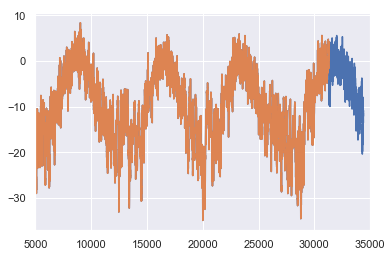

In [37]:
plt.xlim(5000,35000)
plt.plot(temp_values)
plt.plot(df.tempr.values)
plt.show()